<font size="+3">
    <b>Take-Home Midterm Exam</b>
</font>
<br>

# Instructions
<br>
<font size="+2">
    <ul>
        <li>March 22. Time given: 9.00am-23.59pm</li>
        <br>
        <li>Answer the following questions to the best of your ability.</li>
        <br>
        <li>All code should be able to run to receive full credit.</li>
        <br>
        <li>Document your code to help explain what you are doing in order to receive partial credit. </li>
        <br>
        <li>The final is open book, notes, and internet, <b style="color:red"><font color="red">but not collaborative. Any collaboration will result in an immediate failing for all parties involved!</font></b></li>
        <br>
        <li>Please ask (<b style="color:blue">on Slack</b>) if anything is unclear.</li>
        <br>
        <li><font color="red">There are many parts of this midterm that are intentionally open-ended, or require you to look things up on your own. Your effort to articulate a well-formulated solution will be considered when grading these problems, i.e. partial credit will be given.</font></li>
        <br>
    </ul>
</font>

# Imports

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
! pip install seaborn

In [35]:
import seaborn as sns

In [2]:
data_path = '/content/drive/My Drive/DSO_464_Spring_2024/11_Midterm_(Take_Home)/Data/'

# Blockchain Data: On-Chain and Off-Chain Time-Series Data
<br>
<font size="+1">
  <ul>
    <li><b>BACKGROUND:</b></li>
    <br>
    <ul>
      <li><b>Blockchain:</b> A blockchain is a distributed and decentralized digital database that records transactions across a network of computers. Each transaction is grouped into a block, and these blocks are linked together in a chronological chain, forming the "blockchain." Once a block is added to the chain, it is immutable and cannot be altered retroactively without altering all subsequent blocks, making the blockchain secure and tamper-resistant.</li>
      <br>
      <li><b>Data Generation:</b> Data on a blockchain is generated through transactions. When a user initiates a transaction, such as sending cryptocurrency or recording information, the details of the transaction are verified by network participants (nodes) and then added to a new block. This block is then appended to the existing blockchain, creating a permanent and transparent record of the transaction. In Ethereum, a new block is created approximately every 13-15 seconds on average. This time frame can vary slightly depending on network conditions and other factors.</li>
      <br>
      <li><b>On-chain Data:</b> On-chain data refers to information that is recorded and stored directly on the blockchain. This includes transaction details, smart contract code, token balances, and other data related to blockchain activities. On-chain data is publicly accessible and transparent, allowing anyone to view the information stored on the blockchain.</li>
      <br>
      <li><b>Off-chain Data:</b> Off-chain data, on the other hand, refers to information that is stored or processed outside of the blockchain network. This can include data stored on centralized servers, cloud storage, or any other external databases. Off-chain data is not directly recorded on the blockchain but may be referenced or linked to on-chain transactions through cryptographic proofs or external references.</li>
      <br>
      <li> In Ethereum transactions, <b>gas used</b> is like the fuel consumed when you drive a car. It shows how much computing power was needed to process a transaction on the Ethereum network. The more complex the transaction, the more gas used. It's important because it determines the transaction fee; the higher the gas used, the higher the fee. So, it's like knowing how much gas your car used to understand the cost of traveling.</li>
      <br>
      <li>More precisely, <b>gas used</b> refers to the actual amount of computational resources (gas) consumed during the execution of a transaction on the Ethereum blockchain. It represents the total cost incurred for processing the transaction, which includes executing the smart contract code (if applicable), updating the blockchain state, and validating the transaction.</li>
      <br>
      <li>The gas used is crucial for determining the transaction fee (gas fee) paid by the sender, as it directly influences the cost of executing the transaction. Transactions with higher computational complexity or interactions with smart contracts typically require more gas and thus incur higher fees.</li>
      <br>
      <li>Overall, the gas used metric provides insights into the computational intensity of transactions and helps users understand the resource requirements and associated costs of interacting with the Ethereum network.</li>
      <br>
    </ul>
    <li>We will read in some data related to blockchains that are from an actual blockchain database (on-chain) and also data that is from the off-chain databases.</li>
    <br>
    <ul>
      <li><b>Binance_ETHUSDT_minute.csv</b> is an <b>off-chain data set</b> from an exhchange (Binance). It consists of minute-by-minute prices (i.e. exchange rates) for the cryptocurrency pair: Ethereum (ETH) and Tether (USDT). The data consists of the following fields:</li>
      <br>
      <ul>
        <li><b>Symbol</b>: represents the trading pair or asset being traded.</li>
        <br>
        <li><b>Open, High, Low, Close</b>: represents the opening, highest, lowest, and closing price reached by the asset during the trading period.</li>
        <br>
        <li><b>Volume ETH, Volume USDT</b>: represents volume of the asset traded in terms of Ethereum (ETH) or Tether (USDT), representing the total amount of the asset exchanged during the trading period, measured in units of Ethereum or Tether (which is a stablecoin pegged to the US dollar).</li>
        <br>
        <li><b>Tradecount</b>: represents the number of trades executed for the asset during the trading period, indicating the level of trading activity.</li>
        <br>
      </ul>
      <li><b>blocks.csv</b> is an <b>on-chain data set</b> from the Ethereum blockchain containing aggregate block-level data. It contains minute-by-minute data that counts the number of transactions that occur (in a block) in that particular minute.</li>
      <br>
      <li><b>transactions.csv</b> is an <b>on-chain data set</b> from the Ethereum blockchain containing disaggregated transaction-level data. It contains minute-by-minute data that represents the average price of gas (per block) in that particular minute.</li>
      <br>
      <li><b>traces.csv</b> is an <b>on-chain data set</b> from the Ethereum blockchain. It contains minute-by-minute data representing the total gas used per minute. <b>This is an important quantity to predict.</b></li>
      <br>
      <ul>
        <li>Being able to accurately predict the gas used is useful for the following reasons:</li>
        <br>
        <ul>
          <li><b>Cost Estimation</b>: Gas usage directly influences the cost of executing a transaction on the Ethereum network. Predicting gas usage helps users estimate the cost of their transactions in terms of Ether.</li>
          <br>
          <li><b>Optimizing Performance</b>: By predicting gas usage, developers can optimize their smart contracts and transactions to minimize gas consumption. This optimization can lead to more efficient and cost-effective operations on the Ethereum blockchain.</li>
          <br>
          <li><b>Preventing Out-of-Gas Errors</b>: Transactions that run out of gas before completing are reverted, wasting resources and potentially causing disruptions. Predicting gas usage helps developers avoid these errors by ensuring that sufficient gas is provided for the transaction to complete successfully.</li>
          <br>
          <li><b>Resource Management</b>: For decentralized applications (DApps), predicting gas usage is crucial for managing resources efficiently. DApp developers can allocate resources based on predicted gas consumption to ensure smooth operation and prevent network congestion.</li>
          <br>
        </ul>
    </ul>
    </ul>
    <li>Feel free to use ChatGPT or Claude.ai to help you understand more background, if needed.</li>
    <br>
    <li>Run the following cells to generate your dataset.</li>
    <br>
  </ul>
</font>

$\square$

In [3]:
# os.listdir(data_path)

In [106]:
eth_usdt_binance_prices = pd.read_csv(os.path.join(data_path, 'Binance_ETHUSDT_minute.csv'), parse_dates=[1])

eth_usdt_binance_prices.set_index('date', inplace=True)
eth_usdt_binance_prices.sort_index(inplace=True)

eth_usdt_binance_prices.drop(columns=['unix'], inplace=True)

print(eth_usdt_binance_prices.shape)
eth_usdt_binance_prices.head()

(1046863, 8)


symbol   open   high    low  close  Volume ETH  \
date                                                                    
2019-11-27 07:45:00  ETH/USDT  146.0  146.0  146.0  146.0        0.01   
2019-11-27 07:46:00  ETH/USDT  146.0  146.0  146.0  146.0        0.00   
2019-11-27 07:47:00  ETH/USDT  146.0  146.0  146.0  146.0        0.00   
2019-11-27 07:48:00  ETH/USDT  146.0  146.0  146.0  146.0        0.00   
2019-11-27 07:49:00  ETH/USDT  146.0  146.0  146.0  146.0        0.00   

                     Volume USDT  tradecount  
date                                          
2019-11-27 07:45:00         1.46           1  
2019-11-27 07:46:00         0.00           0  
2019-11-27 07:47:00         0.00           0  
2019-11-27 07:48:00         0.00           0  
2019-11-27 07:49:00         0.00           0

In [107]:
# Data has been processed and downsampled so that timestamps are evenly spaced and can be easily merged with the off-chain data
# Also, note the data has been downsampled so that the time steps are regularly spaced

blocks = pd.read_csv(os.path.join(data_path, 'blocks.csv'), parse_dates=[0])

blocks.set_index('Date', inplace=True)
blocks.sort_index(inplace=True)

blocks.rename(columns={'Count':'Total_Block_Txns_Count_Per_Minute'}, inplace=True)

print(blocks.shape)
blocks.head()

(415288, 1)


Total_Block_Txns_Count_Per_Minute
Date                                                  
2021-01-01 00:00:00                                908
2021-01-01 00:01:00                                848
2021-01-01 00:02:00                                435
2021-01-01 00:03:00                                637
2021-01-01 00:04:00                                567

In [108]:
# Data has been processed and downsampled so that timestamps are evenly spaced and can be easily merged with the off-chain data
# Also, note the data has been downsampled so that the time steps are regularly spaced

transactions = pd.read_csv(os.path.join(data_path, 'transactions.csv'), parse_dates=[0])

transactions.set_index('Date', inplace=True)
transactions.sort_index(inplace=True)

transactions.rename(columns={'Price':'Avg_Gas_Price_Per_Block'}, inplace=True)

print(transactions.shape)
transactions.head()

(1162878, 1)


Avg_Gas_Price_Per_Block
Date                                        
2021-10-17 00:00:00             8.761196e+10
2021-10-17 00:01:00             8.293807e+10
2021-10-17 00:02:00             7.481023e+10
2021-10-17 00:03:00             8.082413e+10
2021-10-17 00:04:00             8.502241e+10

In [109]:
# Data has been processed and downsampled so that timestamps are evenly spaced and can be easily merged with the off-chain data
# Also, note the data has been downsampled so that the time steps are regularly spaced

gas_used = pd.read_csv(os.path.join(data_path, 'traces.csv'), parse_dates=[0])

gas_used.set_index('Date', inplace=True)
gas_used.sort_index(inplace=True)

gas_used.rename(columns={'Count':'Total_Gas_Used_Per_Minute'}, inplace=True)

print(gas_used.shape)
gas_used.head()

(415288, 1)


Total_Gas_Used_Per_Minute
Date                                          
2021-01-01 00:00:00                131551972.0
2021-01-01 00:01:00                 98746727.0
2021-01-01 00:02:00                 88524927.0
2021-01-01 00:03:00                 99669060.0
2021-01-01 00:04:00                 66270427.0

In [110]:
# # Sanity Check
print((transactions.index.to_frame() - transactions.index.to_frame().shift()).describe())
print((blocks.index.to_frame() - blocks.index.to_frame().shift()).describe())
print((gas_used.index.to_frame() - gas_used.index.to_frame().shift()).describe())
print((eth_usdt_binance_prices.index.to_frame() - eth_usdt_binance_prices.index.to_frame().shift()).describe())

                            Date
count                    1162877
mean   0 days 00:01:00.256020198
std    0 days 00:00:03.955830736
min              0 days 00:01:00
25%              0 days 00:01:00
50%              0 days 00:01:00
75%              0 days 00:01:00
max              0 days 00:04:00
                            Date
count                     415287
mean   0 days 00:01:00.542082945
std    0 days 00:00:05.734982429
min              0 days 00:01:00
25%              0 days 00:01:00
50%              0 days 00:01:00
75%              0 days 00:01:00
max              0 days 00:04:00
                            Date
count                     415287
mean   0 days 00:01:00.542082945
std    0 days 00:00:05.734982429
min              0 days 00:01:00
25%              0 days 00:01:00
50%              0 days 00:01:00
75%              0 days 00:01:00
max              0 days 00:04:00
                            date
count                    1046862
mean   0 days 00:01:00.309954893
std    0 d

In [193]:
df = eth_usdt_binance_prices.merge(blocks, left_index=True, right_index=True, how="outer")

df = df.merge(transactions, left_index=True, right_index=True, how="outer")

df = df.merge(gas_used, left_index=True, right_index=True, how="outer")

In [194]:
df.head()

symbol   open   high    low  close  Volume ETH  \
2019-11-27 07:45:00  ETH/USDT  146.0  146.0  146.0  146.0        0.01   
2019-11-27 07:46:00  ETH/USDT  146.0  146.0  146.0  146.0        0.00   
2019-11-27 07:47:00  ETH/USDT  146.0  146.0  146.0  146.0        0.00   
2019-11-27 07:48:00  ETH/USDT  146.0  146.0  146.0  146.0        0.00   
2019-11-27 07:49:00  ETH/USDT  146.0  146.0  146.0  146.0        0.00   

                     Volume USDT  tradecount  \
2019-11-27 07:45:00         1.46         1.0   
2019-11-27 07:46:00         0.00         0.0   
2019-11-27 07:47:00         0.00         0.0   
2019-11-27 07:48:00         0.00         0.0   
2019-11-27 07:49:00         0.00         0.0   

                     Total_Block_Txns_Count_Per_Minute  \
2019-11-27 07:45:00                                NaN   
2019-11-27 07:46:00                                NaN   
2019-11-27 07:47:00                                NaN   
2019-11-27 07:48:00                                NaN   
2019-11-27 07:49:00                                NaN   

                     Avg_Gas_Price_Per_Block  Total_Gas_Used_Per_Minute  
2019-11-27 07:45:00                      NaN                        NaN  
2019-11-27 07:46:00                      NaN                        NaN  
2019-11-27 07:47:00                      NaN                        NaN  
2019-11-27 07:48:00                      NaN                        NaN  
2019-11-27 07:49:00                      NaN                        NaN

In [195]:
df.dropna(inplace=True)

df

symbol     open     high      low    close  Volume ETH  \
2021-10-17 00:00:00  ETH/USDT  3829.96  3830.83  3825.30  3825.96    415.6477   
2021-10-17 00:01:00  ETH/USDT  3825.95  3829.44  3823.49  3825.15    287.8432   
2021-10-17 00:02:00  ETH/USDT  3825.16  3830.00  3822.66  3829.09    218.6375   
2021-10-17 00:03:00  ETH/USDT  3829.10  3829.99  3818.71  3820.03    484.7157   
2021-10-17 00:04:00  ETH/USDT  3820.02  3821.49  3812.00  3812.06    381.6933   
...                       ...      ...      ...      ...      ...         ...   
2021-10-18 23:55:00  ETH/USDT  3742.41  3747.56  3742.41  3746.55    131.3630   
2021-10-18 23:56:00  ETH/USDT  3746.37  3746.66  3743.93  3744.76     45.4055   
2021-10-18 23:57:00  ETH/USDT  3744.75  3748.26  3744.75  3746.01     68.2766   
2021-10-18 23:58:00  ETH/USDT  3746.01  3748.44  3745.31  3748.39     79.3189   
2021-10-18 23:59:00  ETH/USDT  3748.38  3749.55  3744.86  3744.96    112.0576   

                      Volume USDT  tradecount  \
2021-10-17 00:00:00  1.591239e+06       780.0   
2021-10-17 00:01:00  1.101193e+06       890.0   
2021-10-17 00:02:00  8.364274e+05       785.0   
2021-10-17 00:03:00  1.852533e+06      1136.0   
2021-10-17 00:04:00  1.456686e+06      1232.0   
...                           ...         ...   
2021-10-18 23:55:00  4.919902e+05       276.0   
2021-10-18 23:56:00  1.700423e+05       165.0   
2021-10-18 23:57:00  2.557699e+05       241.0   
2021-10-18 23:58:00  2.971719e+05       171.0   
2021-10-18 23:59:00  4.199310e+05       309.0   

                     Total_Block_Txns_Count_Per_Minute  \
2021-10-17 00:00:00                              927.0   
2021-10-17 00:01:00                              648.0   
2021-10-17 00:02:00                              866.0   
2021-10-17 00:03:00                              569.0   
2021-10-17 00:04:00                              882.0   
...                                                ...   
2021-10-18 23:55:00                              685.0   
2021-10-18 23:56:00                              665.0   
2021-10-18 23:57:00                              949.0   
2021-10-18 23:58:00                              881.0   
2021-10-18 23:59:00                              490.0   

                     Avg_Gas_Price_Per_Block  Total_Gas_Used_Per_Minute  
2021-10-17 00:00:00             8.761196e+10                124574175.0  
2021-10-17 00:01:00             8.293807e+10                 97074985.0  
2021-10-17 00:02:00             7.481023e+10                149443448.0  
2021-10-17 00:03:00             8.082413e+10                169500365.0  
2021-10-17 00:04:00             8.502241e+10                126610505.0  
...                                      ...                        ...  
2021-10-18 23:55:00             9.373876e+10                113310628.0  
2021-10-18 23:56:00             8.480460e+10                 97082817.0  
2021-10-18 23:57:00             8.175022e+10                131466042.0  
2021-10-18 23:58:00             8.697826e+10                125353131.0  
2021-10-18 23:59:00             8.653560e+10                 72795230.0  

[2851 rows x 11 columns]

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2851 entries, 2021-10-17 00:00:00 to 2021-10-18 23:59:00
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   symbol                             2851 non-null   object 
 1   open                               2851 non-null   float64
 2   high                               2851 non-null   float64
 3   low                                2851 non-null   float64
 4   close                              2851 non-null   float64
 5   Volume ETH                         2851 non-null   float64
 6   Volume USDT                        2851 non-null   float64
 7   tradecount                         2851 non-null   float64
 8   Total_Block_Txns_Count_Per_Minute  2851 non-null   float64
 9   Avg_Gas_Price_Per_Block            2851 non-null   float64
 10  Total_Gas_Used_Per_Minute          2851 non-null   float64
dtypes: float64(10), obje

In [197]:
# df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

df.head()

symbol     open     high      low    close  Volume ETH  \
2021-10-17 00:00:00  ETH/USDT  3829.96  3830.83  3825.30  3825.96    415.6477   
2021-10-17 00:01:00  ETH/USDT  3825.95  3829.44  3823.49  3825.15    287.8432   
2021-10-17 00:02:00  ETH/USDT  3825.16  3830.00  3822.66  3829.09    218.6375   
2021-10-17 00:03:00  ETH/USDT  3829.10  3829.99  3818.71  3820.03    484.7157   
2021-10-17 00:04:00  ETH/USDT  3820.02  3821.49  3812.00  3812.06    381.6933   

                      Volume USDT  tradecount  \
2021-10-17 00:00:00  1.591239e+06       780.0   
2021-10-17 00:01:00  1.101193e+06       890.0   
2021-10-17 00:02:00  8.364274e+05       785.0   
2021-10-17 00:03:00  1.852533e+06      1136.0   
2021-10-17 00:04:00  1.456686e+06      1232.0   

                     Total_Block_Txns_Count_Per_Minute  \
2021-10-17 00:00:00                              927.0   
2021-10-17 00:01:00                              648.0   
2021-10-17 00:02:00                              866.0   
2021-10-17 00:03:00                              569.0   
2021-10-17 00:04:00                              882.0   

                     Avg_Gas_Price_Per_Block  Total_Gas_Used_Per_Minute  
2021-10-17 00:00:00             8.761196e+10                124574175.0  
2021-10-17 00:01:00             8.293807e+10                 97074985.0  
2021-10-17 00:02:00             7.481023e+10                149443448.0  
2021-10-17 00:03:00             8.082413e+10                169500365.0  
2021-10-17 00:04:00             8.502241e+10                126610505.0

<Axes: >

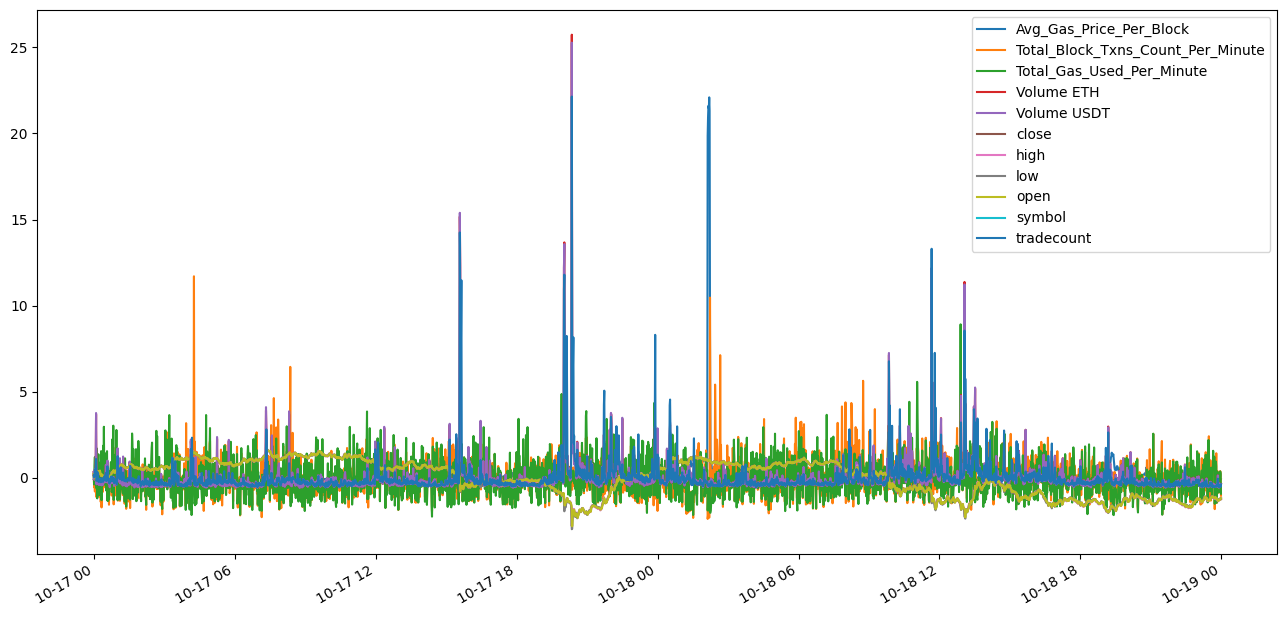

In [198]:
df_full_sample_standardized = (df - df.mean(numeric_only=True)) / df.std(numeric_only=True)

df_full_sample_standardized.plot(figsize=(16,8))

<Axes: >

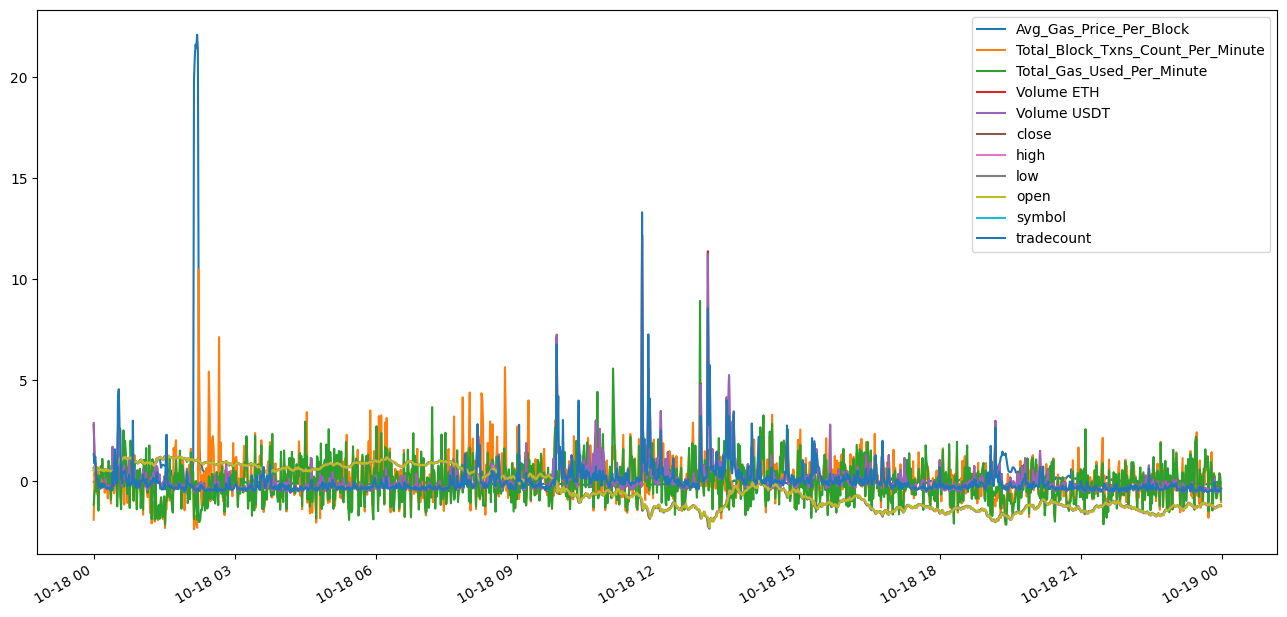

In [199]:
df_full_sample_standardized.loc['10-18-2021'].plot(figsize=(16,8))

<Axes: >

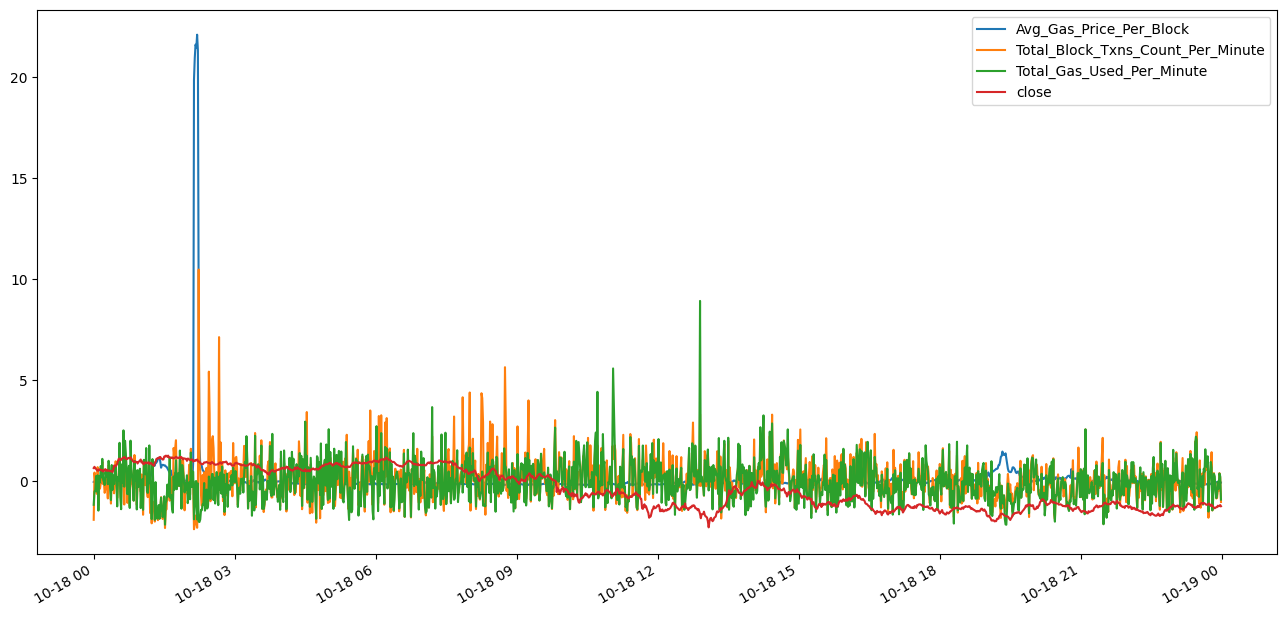

In [200]:
df_full_sample_standardized.loc['10-18-2021', ['Avg_Gas_Price_Per_Block',
                                               'Total_Block_Txns_Count_Per_Minute',
                                               'Total_Gas_Used_Per_Minute',
                                               'close']].plot(figsize=(16,8))

In [201]:
df_full_sample_standardized.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2851 entries, 2021-10-17 00:00:00 to 2021-10-18 23:59:00
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Avg_Gas_Price_Per_Block            2851 non-null   float64
 1   Total_Block_Txns_Count_Per_Minute  2851 non-null   float64
 2   Total_Gas_Used_Per_Minute          2851 non-null   float64
 3   Volume ETH                         2851 non-null   float64
 4   Volume USDT                        2851 non-null   float64
 5   close                              2851 non-null   float64
 6   high                               2851 non-null   float64
 7   low                                2851 non-null   float64
 8   open                               2851 non-null   float64
 9   symbol                             0 non-null      object 
 10  tradecount                         2851 non-null   float64
dtypes: float64(10), obje

In [202]:
df_full_sample_standardized.drop(columns=['symbol'], inplace=True)

df.drop(columns=['symbol'], inplace=True)

$\rule{800pt}{20pt}$

# Description and EDA

<font size="+1" style="color:blue">
    <b>
    <ul>
        <li>The following question is to get you to explore the data with some basic descriptive analytics methods, as well as prepare the data for prediction using deep learning methods.</li>
        <br>
    </ul>
    </b>
</font>

# Question 1 (12.5 points): Feature Engineering and Preparing Data for Training
<br>

- Your goal for this problem set is to predict the <b>Total_Gas_Used_Per_Minute</b> (this is your target variable) using the other variables (these are your predictor variables).

- Because this is a time-series prediction problem, you should make sure you are predicting with variables that are lagged by at least one time period (to do this in Pandas, use <b>.shift()</b>).

- Compute a correlation data frame that summarizes the correlation of the lagged predictor variables with the target variable.

- You are to manually feature engineer (not using PCA), at least three new features from the predictor variables that are at least $5\%$ correlated (in absolute value) with the target variable.

- Create a time-series split of the into a "sub-training", "validation", and "testing" set using an $80\%, 20\%$ split of the data.

- Standardize the data (subtract the mean and divide the standard deviation), and be sure not to include a look-ahead bias when doing your standardization.

In [203]:
print(df.shape)
df.head()

(2851, 10)


open     high      low    close  Volume ETH  \
2021-10-17 00:00:00  3829.96  3830.83  3825.30  3825.96    415.6477   
2021-10-17 00:01:00  3825.95  3829.44  3823.49  3825.15    287.8432   
2021-10-17 00:02:00  3825.16  3830.00  3822.66  3829.09    218.6375   
2021-10-17 00:03:00  3829.10  3829.99  3818.71  3820.03    484.7157   
2021-10-17 00:04:00  3820.02  3821.49  3812.00  3812.06    381.6933   

                      Volume USDT  tradecount  \
2021-10-17 00:00:00  1.591239e+06       780.0   
2021-10-17 00:01:00  1.101193e+06       890.0   
2021-10-17 00:02:00  8.364274e+05       785.0   
2021-10-17 00:03:00  1.852533e+06      1136.0   
2021-10-17 00:04:00  1.456686e+06      1232.0   

                     Total_Block_Txns_Count_Per_Minute  \
2021-10-17 00:00:00                              927.0   
2021-10-17 00:01:00                              648.0   
2021-10-17 00:02:00                              866.0   
2021-10-17 00:03:00                              569.0   
2021-10-17 00:04:00                              882.0   

                     Avg_Gas_Price_Per_Block  Total_Gas_Used_Per_Minute  
2021-10-17 00:00:00             8.761196e+10                124574175.0  
2021-10-17 00:01:00             8.293807e+10                 97074985.0  
2021-10-17 00:02:00             7.481023e+10                149443448.0  
2021-10-17 00:03:00             8.082413e+10                169500365.0  
2021-10-17 00:04:00             8.502241e+10                126610505.0

[]

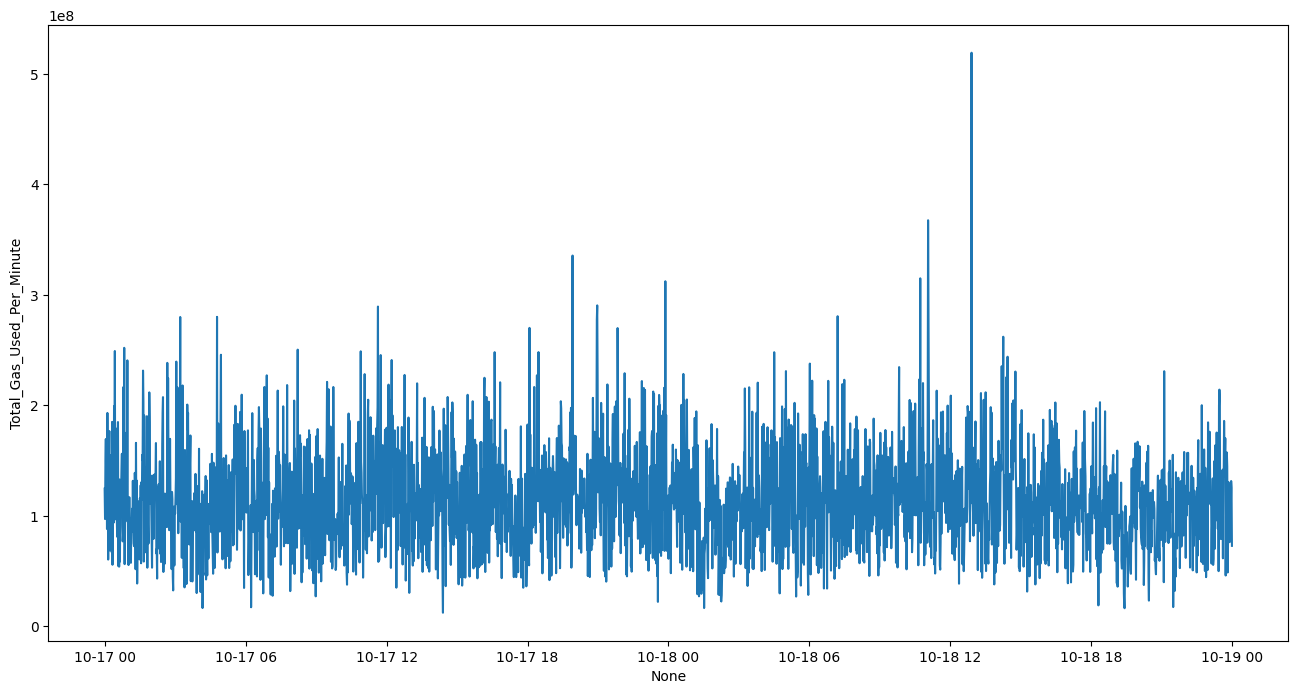

In [204]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df, x=df.index, y="Total_Gas_Used_Per_Minute")
plt.plot()

[]

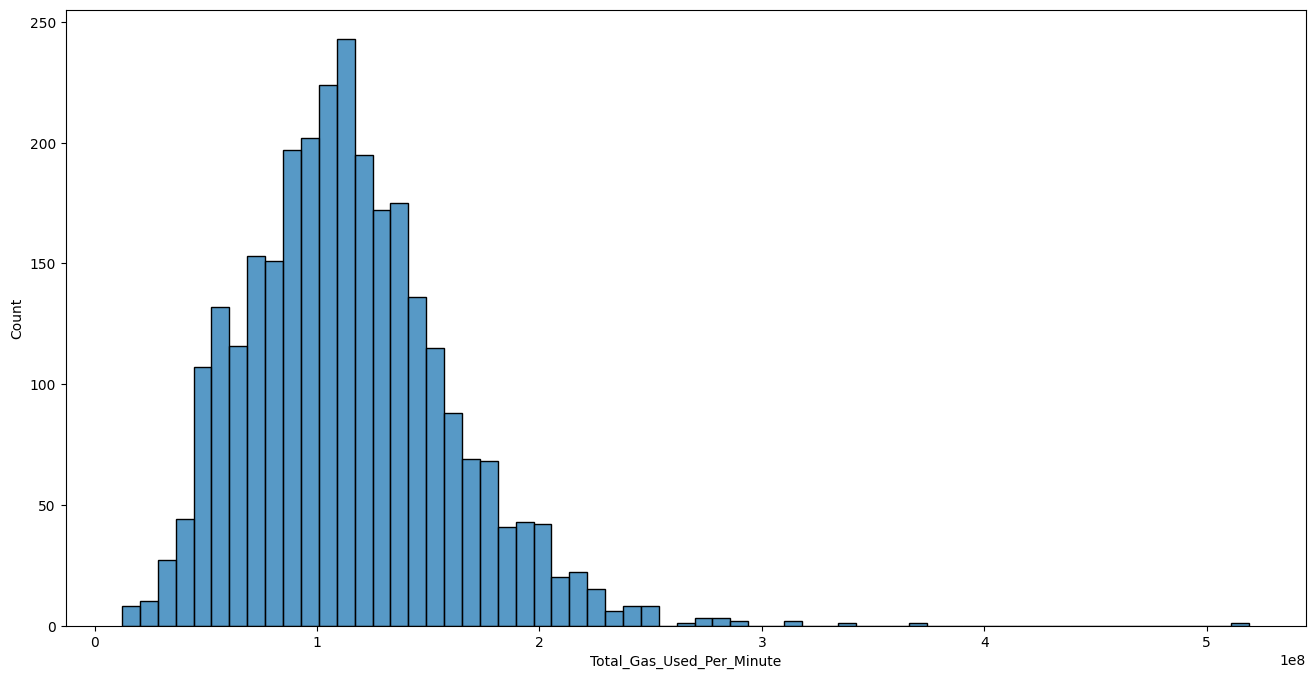

In [205]:
plt.figure(figsize=(16, 8))
sns.histplot(data=df, x="Total_Gas_Used_Per_Minute")
plt.plot()

In [206]:
df

open     high      low    close  Volume ETH  \
2021-10-17 00:00:00  3829.96  3830.83  3825.30  3825.96    415.6477   
2021-10-17 00:01:00  3825.95  3829.44  3823.49  3825.15    287.8432   
2021-10-17 00:02:00  3825.16  3830.00  3822.66  3829.09    218.6375   
2021-10-17 00:03:00  3829.10  3829.99  3818.71  3820.03    484.7157   
2021-10-17 00:04:00  3820.02  3821.49  3812.00  3812.06    381.6933   
...                      ...      ...      ...      ...         ...   
2021-10-18 23:55:00  3742.41  3747.56  3742.41  3746.55    131.3630   
2021-10-18 23:56:00  3746.37  3746.66  3743.93  3744.76     45.4055   
2021-10-18 23:57:00  3744.75  3748.26  3744.75  3746.01     68.2766   
2021-10-18 23:58:00  3746.01  3748.44  3745.31  3748.39     79.3189   
2021-10-18 23:59:00  3748.38  3749.55  3744.86  3744.96    112.0576   

                      Volume USDT  tradecount  \
2021-10-17 00:00:00  1.591239e+06       780.0   
2021-10-17 00:01:00  1.101193e+06       890.0   
2021-10-17 00:02:00  8.364274e+05       785.0   
2021-10-17 00:03:00  1.852533e+06      1136.0   
2021-10-17 00:04:00  1.456686e+06      1232.0   
...                           ...         ...   
2021-10-18 23:55:00  4.919902e+05       276.0   
2021-10-18 23:56:00  1.700423e+05       165.0   
2021-10-18 23:57:00  2.557699e+05       241.0   
2021-10-18 23:58:00  2.971719e+05       171.0   
2021-10-18 23:59:00  4.199310e+05       309.0   

                     Total_Block_Txns_Count_Per_Minute  \
2021-10-17 00:00:00                              927.0   
2021-10-17 00:01:00                              648.0   
2021-10-17 00:02:00                              866.0   
2021-10-17 00:03:00                              569.0   
2021-10-17 00:04:00                              882.0   
...                                                ...   
2021-10-18 23:55:00                              685.0   
2021-10-18 23:56:00                              665.0   
2021-10-18 23:57:00                              949.0   
2021-10-18 23:58:00                              881.0   
2021-10-18 23:59:00                              490.0   

                     Avg_Gas_Price_Per_Block  Total_Gas_Used_Per_Minute  
2021-10-17 00:00:00             8.761196e+10                124574175.0  
2021-10-17 00:01:00             8.293807e+10                 97074985.0  
2021-10-17 00:02:00             7.481023e+10                149443448.0  
2021-10-17 00:03:00             8.082413e+10                169500365.0  
2021-10-17 00:04:00             8.502241e+10                126610505.0  
...                                      ...                        ...  
2021-10-18 23:55:00             9.373876e+10                113310628.0  
2021-10-18 23:56:00             8.480460e+10                 97082817.0  
2021-10-18 23:57:00             8.175022e+10                131466042.0  
2021-10-18 23:58:00             8.697826e+10                125353131.0  
2021-10-18 23:59:00             8.653560e+10                 72795230.0  

[2851 rows x 10 columns]

In [207]:
df_augmented = df.copy()

In [208]:
df_augmented["range"] = df_augmented["high"] - df_augmented["close"]
df_augmented["volume_per_trade"] = (df_augmented['Volume ETH'] + df_augmented['Volume USDT']) / df_augmented['tradecount']
df_augmented['price_volatility'] = df_augmented['close'].rolling(window=5).std()
df_augmented['close_price_roc'] = df_augmented['close'].pct_change()
df_augmented['volume_eth_change'] = df_augmented['Volume ETH'].pct_change()
df_augmented['volume_usdt_change'] = df_augmented['Volume USDT'].pct_change()
df_augmented['last_5_close_avg'] = df_augmented['close'].rolling(window=5).mean()
df_augmented['momentum_5'] = df_augmented['close'] - df_augmented['last_5_close_avg']
df_augmented['trade_count_change'] = df_augmented['tradecount'].diff()
df_augmented["total_volume"] = df_augmented['Volume ETH'] + df_augmented['Volume USDT']
df_augmented["Total_Gas_Used_Per_Minute_lag_1"] = df_augmented["Total_Gas_Used_Per_Minute"].shift()

In [209]:
df_augmented.corr()

open      high       low     close  \
open                               1.000000  0.999077  0.998491  0.997838   
high                               0.999077  1.000000  0.998125  0.998876   
low                                0.998491  0.998125  1.000000  0.998954   
close                              0.997838  0.998876  0.998954  1.000000   
Volume ETH                        -0.184873 -0.173086 -0.221496 -0.200597   
Volume USDT                       -0.177276 -0.165359 -0.213828 -0.192881   
tradecount                        -0.180508 -0.168003 -0.213926 -0.193915   
Total_Block_Txns_Count_Per_Minute  0.003548  0.002543  0.000903  0.001181   
Avg_Gas_Price_Per_Block            0.015820  0.015831  0.016479  0.016157   
Total_Gas_Used_Per_Minute         -0.012987 -0.013258 -0.016449 -0.015387   
range                             -0.136926 -0.139457 -0.179959 -0.186247   
volume_per_trade                  -0.052233 -0.048779 -0.058480 -0.053464   
price_volatility                  -0.287153 -0.271150 -0.310810 -0.289683   
close_price_roc                   -0.028638  0.001063  0.010840  0.036729   
volume_eth_change                  0.015673  0.018918 -0.001314  0.007138   
volume_usdt_change                 0.015853  0.019130 -0.001064  0.007397   
last_5_close_avg                   0.998671  0.998289  0.997364  0.997364   
momentum_5                         0.019873  0.039386  0.053153  0.067554   
trade_count_change                 0.014043  0.012384 -0.005508 -0.004376   
total_volume                      -0.177278 -0.165361 -0.213830 -0.192883   
Total_Gas_Used_Per_Minute_lag_1   -0.015636 -0.014427 -0.018586 -0.016848   

                                   Volume ETH  Volume USDT  tradecount  \
open                                -0.184873    -0.177276   -0.180508   
high                                -0.173086    -0.165359   -0.168003   
low                                 -0.221496    -0.213828   -0.213926   
close                               -0.200597    -0.192881   -0.193915   
Volume ETH                           1.000000     0.999832    0.880567   
Volume USDT                          0.999832     1.000000    0.879978   
tradecount                           0.880567     0.879978    1.000000   
Total_Block_Txns_Count_Per_Minute    0.017894     0.018098    0.020146   
Avg_Gas_Price_Per_Block             -0.016971    -0.017252   -0.020831   
Total_Gas_Used_Per_Minute            0.063005     0.063166    0.069713   
range                                0.602813     0.601791    0.568583   
volume_per_trade                     0.310146     0.315462    0.024092   
price_volatility                     0.645333     0.644237    0.685003   
close_price_roc                     -0.238097    -0.236240   -0.202472   
volume_eth_change                    0.428853     0.433661    0.304476   
volume_usdt_change                   0.427945     0.432769    0.303434   
last_5_close_avg                    -0.179339    -0.171831   -0.177994   
momentum_5                          -0.299121    -0.296051   -0.225510   
trade_count_change                   0.417406     0.417802    0.468268   
total_volume                         0.999832     1.000000    0.879978   
Total_Gas_Used_Per_Minute_lag_1      0.078031     0.078259    0.077694   

                                   Total_Block_Txns_Count_Per_Minute  \
open                                                        0.003548   
high                                                        0.002543   
low                                                         0.000903   
close                                                       0.001181   
Volume ETH                                                  0.017894   
Volume USDT                                                 0.018098   
tradecount                                                  0.020146   
Total_Block_Txns_Count_Per_Minute                           1.000000   
Avg_Gas_Price_Per_Block                                    -0.09179

In [211]:
(abs(df_augmented.corr()[['Total_Gas_Used_Per_Minute']])).sort_values(by='Total_Gas_Used_Per_Minute', ascending=False)

Total_Gas_Used_Per_Minute
Total_Gas_Used_Per_Minute                           1.000000
Total_Block_Txns_Count_Per_Minute                   0.689571
Total_Gas_Used_Per_Minute_lag_1                     0.100036
Avg_Gas_Price_Per_Block                             0.093490
tradecount                                          0.069713
Volume USDT                                         0.063166
total_volume                                        0.063166
Volume ETH                                          0.063005
price_volatility                                    0.056339
range                                               0.046633
momentum_5                                          0.044804
close_price_roc                                     0.034945
low                                                 0.016449
close                                               0.015387
high                                                0.013258
open                                                0.012987
last_5_close_avg                                    0.012246
volume_eth_change                                   0.008771
trade_count_change                                  0.008763
volume_usdt_change                                  0.008663
volume_per_trade                                    0.007604

In [223]:
df_lagged = df_augmented.copy()

In [224]:
def lag_features(data, time_lag=1):
  feature_cols = set(data.columns) - {"Total_Gas_Used_Per_Minute"}
  for col in feature_cols:
    data[f'{col}_lagged_{time_lag}'] = data[col].shift(1)
  return data

In [225]:
df_lagged = lag_features(df_lagged)
df_lagged

open     high      low    close  Volume ETH  \
2021-10-17 00:00:00  3829.96  3830.83  3825.30  3825.96    415.6477   
2021-10-17 00:01:00  3825.95  3829.44  3823.49  3825.15    287.8432   
2021-10-17 00:02:00  3825.16  3830.00  3822.66  3829.09    218.6375   
2021-10-17 00:03:00  3829.10  3829.99  3818.71  3820.03    484.7157   
2021-10-17 00:04:00  3820.02  3821.49  3812.00  3812.06    381.6933   
...                      ...      ...      ...      ...         ...   
2021-10-18 23:55:00  3742.41  3747.56  3742.41  3746.55    131.3630   
2021-10-18 23:56:00  3746.37  3746.66  3743.93  3744.76     45.4055   
2021-10-18 23:57:00  3744.75  3748.26  3744.75  3746.01     68.2766   
2021-10-18 23:58:00  3746.01  3748.44  3745.31  3748.39     79.3189   
2021-10-18 23:59:00  3748.38  3749.55  3744.86  3744.96    112.0576   

                      Volume USDT  tradecount  \
2021-10-17 00:00:00  1.591239e+06       780.0   
2021-10-17 00:01:00  1.101193e+06       890.0   
2021-10-17 00:02:00  8.364274e+05       785.0   
2021-10-17 00:03:00  1.852533e+06      1136.0   
2021-10-17 00:04:00  1.456686e+06      1232.0   
...                           ...         ...   
2021-10-18 23:55:00  4.919902e+05       276.0   
2021-10-18 23:56:00  1.700423e+05       165.0   
2021-10-18 23:57:00  2.557699e+05       241.0   
2021-10-18 23:58:00  2.971719e+05       171.0   
2021-10-18 23:59:00  4.199310e+05       309.0   

                     Total_Block_Txns_Count_Per_Minute  \
2021-10-17 00:00:00                              927.0   
2021-10-17 00:01:00                              648.0   
2021-10-17 00:02:00                              866.0   
2021-10-17 00:03:00                              569.0   
2021-10-17 00:04:00                              882.0   
...                                                ...   
2021-10-18 23:55:00                              685.0   
2021-10-18 23:56:00                              665.0   
2021-10-18 23:57:00                              949.0   
2021-10-18 23:58:00                              881.0   
2021-10-18 23:59:00                              490.0   

                     Avg_Gas_Price_Per_Block  Total_Gas_Used_Per_Minute  ...  \
2021-10-17 00:00:00             8.761196e+10                124574175.0  ...   
2021-10-17 00:01:00             8.293807e+10                 97074985.0  ...   
2021-10-17 00:02:00             7.481023e+10                149443448.0  ...   
2021-10-17 00:03:00             8.082413e+10                169500365.0  ...   
2021-10-17 00:04:00             8.502241e+10                126610505.0  ...   
...                                      ...                        ...  ...   
2021-10-18 23:55:00             9.373876e+10                113310628.0  ...   
2021-10-18 23:56:00             8.480460e+10                 97082817.0  ...   
2021-10-18 23:57:00             8.175022e+10                131466042.0  ...   
2021-10-18 23:58:00             8.697826e+10                125353131.0  ...   
2021-10-18 23:59:00             8.653560e+10                 72795230.0  ...   

                     Total_Gas_Used_Per_Minute_lag_1_lagged_1  \
2021-10-17 00:00:00                                       NaN   
2021-10-17 00:01:00                                       NaN   
2021-10-17 00:02:00                               124574175.0   
2021-10-17 00:03:00                                97074985.0   
2021-10-17 00:04:00                               149443448.0   
...                                                       ...   
2021-10-18 23:55:00                                76126239.0   
2021-10-18 23:56:00                                84867456.0   
2021-10-18 23:57:00                               113310628.0   
2021-10-18 23:58:00                                97082817.0   
2021-10-18 23:59:00                               131466042.0   

                     volume_eth_change_lagged_1  close_price_roc_lagged_1  \
2021-10-17 00:00:00                         NaN                   

In [226]:
df_lagged.corr()

open      high       low  \
open                                        1.000000  0.999077  0.998491   
high                                        0.999077  1.000000  0.998125   
low                                         0.998491  0.998125  1.000000   
close                                       0.997838  0.998876  0.998954   
Volume ETH                                 -0.184873 -0.173086 -0.221496   
Volume USDT                                -0.177276 -0.165359 -0.213828   
tradecount                                 -0.180508 -0.168003 -0.213926   
Total_Block_Txns_Count_Per_Minute           0.003548  0.002543  0.000903   
Avg_Gas_Price_Per_Block                     0.015820  0.015831  0.016479   
Total_Gas_Used_Per_Minute                  -0.012987 -0.013258 -0.016449   
range                                      -0.136926 -0.139457 -0.179959   
volume_per_trade                           -0.052233 -0.048779 -0.058480   
price_volatility                           -0.287153 -0.271150 -0.310810   
close_price_roc                            -0.028638  0.001063  0.010840   
volume_eth_change                           0.015673  0.018918 -0.001314   
volume_usdt_change                          0.015853  0.019130 -0.001064   
last_5_close_avg                            0.998671  0.998289  0.997364   
momentum_5                                  0.019873  0.039386  0.053153   
trade_count_change                          0.014043  0.012384 -0.005508   
total_volume                               -0.177278 -0.165361 -0.213830   
Total_Gas_Used_Per_Minute_lag_1            -0.015636 -0.014427 -0.018586   
total_volume_lagged_1                      -0.192675 -0.177258 -0.207477   
volume_usdt_change_lagged_1                 0.007396  0.009751  0.001455   
price_volatility_lagged_1                  -0.289631 -0.276037 -0.302232   
volume_per_trade_lagged_1                  -0.053759 -0.050554 -0.054230   
tradecount_lagged_1                        -0.193672 -0.179612 -0.208779   
Total_Block_Txns_Count_Per_Minute_lagged_1  0.000614  0.000848 -0.002226   
high_lagged_1                               0.998868  0.998498  0.996846   
low_lagged_1                                0.998908  0.997562  0.997957   
range_lagged_1                             -0.185607 -0.173915 -0.196323   
Avg_Gas_Price_Per_Block_lagged_1            0.016137  0.015745  0.016588   
Total_Gas_Used_Per_Minute_lag_1_lagged_1   -0.016582 -0.015167 -0.018991   
volume_eth_change_lagged_1                  0.007137  0.009495  0.001174   
close_price_roc_lagged_1                    0.036212  0.033432  0.040876   
last_5_close_avg_lagged_1                   0.997350  0.996638  0.995367   
trade_count_change_lagged_1                -0.004329 -0.000599 -0.009582   
Volume USDT_lagged_1                       -0.192673 -0.177256 -0.207475   
momentum_5_lagged_1                         0.067295  0.064324  0.074046   
close_lagged_1                              0.999976  0.999049  0.998482   
open_lagged_1                               0.997822  0.997079  0.996012   
Volume ETH_lagged_1                        -0.200384 -0.184961 -0.215169   

                                               close  Volume ETH  Volume USDT  \
open                                        0.997838   -0.184873    -0.177276   
high                                        0.998876   -0.173086    -0.165359   
low                                         0.998954   -0.221496    -0.213828   
close                                       1.000000   -0.200597    -0.192881   
Volume ETH                                 -0.200597    1.000000     0.999832   
Volume USDT                                -0.192881    0.999832     1.000000   
tradecount                                 -0.193915    0.880567     0.879978   
Total_Block_Txns_Count_Per_Minute           0.001181    0.017894     0.018098   
Avg_Gas_Price_Per_Block                     0.016157   -0.016971    -0.017252   
Total_Gas_Used_Per_Minute                  -0

<Axes: >

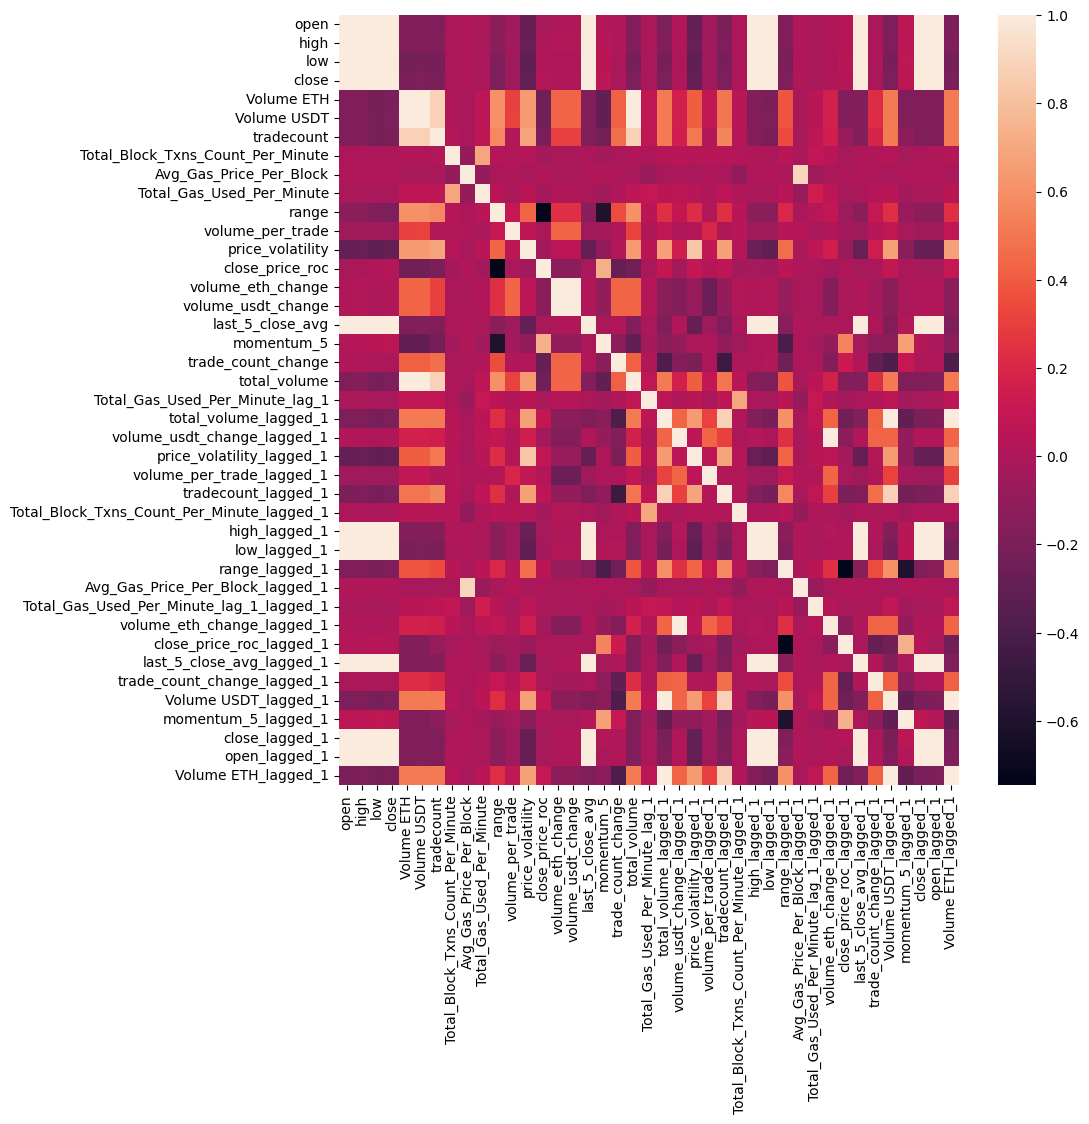

In [227]:
plt.figure(figsize=(10,10))
sns.heatmap(df_lagged.corr())

In [228]:
(abs(df_lagged.corr()[['Total_Gas_Used_Per_Minute']])).sort_values(by='Total_Gas_Used_Per_Minute', ascending=False)

Total_Gas_Used_Per_Minute
Total_Gas_Used_Per_Minute                                    1.000000
Total_Block_Txns_Count_Per_Minute                            0.689571
Total_Gas_Used_Per_Minute_lag_1_lagged_1                     0.152729
Total_Gas_Used_Per_Minute_lag_1                              0.100036
Avg_Gas_Price_Per_Block                                      0.093490
Avg_Gas_Price_Per_Block_lagged_1                             0.083732
tradecount                                                   0.069713
volume_eth_change_lagged_1                                   0.063726
volume_usdt_change_lagged_1                                  0.063687
Volume USDT                                                  0.063166
total_volume                                                 0.063166
Volume ETH                                                   0.063005
tradecount_lagged_1                                          0.061503
Volume USDT_lagged_1                                         0.058022
total_volume_lagged_1                                        0.058022
Volume ETH_lagged_1                                          0.057422
price_volatility                                             0.056339
range_lagged_1                                               0.049296
range                                                        0.046633
momentum_5                                                   0.044804
price_volatility_lagged_1                                    0.044259
close_price_roc                                              0.034945
momentum_5_lagged_1                                          0.030711
trade_count_change_lagged_1                                  0.025759
close_price_roc_lagged_1                                     0.024419
low                                                          0.016449
close                                                        0.015387
low_lagged_1                                                 0.014513
high                                                         0.013258
close_lagged_1                                               0.013076
open                                                         0.012987
last_5_close_avg                                             0.012246
open_lagged_1                                                0.011463
last_5_close_avg_lagged_1                                    0.010992
high_lagged_1                                                0.010800
volume_eth_change                                            0.008771
trade_count_change                                           0.008763
volume_usdt_change                                           0.008663
volume_per_trade                                             0.007604
volume_per_trade_lagged_1                                    0.007199
Total_Block_Txns_Count_Per_Minute_lagged_1                   0.005831

Note: I am keeping current variable and lagged variables. I am aware this introduces collinearity bias. However, we are going to use PCA and the models we will implement are non-linear, which means that this sould not be a problem.

In [234]:
df_lagged = df_lagged.dropna()

In [236]:
training_percentage = 0.8

# X and Y
X = df_lagged.drop(columns=['Total_Gas_Used_Per_Minute'])
Y = df_lagged[['Total_Gas_Used_Per_Minute']]

# Train and test
X_train = X.iloc[0: round(df_lagged.shape[0]* training_percentage)]
X_test = X.iloc[round(df_lagged.shape[0]* training_percentage):]
Y_train = Y.iloc[0: round(df_lagged.shape[0]* training_percentage)]
Y_test = Y.iloc[round(df_lagged.shape[0]* training_percentage):]

# Sub-train and validation
X_sub_train = X_train.iloc[0: round(X_train.shape[0]* training_percentage)]
Y_sub_train = Y_train.iloc[0: round(X_train.shape[0]* training_percentage)]
X_validation = X_train.iloc[round(X_train.shape[0]* training_percentage):]
Y_validation = Y_train.iloc[round(X_train.shape[0]* training_percentage):]

In [248]:
# Get the moments from training set
mean_X = X_sub_train.mean()
std_X = X_sub_train.std()

mean_Y = Y_sub_train.mean()
std_Y = Y_sub_train.std()

# Standardize
X_sub_train_standardized = (X_sub_train - mean_X) / std_X
X_validation_standardized = (X_validation - mean_X) / std_X
X_test_standardized = (X_test - mean_X) / std_X

Y_sub_train_standardized = (Y_sub_train - mean_Y) / std_Y
Y_validation_standardized = (Y_validation - mean_Y) / std_Y
Y_test_standardized = (Y_test - mean_Y) / std_Y

In [249]:
print(X_sub_train_standardized.shape)
X_sub_train_standardized.head()

(1822, 40)


open      high       low     close  Volume ETH  \
2021-10-17 00:05:00 -0.706061 -0.626254 -0.657334 -0.695792    0.246407   
2021-10-17 00:06:00 -0.696878 -0.673348 -0.790598 -0.715677    3.554428   
2021-10-17 00:07:00 -0.715244 -0.689268 -0.656689 -0.635480   -0.287744   
2021-10-17 00:08:00 -0.635220 -0.535604 -0.584039 -0.518351   -0.079591   
2021-10-17 00:09:00 -0.517807 -0.314947 -0.462383 -0.266613    0.038148   

                     Volume USDT  tradecount  \
2021-10-17 00:05:00     0.250182    0.403363   
2021-10-17 00:06:00     3.621387    1.058815   
2021-10-17 00:07:00    -0.294667   -0.126177   
2021-10-17 00:08:00    -0.081569   -0.065454   
2021-10-17 00:09:00     0.039674    0.300670   

                     Total_Block_Txns_Count_Per_Minute  \
2021-10-17 00:05:00                           0.337379   
2021-10-17 00:06:00                          -1.032591   
2021-10-17 00:07:00                           0.584523   
2021-10-17 00:08:00                          -0.727475   
2021-10-17 00:09:00                          -1.026489   

                     Avg_Gas_Price_Per_Block     range  ...  \
2021-10-17 00:05:00                -0.082717  1.305459  ...   
2021-10-17 00:06:00                -0.077110  0.852490  ...   
2021-10-17 00:07:00                -0.113917 -0.777454  ...   
2021-10-17 00:08:00                -0.091501 -0.187110  ...   
2021-10-17 00:09:00                -0.023222 -0.758890  ...   

                     Total_Gas_Used_Per_Minute_lag_1_lagged_1  \
2021-10-17 00:05:00                                  1.183472   
2021-10-17 00:06:00                                  0.253241   
2021-10-17 00:07:00                                  0.576982   
2021-10-17 00:08:00                                 -0.583304   
2021-10-17 00:09:00                                  1.695382   

                     volume_eth_change_lagged_1  close_price_roc_lagged_1  \
2021-10-17 00:05:00                   -0.380313                 -2.209152   
2021-10-17 00:06:00                   -0.284621                  0.124134   
2021-10-17 00:07:00                    2.551198                 -0.260410   
2021-10-17 00:08:00                   -0.856473                  1.006836   
2021-10-17 00:09:00                    0.325565                  1.473039   

                     last_5_close_avg_lagged_1  trade_count_change_lagged_1  \
2021-10-17 00:05:00                  -0.478358                     0.096597   
2021-10-17 00:06:00                  -0.537160                    -0.111844   
2021-10-17 00:07:00                  -0.596400                     0.735951   
2021-10-17 00:08:00                  -0.656823                    -1.329422   
2021-10-17 00:09:00                  -0.654062                     0.068538   

                     Volume USDT_lagged_1  momentum_5_lagged_1  \
2021-10-17 00:05:00              0.306369            -2.678592   
2021-10-17 00:06:00              0.249861            -1.867702   
2021-10-17 00:07:00              3.621049            -1.407924   
2021-10-17 00:08:00             -0.294986             0.239485   
2021-10-17 00:09:00             -0.081889             1.580888   

                     close_lagged_1  open_lagged_1  Volume ETH_lagged_1  
2021-10-17 00:05:00       -0.705517      -0.531388             0.300875  
2021-10-17 00:06:00       -0.695028      -0.705437             0.246091  
2021-10-17 00:07:00       -0.714913      -0.696253             3.554097  
2021-10-17 00:08:00       -0.634716      -0.714620            -0.288058  
2021-10-17 00:09:00       -0.517589      -0.634593            -0.079906  

[5 rows x 40 columns]

In [250]:
print(X_validation_standardized.shape)
X_validation_standardized.head()

(455, 40)


open      high       low     close  Volume ETH  \
2021-10-18 06:44:00  0.669657  0.659878  0.649722  0.622339   -0.262080   
2021-10-18 06:45:00  0.623085  0.630472  0.636825  0.614909   -0.299082   
2021-10-18 06:46:00  0.615651  0.575639  0.576427  0.585409   -0.336556   
2021-10-18 06:47:00  0.586353  0.546897  0.535803  0.499529   -0.270835   
2021-10-18 06:48:00  0.500425  0.508425  0.511945  0.490788   -0.291281   

                     Volume USDT  tradecount  \
2021-10-18 06:44:00    -0.264173   -0.259232   
2021-10-18 06:45:00    -0.302595   -0.315490   
2021-10-18 06:46:00    -0.341557   -0.296737   
2021-10-18 06:47:00    -0.273618   -0.329778   
2021-10-18 06:48:00    -0.294858   -0.318169   

                     Total_Block_Txns_Count_Per_Minute  \
2021-10-18 06:44:00                          -0.059272   
2021-10-18 06:45:00                          -1.728255   
2021-10-18 06:46:00                           0.624188   
2021-10-18 06:47:00                          -0.044016   
2021-10-18 06:48:00                           1.087964   

                     Avg_Gas_Price_Per_Block     range  ...  \
2021-10-18 06:44:00                -0.114553  0.507194  ...   
2021-10-18 06:45:00                -0.091289  0.139621  ...   
2021-10-18 06:46:00                -0.121282 -0.279932  ...   
2021-10-18 06:47:00                -0.115305  0.696550  ...   
2021-10-18 06:48:00                -0.141323  0.199027  ...   

                     Total_Gas_Used_Per_Minute_lag_1_lagged_1  \
2021-10-18 06:44:00                                  0.277850   
2021-10-18 06:45:00                                  0.362991   
2021-10-18 06:46:00                                 -0.156929   
2021-10-18 06:47:00                                 -1.752796   
2021-10-18 06:48:00                                  0.549720   

                     volume_eth_change_lagged_1  close_price_roc_lagged_1  \
2021-10-18 06:44:00                   -0.417552                  0.121994   
2021-10-18 06:45:00                   -0.211257                 -0.582971   
2021-10-18 06:46:00                   -0.332480                 -0.101261   
2021-10-18 06:47:00                   -0.348567                 -0.376346   
2021-10-18 06:48:00                   -0.016678                 -1.079391   

                     last_5_close_avg_lagged_1  trade_count_change_lagged_1  \
2021-10-18 06:44:00                   0.626432                    -0.062740   
2021-10-18 06:45:00                   0.642819                     0.021438   
2021-10-18 06:46:00                   0.640366                    -0.062740   
2021-10-18 06:47:00                   0.633355                     0.021438   
2021-10-18 06:48:00                   0.601588                    -0.036685   

                     Volume USDT_lagged_1  momentum_5_lagged_1  \
2021-10-18 06:44:00             -0.276716             0.520375   
2021-10-18 06:45:00             -0.264492            -0.212091   
2021-10-18 06:46:00             -0.302914            -0.270525   
2021-10-18 06:47:00             -0.341876            -0.534500   
2021-10-18 06:48:00             -0.273937            -1.170090   

                     close_lagged_1  open_lagged_1  Volume ETH_lagged_1  
2021-10-18 06:44:00        0.669192       0.659405            -0.274114  
2021-10-18 06:45:00        0.623085       0.670338            -0.262394  
2021-10-18 06:46:00        0.615655       0.623765            -0.299397  
2021-10-18 06:47:00        0.586155       0.616331            -0.336870  
2021-10-18 06:48:00        0.500276       0.587031            -0.271149  

[5 rows x 40 columns]

In [251]:
print(X_test_standardized.shape)
X_test_standardized.head()

(569, 40)


open      high       low     close  Volume ETH  \
2021-10-18 14:24:00 -1.017849 -1.027770 -0.971148 -0.970038   -0.344192   
2021-10-18 14:25:00 -0.969966 -0.788541 -0.928160 -0.784512    1.239048   
2021-10-18 14:26:00 -0.784555 -0.834751 -0.829287 -0.890496    0.080115   
2021-10-18 14:27:00 -0.890379 -0.902407 -0.854865 -0.888311   -0.245627   
2021-10-18 14:28:00 -0.887974 -0.874106 -0.831436 -0.868207    0.452669   

                     Volume USDT  tradecount  \
2021-10-18 14:24:00    -0.353016   -0.249409   
2021-10-18 14:25:00     1.259082    0.650720   
2021-10-18 14:26:00     0.079488    0.091711   
2021-10-18 14:27:00    -0.252457   -0.088672   
2021-10-18 14:28:00     0.458486    0.000627   

                     Total_Block_Txns_Count_Per_Minute  \
2021-10-18 14:24:00                          -0.114192   
2021-10-18 14:25:00                           1.002532   
2021-10-18 14:26:00                           3.260389   
2021-10-18 14:27:00                          -0.315569   
2021-10-18 14:28:00                          -0.129448   

                     Avg_Gas_Price_Per_Block     range  ...  \
2021-10-18 14:24:00                -0.108935 -0.777454  ...   
2021-10-18 14:25:00                -0.096266  0.087641  ...   
2021-10-18 14:26:00                -0.129824  1.112390  ...   
2021-10-18 14:27:00                -0.118927 -0.060873  ...   
2021-10-18 14:28:00                -0.094231  0.072790  ...   

                     Total_Gas_Used_Per_Minute_lag_1_lagged_1  \
2021-10-18 14:24:00                                 -0.890144   
2021-10-18 14:25:00                                  2.398311   
2021-10-18 14:26:00                                 -0.200410   
2021-10-18 14:27:00                                  1.319295   
2021-10-18 14:28:00                                  2.799304   

                     volume_eth_change_lagged_1  close_price_roc_lagged_1  \
2021-10-18 14:24:00                   -0.551227                  0.235775   
2021-10-18 14:25:00                   -0.530184                  0.602299   
2021-10-18 14:26:00                    5.398281                  2.347746   
2021-10-18 14:27:00                   -0.670085                 -1.351794   
2021-10-18 14:28:00                   -0.591663                  0.019060   

                     last_5_close_avg_lagged_1  trade_count_change_lagged_1  \
2021-10-18 14:24:00                  -1.062388                     0.003400   
2021-10-18 14:25:00                  -1.055290                    -0.347342   
2021-10-18 14:26:00                  -0.976070                     1.010533   
2021-10-18 14:27:00                  -0.940578                    -0.626934   
2021-10-18 14:28:00                  -0.910696                    -0.202035   

                     Volume USDT_lagged_1  momentum_5_lagged_1  \
2021-10-18 14:24:00             -0.205712             0.496284   
2021-10-18 14:25:00             -0.353335             0.977077   
2021-10-18 14:26:00              1.258756             2.226217   
2021-10-18 14:27:00              0.079167             0.568044   
2021-10-18 14:28:00             -0.252776             0.244098   

                     close_lagged_1  open_lagged_1  Volume ETH_lagged_1  
2021-10-18 14:24:00       -1.017345      -1.036480            -0.199261  
2021-10-18 14:25:00       -0.969270      -1.017238            -0.344506  
2021-10-18 14:26:00       -0.783747      -0.969353             1.238728  
2021-10-18 14:27:00       -0.889729      -0.783934             0.079799  
2021-10-18 14:28:00       -0.887544      -0.889763            -0.245942  

[5 rows x 40 columns]

# Prediction

<font size="+1" style="color:blue">
    <b>
    <ul>
        <li>The following problems are meant for you to practice your model building skills using deep learning methods.</li>
        <br>
    </ul>
    </b>
</font>

## Recall: Dense Neural Networks
<br>
<font size="+1">
  <ul>
    <li>Dense neural networks can be expressed quantitatively as parallel linear regressions repeatedly plugged into nonlinear activation functions, where these parallel activations form a layer. This is repeated over and over again until the final layer.</li>
    <br>
    <ul>
      <li>Consider a two-layer dense neural network: $$\widehat{Y_{t+1}} = \sum_{i=1}^p \beta_i \ \sigma\left(w_i^T X_t\right) \approx Y_{t+1}.$$</li>
      <br>
      <li><b>More generally, a dense neural network, which can capture the non-linear relations and high-dimensional relations between the input variables and the targets, can be expressed as:</b> $$ \sigma_{L}(W_L\sigma_{L-1}(W_{L-1}\sigma_{L-2}(W_{L-2} \cdots \sigma_2(W_2 \sigma_1(W_1\mathbf{X})) \cdots ))).$$</li>
      <br>
      <li>Note, when the target variable is a continuous variable, i.e. a regression prediction problem, then the terminal activation function is $$\sigma_L(h) = h.$$</li>
      <br>
    </ul>
    <br>
  </ul>
</font>

$\square$

# Question 2 (12.5 points): Baseline Model with PCA and Linear Regression
<br>

- Using your processed and engineered data from the previous question, you should implement a baseline linear model with Keras.

- In particular, you should have two linear baseline models: one should have features from the previous question (including the features you engineered), the second baseline model should have features you should algorithmically engineer from PCA.

- Test out at least 3 different numbers of principal components and determine which number of components performs best in your linear baseline model.

- Finally, which baseline performs best: the PCA + linear model, or the engineered features + linear model?

  - Note: you should not use your test set until the very end; all conclusions should be based on your validation sets.

## Manual Feature Engineering Model

In [255]:
epochs = 100
batch_size = 32
learning_rate = 1e-3

In [297]:
manual_lin_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_sub_train_standardized.shape[1],), activation='linear')
])

manual_lin_reg.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),  metrics=[tf.keras.metrics.R2Score()])

history = manual_lin_reg.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized)
)

manual_history = pd.DataFrame(history.history)

Epoch 1/100
57/57 [==============================] - 1s 6ms/step - loss: 1.5146 - r2_score: -0.5154 - val_loss: 1.7904 - val_r2_score: -0.5835
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 1.2777 - r2_score: -0.2784 - val_loss: 1.5247 - val_r2_score: -0.3485
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 1.1086 - r2_score: -0.1092 - val_loss: 1.3507 - val_r2_score: -0.1946
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.9912 - r2_score: 0.0082 - val_loss: 1.2222 - val_r2_score: -0.0810
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.9043 - r2_score: 0.0952 - val_loss: 1.1274 - val_r2_score: 0.0029
Epoch 6/100
57/57 [==============================] - 0s 4ms/step - loss: 0.8384 - r2_score: 0.1611 - val_loss: 1.0466 - val_r2_score: 0.0743
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 0.7823 - r2_score: 0.2173 - val_loss: 0.9893 - val_r2_score: 0.1251
Epoch 

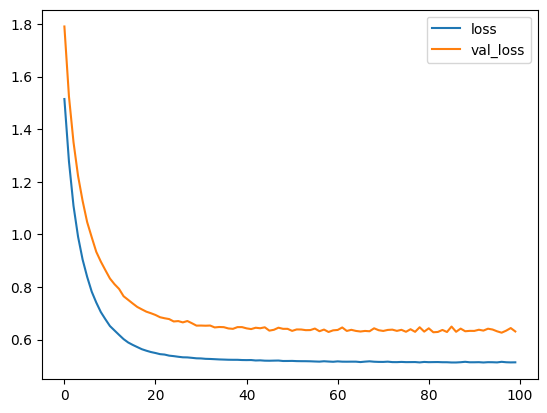

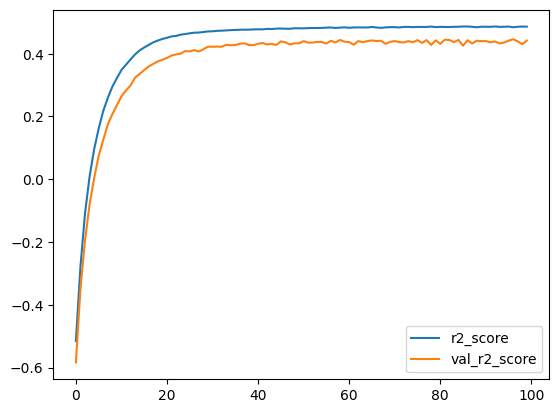

In [298]:
manual_history[['loss', 'val_loss']].plot()
plt.show()

manual_history[['r2_score', 'val_r2_score']].plot()
plt.show()

## Algorithmic Feature Engineering (PCA) Model

In [286]:
number_of_components_schedule = [1, 3, 5, 10, 15, 20, 30, 40]

In [287]:
component_to_loss = {}

for number_of_components in number_of_components_schedule:

  encoder = tf.keras.Sequential([tf.keras.layers.Dense(number_of_components, input_shape=(X_sub_train_standardized.shape[1], ))])
  decoder = tf.keras.Sequential([tf.keras.layers.Dense(X_sub_train_standardized.shape[1])])

  autoencoder = tf.keras.Sequential([encoder, decoder])
  autoencoder.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

  history = autoencoder.fit(X_sub_train_standardized, X_sub_train_standardized, epochs=50, verbose=False)
  component_to_loss[number_of_components] = history.history["loss"][-1]

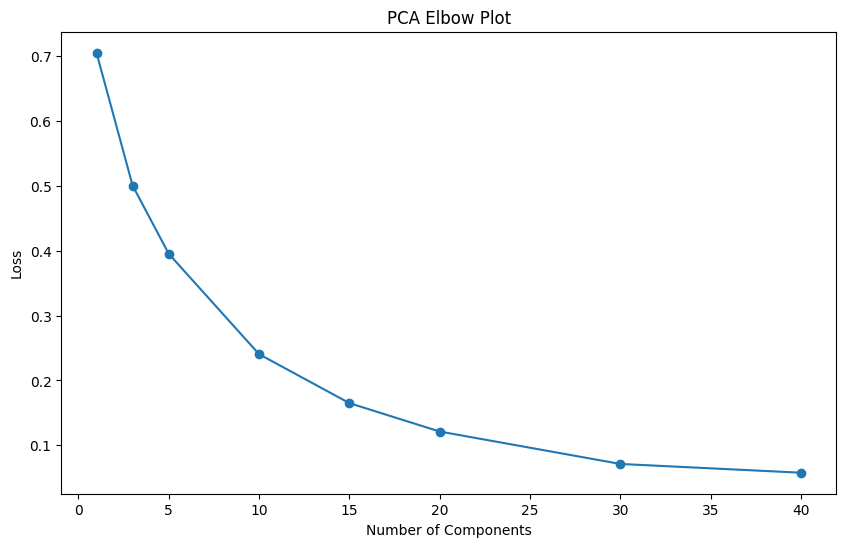

In [290]:
components = list(component_to_loss.keys())
losses = list(component_to_loss.values())

# Create the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(components, losses, marker='o')
plt.title('PCA Elbow Plot')
plt.xlabel('Number of Components')
plt.ylabel('Loss')
plt.show()

I will try with 5, 15 and 30 components.

In [310]:
number_of_components = 5

#### use PCA to get PC codings

encoder = tf.keras.Sequential([tf.keras.layers.Dense(number_of_components, input_shape=(X_sub_train_standardized.shape[1], ))])
decoder = tf.keras.Sequential([tf.keras.layers.Dense(X_sub_train_standardized.shape[1])])

autoencoder = tf.keras.Sequential([encoder, decoder])
autoencoder.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

autoencoder.fit(X_sub_train_standardized, X_sub_train_standardized, epochs=100, verbose=False)

X_train_PC_codings = encoder.predict(X_sub_train_standardized)
X_validation_PC_codings = encoder.predict(X_validation_standardized)


#### train model using PC codings as input

PCA5_lin_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_train_PC_codings.shape[1],), activation='linear')
])

PCA5_lin_reg.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),  metrics=[tf.keras.metrics.R2Score()])

history = PCA5_lin_reg.fit(
    X_train_PC_codings,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_PC_codings, Y_validation_standardized)
)

PCA5_history = pd.DataFrame(history.history)

15/15 [==============================] - 0s 2ms/step
Epoch 1/100
57/57 [==============================] - 1s 9ms/step - loss: 3.0619 - r2_score: -2.0635 - val_loss: 3.4829 - val_r2_score: -2.0804
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 2.8284 - r2_score: -1.8299 - val_loss: 3.2234 - val_r2_score: -1.8509
Epoch 3/100
57/57 [==============================] - 0s 4ms/step - loss: 2.6434 - r2_score: -1.6449 - val_loss: 2.9558 - val_r2_score: -1.6142
Epoch 4/100
57/57 [==============================] - 0s 4ms/step - loss: 2.4806 - r2_score: -1.4820 - val_loss: 2.7548 - val_r2_score: -1.4364
Epoch 5/100
57/57 [==============================] - 0s 4ms/step - loss: 2.3360 - r2_score: -1.3373 - val_loss: 2.5884 - val_r2_score: -1.2893
Epoch 6/100
57/57 [==============================] - 0s 4ms/step - loss: 2.2108 - r2_score: -1.2120 - val_loss: 2.4243 - val_r2_score: -1.1442
Epoch 7/100
57/57 [==============================] - 0s 4ms/step - loss: 2.0968 - r2_scor

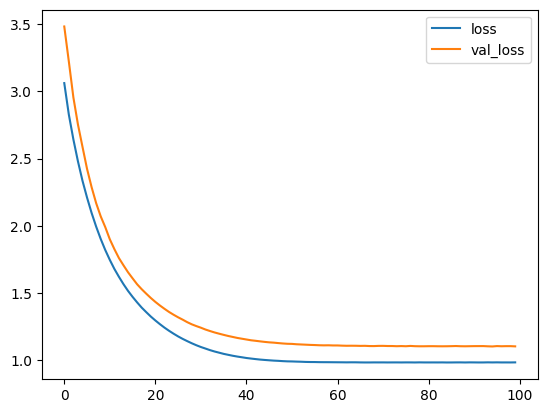

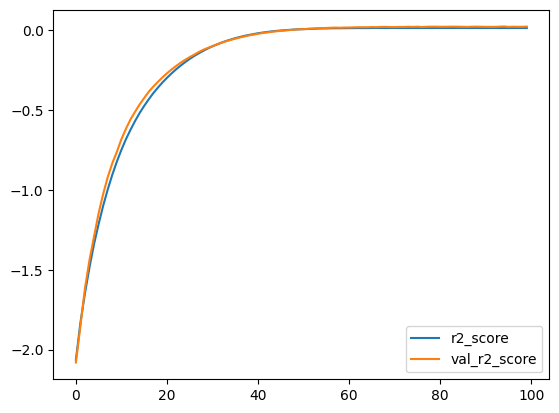

In [311]:
PCA5_history[['loss', 'val_loss']].plot()
plt.show()

PCA5_history[['r2_score', 'val_r2_score']].plot()
plt.show()

In [312]:
number_of_components = 15

#### use PCA to get PC codings

encoder = tf.keras.Sequential([tf.keras.layers.Dense(number_of_components, input_shape=(X_sub_train_standardized.shape[1], ))])
decoder = tf.keras.Sequential([tf.keras.layers.Dense(X_sub_train_standardized.shape[1])])

autoencoder = tf.keras.Sequential([encoder, decoder])
autoencoder.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

autoencoder.fit(X_sub_train_standardized, X_sub_train_standardized, epochs=100, verbose=False)

X_train_PC_codings = encoder.predict(X_sub_train_standardized)
X_validation_PC_codings = encoder.predict(X_validation_standardized)


#### train model using PC codings as input

PCA15_lin_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_train_PC_codings.shape[1],), activation='linear')
])

PCA15_lin_reg.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),  metrics=[tf.keras.metrics.R2Score()])

history = PCA15_lin_reg.fit(
    X_train_PC_codings,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_PC_codings, Y_validation_standardized)
)

PCA15_history = pd.DataFrame(history.history)

15/15 [==============================] - 0s 2ms/step
Epoch 1/100
57/57 [==============================] - 1s 7ms/step - loss: 6.0371 - r2_score: -5.0405 - val_loss: 9.0045 - val_r2_score: -6.9639
Epoch 2/100
57/57 [==============================] - 0s 3ms/step - loss: 4.6621 - r2_score: -3.6647 - val_loss: 6.6703 - val_r2_score: -4.8995
Epoch 3/100
57/57 [==============================] - 0s 3ms/step - loss: 3.7893 - r2_score: -2.7914 - val_loss: 4.9655 - val_r2_score: -3.3917
Epoch 4/100
57/57 [==============================] - 0s 3ms/step - loss: 3.1151 - r2_score: -2.1168 - val_loss: 3.9964 - val_r2_score: -2.5345
Epoch 5/100
57/57 [==============================] - 0s 3ms/step - loss: 2.6513 - r2_score: -1.6528 - val_loss: 3.2736 - val_r2_score: -1.8953
Epoch 6/100
57/57 [==============================] - 0s 4ms/step - loss: 2.2985 - r2_score: -1.2998 - val_loss: 2.7962 - val_r2_score: -1.4731
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 2.0310 - r2_scor

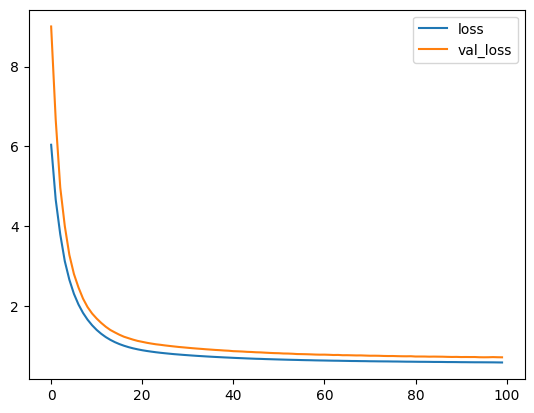

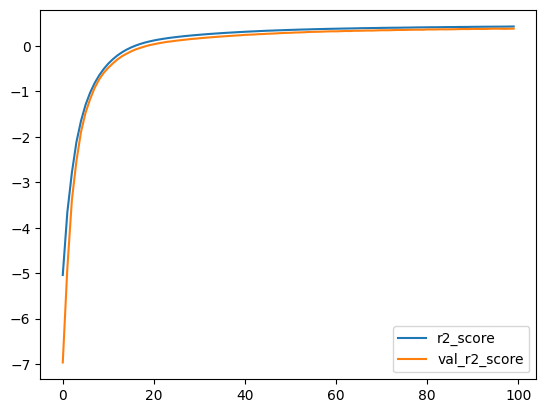

In [313]:
PCA15_history[['loss', 'val_loss']].plot()
plt.show()

PCA15_history[['r2_score', 'val_r2_score']].plot()
plt.show()

In [314]:
number_of_components = 30

#### use PCA to get PC codings

encoder = tf.keras.Sequential([tf.keras.layers.Dense(number_of_components, input_shape=(X_sub_train_standardized.shape[1], ))])
decoder = tf.keras.Sequential([tf.keras.layers.Dense(X_sub_train_standardized.shape[1])])

autoencoder = tf.keras.Sequential([encoder, decoder])
autoencoder.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

autoencoder.fit(X_sub_train_standardized, X_sub_train_standardized, epochs=100, verbose=False)

X_train_PC_codings = encoder.predict(X_sub_train_standardized)
X_validation_PC_codings = encoder.predict(X_validation_standardized)


#### train model using PC codings as input

PCA30_lin_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_train_PC_codings.shape[1],), activation='linear')
])

PCA30_lin_reg.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),  metrics=[tf.keras.metrics.R2Score()])

history = PCA30_lin_reg.fit(
    X_train_PC_codings,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_PC_codings, Y_validation_standardized)
)

PCA30_history = pd.DataFrame(history.history)

15/15 [==============================] - 0s 2ms/step
Epoch 1/100
57/57 [==============================] - 1s 9ms/step - loss: 2.6047 - r2_score: -1.6062 - val_loss: 2.7711 - val_r2_score: -1.4509
Epoch 2/100
57/57 [==============================] - 0s 7ms/step - loss: 2.0030 - r2_score: -1.0041 - val_loss: 2.0173 - val_r2_score: -0.7841
Epoch 3/100
57/57 [==============================] - 0s 6ms/step - loss: 1.6897 - r2_score: -0.6906 - val_loss: 1.6750 - val_r2_score: -0.4814
Epoch 4/100
57/57 [==============================] - 0s 5ms/step - loss: 1.5080 - r2_score: -0.5088 - val_loss: 1.4938 - val_r2_score: -0.3211
Epoch 5/100
57/57 [==============================] - 0s 4ms/step - loss: 1.3761 - r2_score: -0.3769 - val_loss: 1.3734 - val_r2_score: -0.2147
Epoch 6/100
57/57 [==============================] - 0s 5ms/step - loss: 1.2697 - r2_score: -0.2704 - val_loss: 1.2711 - val_r2_score: -0.1242
Epoch 7/100
57/57 [==============================] - 0s 5ms/step - loss: 1.1720 - r2_scor

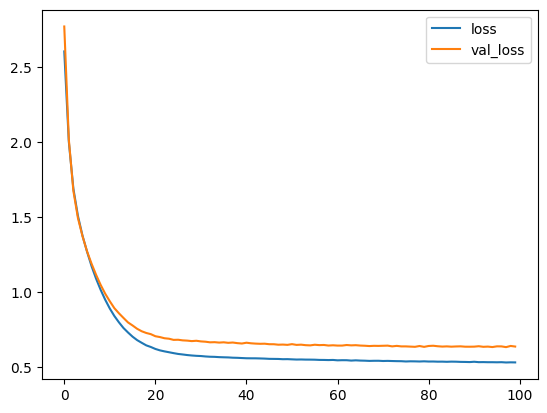

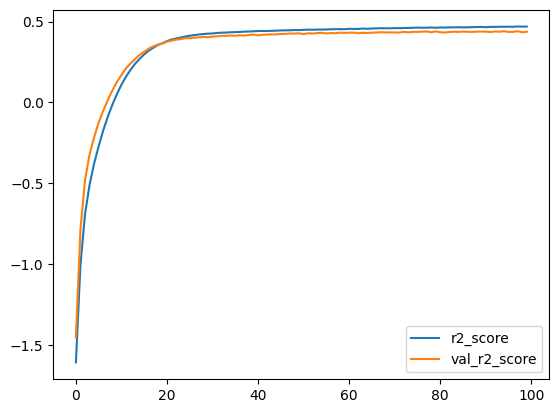

In [315]:
PCA30_history[['loss', 'val_loss']].plot()
plt.show()

PCA30_history[['r2_score', 'val_r2_score']].plot()
plt.show()

Make an overall comparison of validation losses and r2 scores

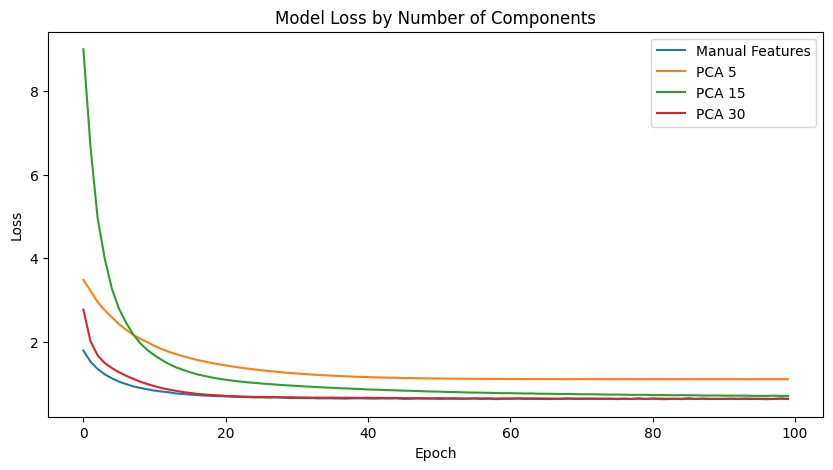

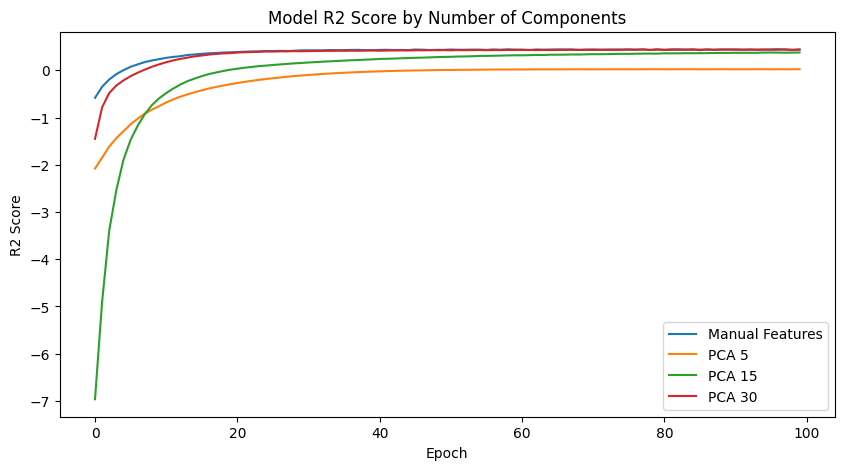

In [350]:
# Plot for loss comparison
plt.figure(figsize=(10, 5))
plt.plot(manual_history['val_loss'], label='Manual Features')
plt.plot(PCA5_history['val_loss'], label='PCA 5')
plt.plot(PCA15_history['val_loss'], label='PCA 15')
plt.plot(PCA30_history['val_loss'], label='PCA 30')
plt.title('Model Loss by Number of Components')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot for R2 comparison
plt.figure(figsize=(10, 5))
plt.plot(manual_history['val_r2_score'], label='Manual Features')
plt.plot(PCA5_history['val_r2_score'], label='PCA 5')
plt.plot(PCA15_history['val_r2_score'], label='PCA 15')
plt.plot(PCA30_history['val_r2_score'], label='PCA 30')
plt.title('Model R2 Score by Number of Components')
plt.xlabel('Epoch')
plt.ylabel('R2 Score')
plt.legend()
plt.show()


Comment: it seems that PCA is not helping our model perform better wrt to the baseline. Indeed, among the three PCA models, the one performing better is the one with the highest number of components, i.e. 30, which is close to the number of features of the dataset. The model with 30 PC has a similar loss and R2 as the model in which PCA is not performed at all. ALso, the model with 15 components, performes similarly, if trained on enough epochs. The models with 5 performs poorly, no matter the nuber of epochs.  

# Question 3 (12.5 points): Dense Networks to Predict and Testing Different Loss Functions
<br>

- To increase complexity, build a dense network with 4 hidden layers and 15 neurons each.

- Use the ADAM optimizer with a learning rate of $1e-4$, a Swish activation function and a He normal initialization for the weights (kernel).

- You can determine the number of epochs you want to run, it should be at least 300, with a batch size of 32.

- Train your model using four different loss functions (you may need to look some of them up):

  - mean squared error (MSE),
  
  - mean absolute error (MAE),
  
  - $R^2$,

  - and a Huber loss function.

- For this specific architecture, which loss function performed best when training your model?

In [341]:
# number_of_componenets = 15

# encoder = tf.keras.Sequential([tf.keras.layers.Dense(number_of_components, input_shape=(X_sub_train_standardized.shape[1], ))])
# decoder = tf.keras.Sequential([tf.keras.layers.Dense(X_sub_train_standardized.shape[1])])

# autoencoder = tf.keras.Sequential([encoder, decoder])
# autoencoder.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

# autoencoder.fit(X_sub_train_standardized, X_sub_train_standardized, epochs=100, verbose=False)

# X_train_PC_codings = encoder.predict(X_sub_train_standardized)
# X_validation_PC_codings = encoder.predict(X_validation_standardized)

15/15 [==============================] - 0s 1ms/step


In [346]:
epochs = 350
learning_rate = 1e-4
batch_size = 32

n_units = 15
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
activation = tf.keras.activations.swish
kernel_initializer = tf.keras.initializers.HeNormal()

## MSE loss

In [336]:
tf.keras.utils.set_random_seed(42)

mse_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_sub_train_standardized.shape[1]),
    tf.keras.layers.Dense(units=n_units, activation=activation),
    tf.keras.layers.Dense(units=n_units, activation=activation),
    tf.keras.layers.Dense(units=n_units, activation=activation),
    tf.keras.layers.Dense(units=n_units, activation=activation),
    tf.keras.layers.Dense(units=1)
])

mse_model.compile(
    loss="mse",
    optimizer=optimizer,
    metrics=[tf.keras.metrics.R2Score()]
)

history = mse_model.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized)
)

mse_history = pd.DataFrame(history.history)

Epoch 1/500
57/57 [==============================] - 2s 8ms/step - loss: 0.9643 - r2_score: 0.0352 - val_loss: 1.0781 - val_r2_score: 0.0465
Epoch 2/500
57/57 [==============================] - 0s 4ms/step - loss: 0.9453 - r2_score: 0.0542 - val_loss: 1.0662 - val_r2_score: 0.0570
Epoch 3/500
57/57 [==============================] - 0s 3ms/step - loss: 0.9272 - r2_score: 0.0723 - val_loss: 1.0535 - val_r2_score: 0.0683
Epoch 4/500
57/57 [==============================] - 0s 4ms/step - loss: 0.9085 - r2_score: 0.0910 - val_loss: 1.0396 - val_r2_score: 0.0805
Epoch 5/500
57/57 [==============================] - 0s 4ms/step - loss: 0.8882 - r2_score: 0.1113 - val_loss: 1.0239 - val_r2_score: 0.0944
Epoch 6/500
57/57 [==============================] - 0s 4ms/step - loss: 0.8656 - r2_score: 0.1339 - val_loss: 1.0065 - val_r2_score: 0.1098
Epoch 7/500
57/57 [==============================] - 0s 4ms/step - loss: 0.8402 - r2_score: 0.1593 - val_loss: 0.9860 - val_r2_score: 0.1280
Epoch 8/500
5

In [ ]:
mse_history[['loss', 'val_loss']].plot()
plt.show()

mse_history[['r2_score', 'val_r2_score']].plot()
plt.show()

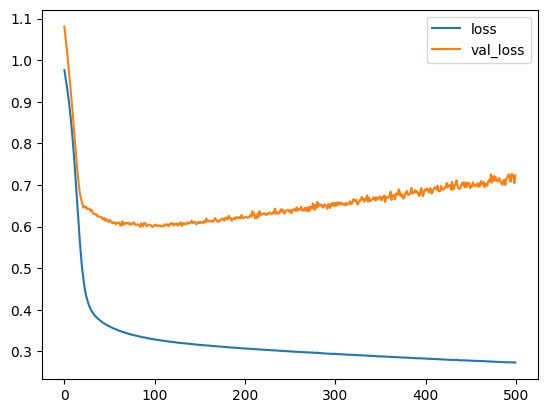

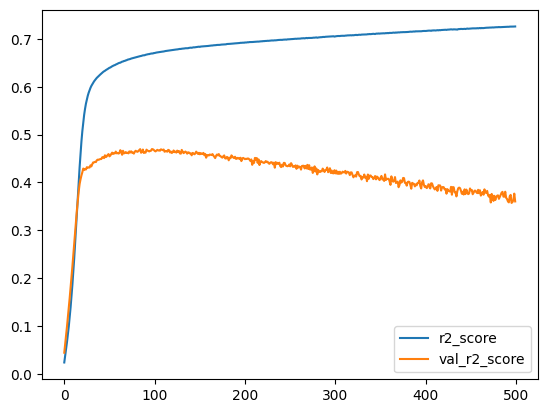

In [324]:
mse_history[['loss', 'val_loss']].plot()
plt.show()

mse_history[['r2_score', 'val_r2_score']].plot()
plt.show()

clearly overfitting

## MAE loss

In [325]:
tf.keras.utils.set_random_seed(42)

mae_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_sub_train_standardized.shape[1]),
    tf.keras.layers.Dense(units=n_units, activation=activation),
    tf.keras.layers.Dense(units=n_units, activation=activation),
    tf.keras.layers.Dense(units=n_units, activation=activation),
    tf.keras.layers.Dense(units=n_units, activation=activation),
    tf.keras.layers.Dense(units=1)
])

mae_model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = mae_model.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized)
)

mae_history = pd.DataFrame(history.history)

Epoch 1/500
57/57 [==============================] - 2s 9ms/step - loss: 0.7744 - r2_score: 0.0230 - val_loss: 0.7582 - val_r2_score: 0.0392
Epoch 2/500
57/57 [==============================] - 0s 3ms/step - loss: 0.7676 - r2_score: 0.0357 - val_loss: 0.7522 - val_r2_score: 0.0506
Epoch 3/500
57/57 [==============================] - 0s 3ms/step - loss: 0.7615 - r2_score: 0.0473 - val_loss: 0.7462 - val_r2_score: 0.0642
Epoch 4/500
57/57 [==============================] - 0s 3ms/step - loss: 0.7556 - r2_score: 0.0594 - val_loss: 0.7400 - val_r2_score: 0.0789
Epoch 5/500
57/57 [==============================] - 0s 3ms/step - loss: 0.7495 - r2_score: 0.0722 - val_loss: 0.7328 - val_r2_score: 0.0947
Epoch 6/500
57/57 [==============================] - 0s 4ms/step - loss: 0.7429 - r2_score: 0.0856 - val_loss: 0.7255 - val_r2_score: 0.1100
Epoch 7/500
57/57 [==============================] - 0s 3ms/step - loss: 0.7359 - r2_score: 0.1016 - val_loss: 0.7169 - val_r2_score: 0.1311
Epoch 8/500
5

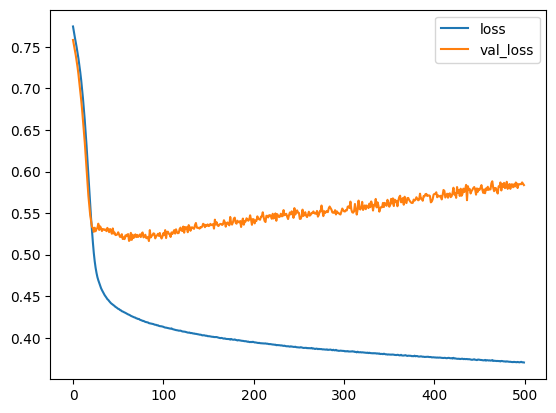

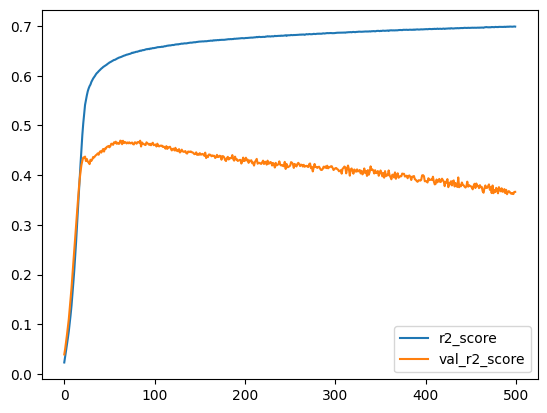

In [326]:
mae_history[['loss', 'val_loss']].plot()
plt.show()

mae_history[['r2_score', 'val_r2_score']].plot()
plt.show()

## R2 loss

In [328]:
def r2_loss(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    r2 = 1 - (ss_res / ss_tot)
    return 1 - r2

In [329]:
tf.keras.utils.set_random_seed(42)

r2_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_sub_train_standardized.shape[1]),
    tf.keras.layers.Dense(units=n_units, activation=activation),
    tf.keras.layers.Dense(units=n_units, activation=activation),
    tf.keras.layers.Dense(units=n_units, activation=activation),
    tf.keras.layers.Dense(units=n_units, activation=activation),
    tf.keras.layers.Dense(units=1)
])

r2_model.compile(
    loss=r2_loss,
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = r2_model.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized)
)

r2_history = pd.DataFrame(history.history)

Epoch 1/500
57/57 [==============================] - 2s 8ms/step - loss: 1.0066 - r2_score: 0.0234 - val_loss: 1.0047 - val_r2_score: 0.0434
Epoch 2/500
57/57 [==============================] - 0s 3ms/step - loss: 0.9939 - r2_score: 0.0376 - val_loss: 0.9871 - val_r2_score: 0.0605
Epoch 3/500
57/57 [==============================] - 0s 4ms/step - loss: 0.9721 - r2_score: 0.0514 - val_loss: 0.9693 - val_r2_score: 0.0783
Epoch 4/500
57/57 [==============================] - 0s 3ms/step - loss: 0.9726 - r2_score: 0.0654 - val_loss: 0.9522 - val_r2_score: 0.0953
Epoch 5/500
57/57 [==============================] - 0s 4ms/step - loss: 0.9530 - r2_score: 0.0803 - val_loss: 0.9345 - val_r2_score: 0.1130
Epoch 6/500
57/57 [==============================] - 0s 4ms/step - loss: 0.9351 - r2_score: 0.0964 - val_loss: 0.9161 - val_r2_score: 0.1318
Epoch 7/500
57/57 [==============================] - 0s 3ms/step - loss: 0.9242 - r2_score: 0.1147 - val_loss: 0.8965 - val_r2_score: 0.1530
Epoch 8/500
5

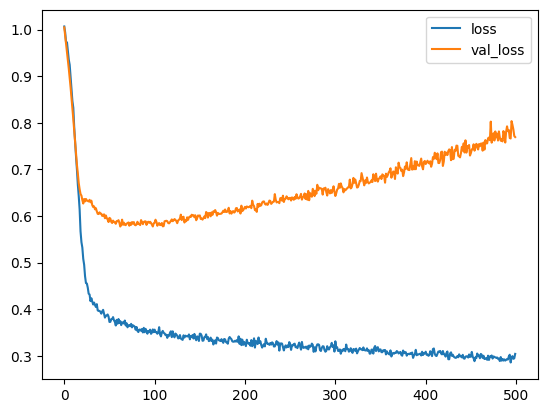

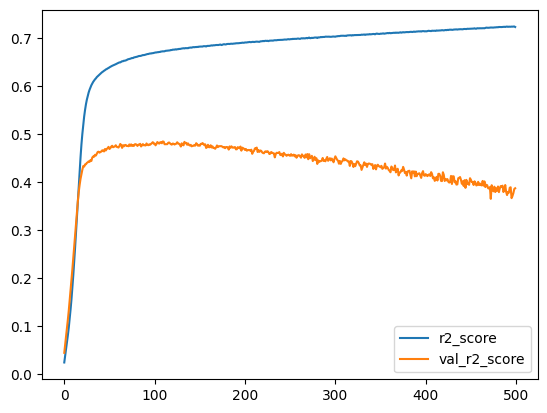

In [330]:
r2_history[['loss', 'val_loss']].plot()
plt.show()

r2_history[['r2_score', 'val_r2_score']].plot()
plt.show()

## Huber loss

In [343]:
tf.keras.utils.set_random_seed(42)

huber_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_sub_train_standardized.shape[1]),
    tf.keras.layers.Dense(units=n_units, activation=activation),
    tf.keras.layers.Dense(units=n_units, activation=activation),
    tf.keras.layers.Dense(units=n_units, activation=activation),
    tf.keras.layers.Dense(units=n_units, activation=activation),
    tf.keras.layers.Dense(units=1)
])

huber_model.compile(
    loss="huber",
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = huber_model.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized)
)

huber_history = pd.DataFrame(history.history)

Epoch 1/350
57/57 [==============================] - 2s 7ms/step - loss: 0.4064 - r2_score: 0.0352 - val_loss: 0.3958 - val_r2_score: 0.0452
Epoch 2/350
57/57 [==============================] - 0s 4ms/step - loss: 0.3990 - r2_score: 0.0539 - val_loss: 0.3914 - val_r2_score: 0.0539
Epoch 3/350
57/57 [==============================] - 0s 3ms/step - loss: 0.3919 - r2_score: 0.0715 - val_loss: 0.3870 - val_r2_score: 0.0638
Epoch 4/350
57/57 [==============================] - 0s 3ms/step - loss: 0.3848 - r2_score: 0.0897 - val_loss: 0.3823 - val_r2_score: 0.0744
Epoch 5/350
57/57 [==============================] - 0s 3ms/step - loss: 0.3772 - r2_score: 0.1087 - val_loss: 0.3769 - val_r2_score: 0.0868
Epoch 6/350
57/57 [==============================] - 0s 4ms/step - loss: 0.3687 - r2_score: 0.1305 - val_loss: 0.3708 - val_r2_score: 0.1007
Epoch 7/350
57/57 [==============================] - 0s 3ms/step - loss: 0.3591 - r2_score: 0.1555 - val_loss: 0.3637 - val_r2_score: 0.1181
Epoch 8/350
5

In [340]:
X_validation_PC_codings.shape

(455, 30)

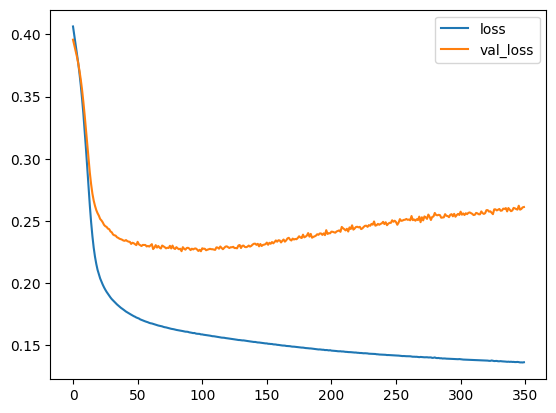

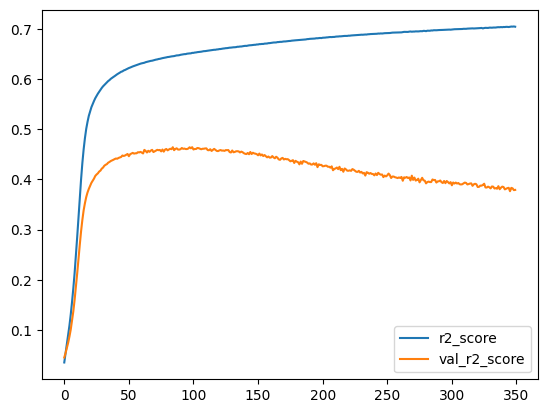

In [345]:
huber_history[['loss', 'val_loss']].plot()
plt.show()

huber_history[['r2_score', 'val_r2_score']].plot()
plt.show()

<Axes: >

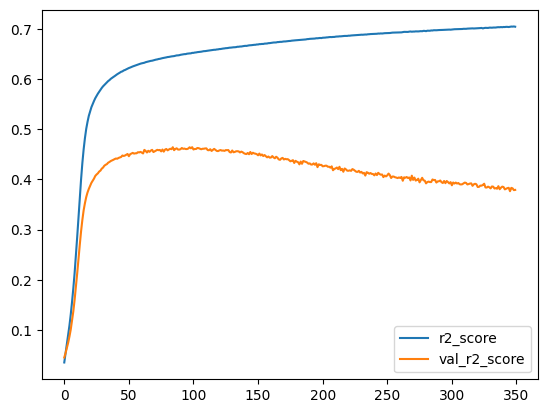

In [347]:
huber_history[['r2_score', 'val_r2_score']].plot()

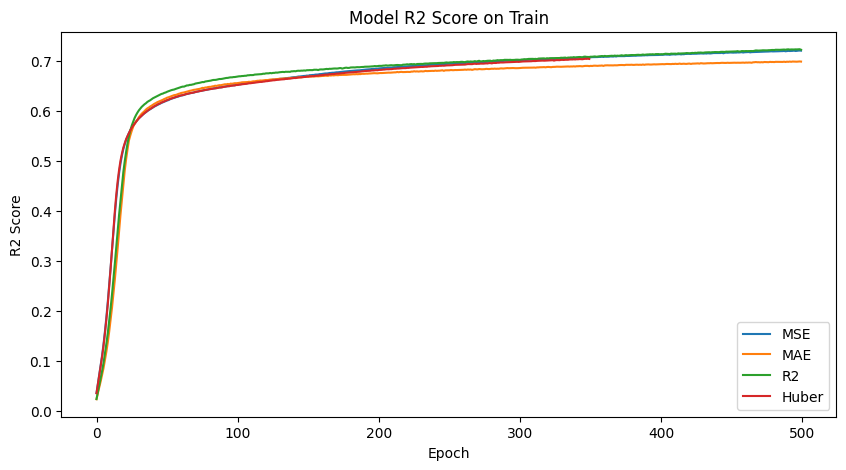

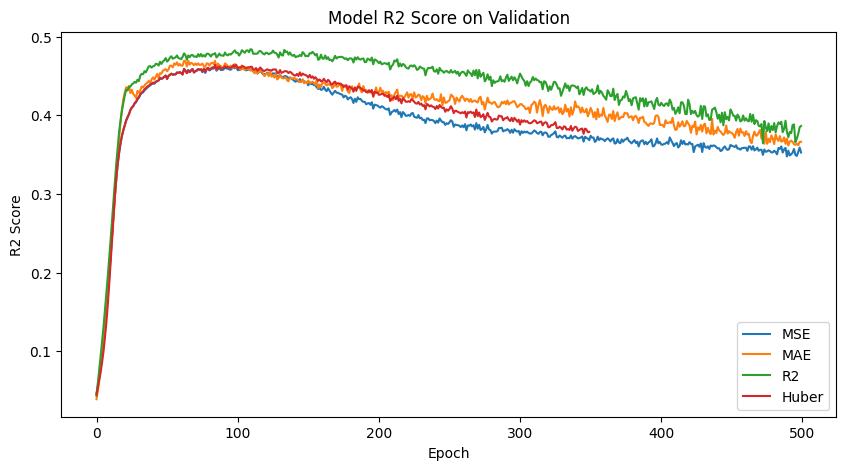

In [351]:
# Plot for R2 comparison
plt.figure(figsize=(10, 5))
plt.plot(mse_history['r2_score'], label='MSE')
plt.plot(mae_history['r2_score'], label='MAE')
plt.plot(r2_history['r2_score'], label='R2')
plt.plot(huber_history['r2_score'], label='Huber')
plt.title('Model R2 Score on Train')
plt.xlabel('Epoch')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

# Plot for R2 comparison
plt.figure(figsize=(10, 5))
plt.plot(mse_history['val_r2_score'], label='MSE')
plt.plot(mae_history['val_r2_score'], label='MAE')
plt.plot(r2_history['val_r2_score'], label='R2')
plt.plot(huber_history['val_r2_score'], label='Huber')
plt.title('Model R2 Score on Validation')
plt.xlabel('Epoch')
plt.ylabel('R2 Score')
plt.legend()
plt.show()


All the models seem to suffer from overfitting. Indeed, while the R2 keeps increasing, around 100 we have a drop in R2 on the validation data set. I am not sure if this is double descent: it seems that the downward trend is pretty stable, so I don't expect that, increasing the number of epochs, the R2 on validation will again start increasing. I believe the best solution would be to introduce some penalization for overfitting, i.e. using L2 loss or dropout.
Overall, the model trained using R2 as a loss seems to perform better than the others. Indeed, although this model is overfitting too, the R2 is always higher than the same metric for all the other models.

# Question 4 (12.5 points): Train Five Different Architectures and Motivate Each One
<br>

- You should build at least five different architectures using dense layers.

  - At least two of them should require you to use the Functional API (that is, they should not work with the Sequential API) and be different from the ones we used in class.

- Write a succinct motivation as to why you are testing your particular architectures.

- Which architecture performed the best?

Note: I won't use techniques such as dropu or other techniques to reduce overfitting and gradient problems, as I see that these must be used in the following sections. Therefore, I will focus on the number of layers/units and their connections.

In [376]:
epochs = 200

## Model 1 - Basic NN

A basic feedforward neural network, aka a Multilayer Perceptron (MLP), can be used as a foundational model to establish a performance baseline. Its simplicity allows for rapid training and can capture the direct associations between the given input features and the target variable without temporal dynamics, which is useful to understand the necessity of more complex models.

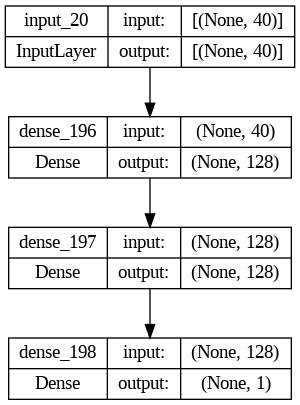

In [377]:
tf.keras.utils.set_random_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_sub_train_standardized.shape[1]),
    tf.keras.layers.Dense(units=128, activation=activation),
    tf.keras.layers.Dense(units=128, activation=activation),
    tf.keras.layers.Dense(units=1)
])

tf.keras.utils.plot_model(model_1, show_shapes=True, show_layer_names=True)

In [378]:
model_1.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = model_1.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized)
)

history_1 = pd.DataFrame(history.history)

Epoch 1/200
57/57 [==============================] - 1s 10ms/step - loss: 0.7356 - r2_score: 0.1122 - val_loss: 0.7043 - val_r2_score: 0.1647
Epoch 2/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6668 - r2_score: 0.2482 - val_loss: 0.6556 - val_r2_score: 0.2536
Epoch 3/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6152 - r2_score: 0.3410 - val_loss: 0.6134 - val_r2_score: 0.3203
Epoch 4/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5717 - r2_score: 0.4069 - val_loss: 0.5925 - val_r2_score: 0.3519
Epoch 5/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5344 - r2_score: 0.4497 - val_loss: 0.5662 - val_r2_score: 0.3799
Epoch 6/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5070 - r2_score: 0.4685 - val_loss: 0.5500 - val_r2_score: 0.3828
Epoch 7/200
57/57 [==============================] - 0s 5ms/step - loss: 0.4884 - r2_score: 0.4823 - val_loss: 0.5435 - val_r2_score: 0.3795
Epoch 8/200


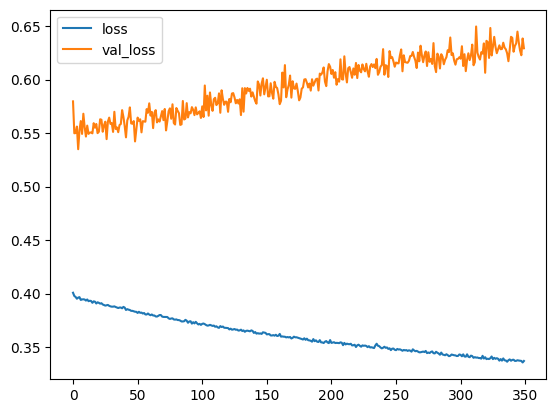

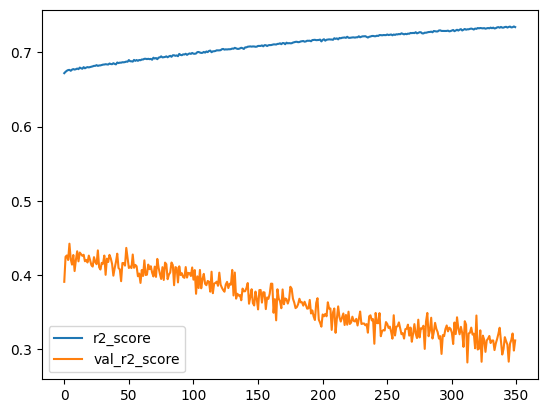

In [374]:
history_1[['loss', 'val_loss']].plot()
plt.show()

history_1[['r2_score', 'val_r2_score']].plot()
plt.show()

## Model 2 - NN with Paths (Functional)

With this archiecture, we might get benefits of memorization and generalization through joint training of both shallow and deep paths in a single model. The short path allows the model to learn specific rules and to ensure that important features can directly influence the output, which is useful for capturing simple associations and interactions. Meanwhile, the deep path allows the model to learn complex patterns and abstract representations from the data.

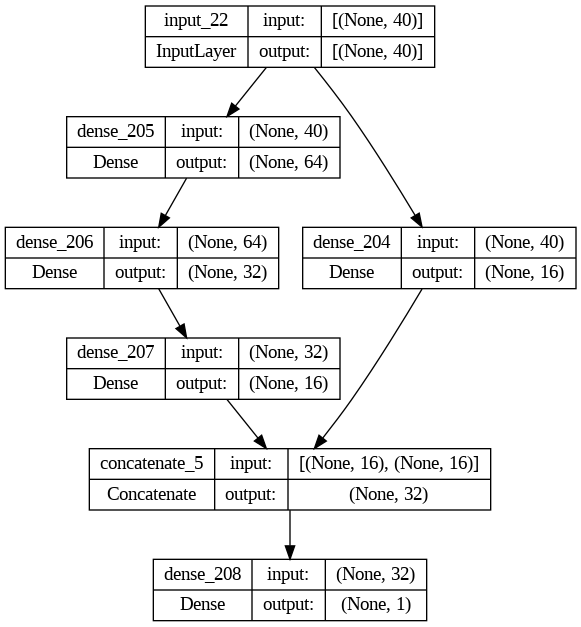

In [380]:
inputs = tf.keras.Input(shape=(X_sub_train_standardized.shape[1],))
wide = tf.keras.layers.Dense(16, activation='relu')(inputs)

deep = tf.keras.layers.Dense(64, activation='relu')(inputs)
deep = tf.keras.layers.Dense(32, activation='relu')(deep)
deep = tf.keras.layers.Dense(16, activation='relu')(deep)

combined = tf.keras.layers.concatenate([wide, deep])
outputs = tf.keras.layers.Dense(1)(combined)
model_2 = tf.keras.Model(inputs=inputs, outputs=outputs)

tf.keras.utils.plot_model(model_2, show_shapes=True, show_layer_names=True)

In [381]:
model_2.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = model_2.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized)
)

history_2 = pd.DataFrame(history.history)

Epoch 1/200
57/57 [==============================] - 2s 11ms/step - loss: 0.8769 - r2_score: -0.2649 - val_loss: 0.8528 - val_r2_score: -0.2869
Epoch 2/200
57/57 [==============================] - 0s 5ms/step - loss: 0.8311 - r2_score: -0.1478 - val_loss: 0.8269 - val_r2_score: -0.2162
Epoch 3/200
57/57 [==============================] - 0s 5ms/step - loss: 0.8034 - r2_score: -0.0816 - val_loss: 0.8059 - val_r2_score: -0.1559
Epoch 4/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7787 - r2_score: -0.0177 - val_loss: 0.7869 - val_r2_score: -0.0999
Epoch 5/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7561 - r2_score: 0.0386 - val_loss: 0.7682 - val_r2_score: -0.0493
Epoch 6/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7325 - r2_score: 0.0961 - val_loss: 0.7484 - val_r2_score: 0.0087
Epoch 7/200
57/57 [==============================] - 0s 6ms/step - loss: 0.7083 - r2_score: 0.1503 - val_loss: 0.7302 - val_r2_score: 0.0579
Epo

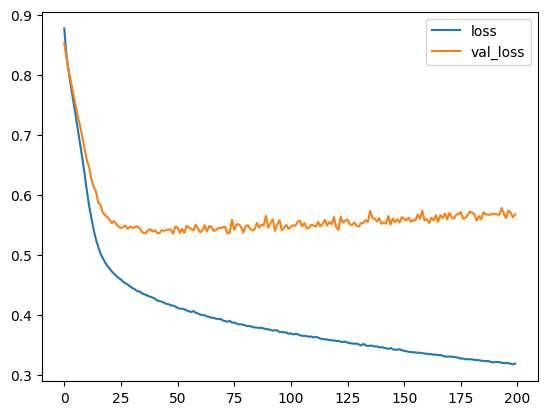

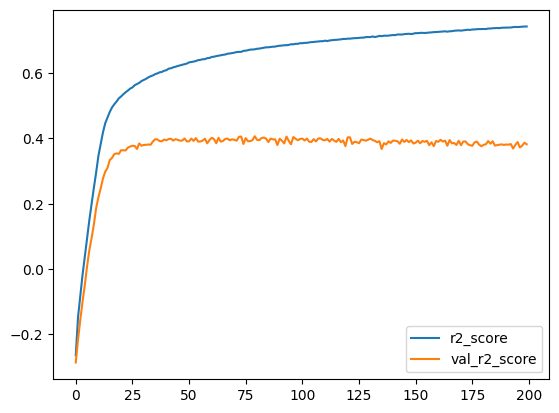

In [382]:
history_2[['loss', 'val_loss']].plot()
plt.show()

history_2[['r2_score', 'val_r2_score']].plot()
plt.show()

## Model 3 - NN with Residual Connections (functional)

Residual connections allow then NN to help prevent the problem of vanishing gradients in deep networks, making it possible to build very deep architectures. When applied to time series forecasting, ResNets can allow for more complex transformations of the input data while still preserving the original feature.

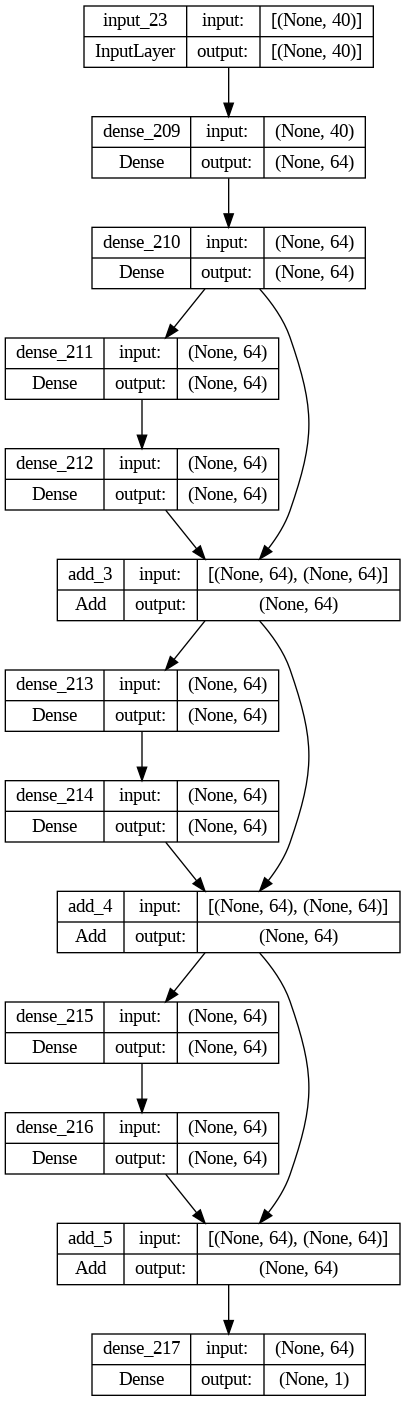

In [383]:
inputs = tf.keras.Input(shape=(X_sub_train_standardized.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)

for _ in range(3):
    shortcut = x
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.add([x, shortcut])

outputs = tf.keras.layers.Dense(1)(x)
model_3 = tf.keras.Model(inputs=inputs, outputs=outputs)

tf.keras.utils.plot_model(model_3, show_shapes=True, show_layer_names=True)

In [384]:
model_3.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = model_3.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized)
)

history_3 = pd.DataFrame(history.history)

Epoch 1/200
57/57 [==============================] - 3s 9ms/step - loss: 1.0342 - r2_score: -1.0776 - val_loss: 0.8564 - val_r2_score: -0.3284
Epoch 2/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7549 - r2_score: 0.0203 - val_loss: 0.7522 - val_r2_score: -0.0059
Epoch 3/200
57/57 [==============================] - 0s 4ms/step - loss: 0.6636 - r2_score: 0.2308 - val_loss: 0.6989 - val_r2_score: 0.1202
Epoch 4/200
57/57 [==============================] - 0s 4ms/step - loss: 0.6034 - r2_score: 0.3380 - val_loss: 0.6562 - val_r2_score: 0.1989
Epoch 5/200
57/57 [==============================] - 0s 4ms/step - loss: 0.5715 - r2_score: 0.3848 - val_loss: 0.6474 - val_r2_score: 0.2543
Epoch 6/200
57/57 [==============================] - 0s 5ms/step - loss: 0.5391 - r2_score: 0.4361 - val_loss: 0.6137 - val_r2_score: 0.3007
Epoch 7/200
57/57 [==============================] - 0s 6ms/step - loss: 0.5183 - r2_score: 0.4696 - val_loss: 0.5920 - val_r2_score: 0.3383
Epoch 8/20

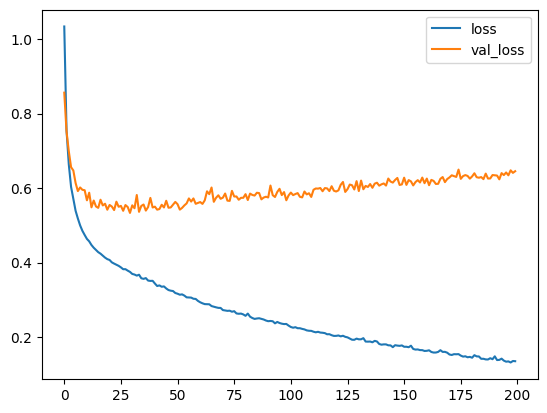

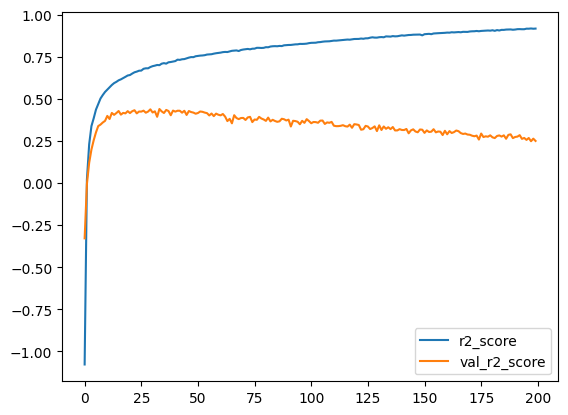

In [385]:
history_3[['loss', 'val_loss']].plot()
plt.show()

history_3[['r2_score', 'val_r2_score']].plot()
plt.show()

## Model 4: NN with Attention (functional)

The attention mechanism has revolutionized the field of sequence modeling by enabling models to focus on different parts of the input sequence when making predictions. I personally have never used it, but I know it comes very useful when the data is correlated over time, so I took this assignment as a chance to try to understand it better and implement it.

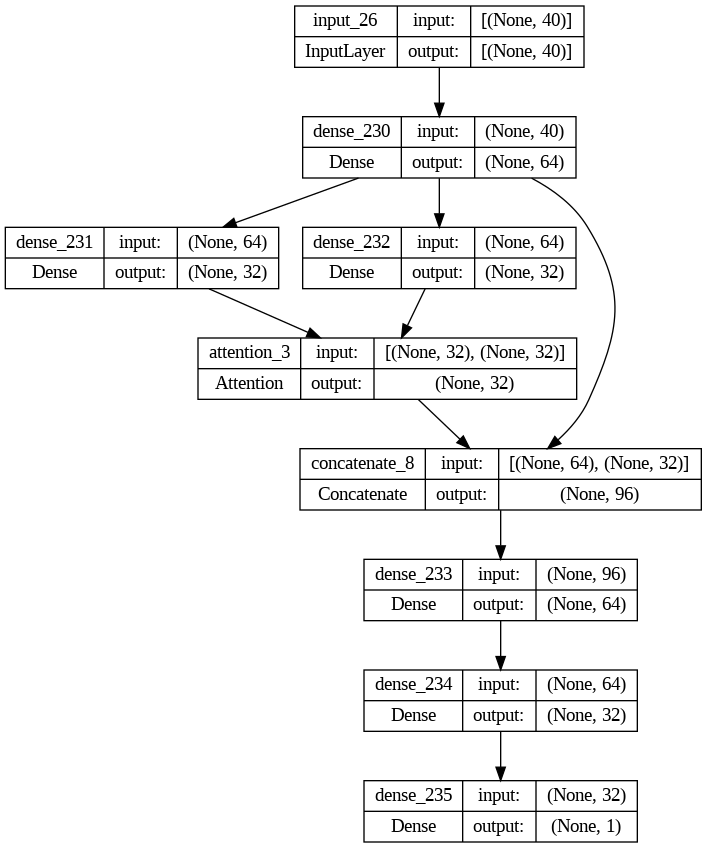

In [388]:
inputs = tf.keras.Input(shape=(X_sub_train_standardized.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)

# Apply attention
query = tf.keras.layers.Dense(32, activation='relu')(x)
value = tf.keras.layers.Dense(32, activation='relu')(x)
attention = tf.keras.layers.Attention()([query, value])
context = tf.keras.layers.Concatenate()([x, attention])

x = tf.keras.layers.Dense(64, activation='relu')(context)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)
model_4 = tf.keras.Model(inputs=inputs, outputs=outputs)

tf.keras.utils.plot_model(model_4, show_shapes=True, show_layer_names=True)

In [389]:
model_4.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = model_4.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized)
)

history_4 = pd.DataFrame(history.history)

Epoch 1/200
57/57 [==============================] - 2s 8ms/step - loss: 0.7927 - r2_score: -0.0468 - val_loss: 0.7915 - val_r2_score: -0.0215
Epoch 2/200
57/57 [==============================] - 0s 4ms/step - loss: 0.7646 - r2_score: 0.0303 - val_loss: 0.7828 - val_r2_score: -0.0084
Epoch 3/200
57/57 [==============================] - 0s 4ms/step - loss: 0.7505 - r2_score: 0.0691 - val_loss: 0.7628 - val_r2_score: 0.0328
Epoch 4/200
57/57 [==============================] - 0s 4ms/step - loss: 0.7208 - r2_score: 0.1292 - val_loss: 0.7433 - val_r2_score: 0.0745
Epoch 5/200
57/57 [==============================] - 0s 5ms/step - loss: 0.7016 - r2_score: 0.1624 - val_loss: 0.7227 - val_r2_score: 0.1170
Epoch 6/200
57/57 [==============================] - 0s 4ms/step - loss: 0.6869 - r2_score: 0.2029 - val_loss: 0.7013 - val_r2_score: 0.1652
Epoch 7/200
57/57 [==============================] - 0s 3ms/step - loss: 0.6468 - r2_score: 0.2814 - val_loss: 0.6826 - val_r2_score: 0.1997
Epoch 8/20

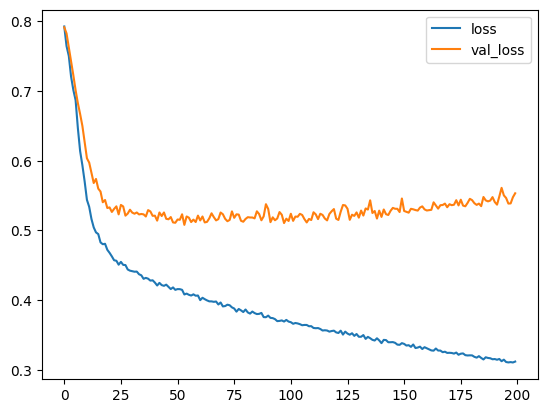

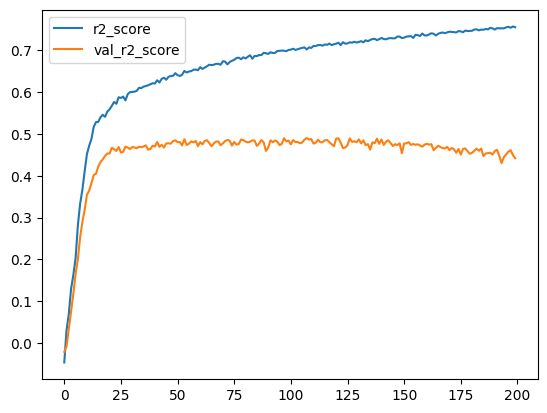

In [390]:
history_4[['loss', 'val_loss']].plot()
plt.show()

history_4[['r2_score', 'val_r2_score']].plot()
plt.show()

## Model 5 - RNN

 Simple RNNs are the building blocks of more complex recurrent networks and are used to test the temporal sequence's impact on the forecasting performance. They can model time dependencies when the influence of past data points is relatively short-term, which is believe is the case in blochain transactions.

In [396]:
# Function to reshape the data into [samples, timesteps, features]
def create_sequences(X, y, timesteps):
    Xs, ys = [], []
    for i in range(len(X) - timesteps):
        Xs.append(X.iloc[i:(i + timesteps)].values)
        ys.append(y.iloc[i + timesteps])
    return np.array(Xs), np.array(ys)

# Reshape each subset
timesteps = 10
X_sub_train_seq, Y_sub_train_seq = create_sequences(X_sub_train_standardized, Y_sub_train_standardized, timesteps)
X_validation_seq, Y_validation_seq = create_sequences(X_validation_standardized, Y_validation_standardized, timesteps)
X_test_seq, Y_test_seq = create_sequences(X_test_standardized, Y_test_standardized, timesteps)

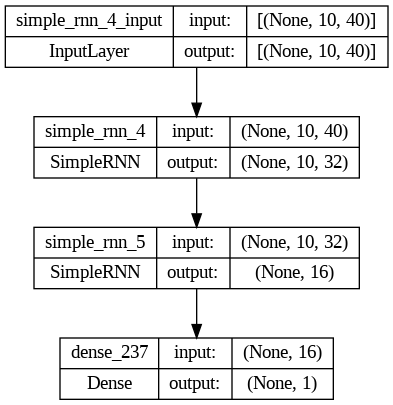

In [397]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, activation='relu', input_shape=(timesteps, X_sub_train_standardized.shape[1]), return_sequences=True),
    tf.keras.layers.SimpleRNN(16, activation='relu', return_sequences=False),
    tf.keras.layers.Dense(1)
])

tf.keras.utils.plot_model(model_5, show_shapes=True, show_layer_names=True)

In [398]:
model_5.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = model_5.fit(
    X_sub_train_seq, Y_sub_train_seq,
    epochs=epochs,
    batch_size=32,
    validation_data=(X_validation_seq, Y_validation_seq)
)

history_5 = pd.DataFrame(history.history)

Epoch 1/200
57/57 [==============================] - 10s 28ms/step - loss: 0.9277 - r2_score: -0.6018 - val_loss: 0.9727 - val_r2_score: -0.5588
Epoch 2/200
57/57 [==============================] - 1s 14ms/step - loss: 0.8907 - r2_score: -0.4420 - val_loss: 0.9481 - val_r2_score: -0.4774
Epoch 3/200
57/57 [==============================] - 1s 16ms/step - loss: 0.8691 - r2_score: -0.3536 - val_loss: 0.9290 - val_r2_score: -0.4124
Epoch 4/200
57/57 [==============================] - 1s 20ms/step - loss: 0.8518 - r2_score: -0.2691 - val_loss: 0.9114 - val_r2_score: -0.3597
Epoch 5/200
57/57 [==============================] - 1s 22ms/step - loss: 0.8396 - r2_score: -0.2130 - val_loss: 0.9016 - val_r2_score: -0.3256
Epoch 6/200
57/57 [==============================] - 1s 20ms/step - loss: 0.8284 - r2_score: -0.1740 - val_loss: 0.8913 - val_r2_score: -0.3006
Epoch 7/200
57/57 [==============================] - 1s 18ms/step - loss: 0.8205 - r2_score: -0.1462 - val_loss: 0.8840 - val_r2_score:

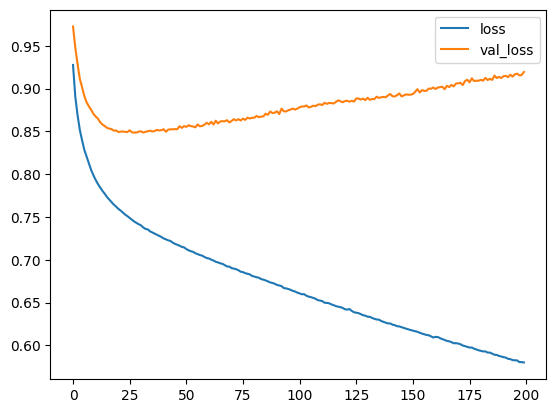

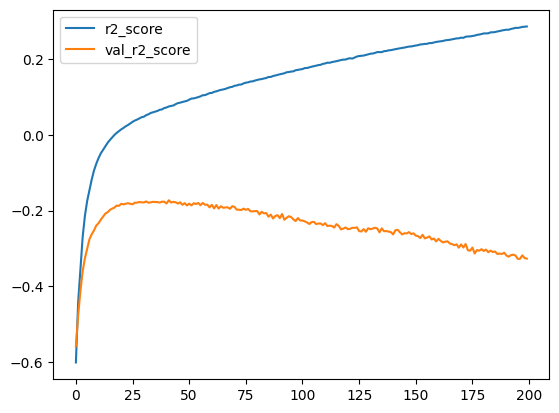

In [404]:
history_5[['loss', 'val_loss']].plot()
plt.show()

history_5[['r2_score', 'val_r2_score']].plot()
plt.show()

## Model 6 - LSTM

LSTMs are specifically designed to address and capture temporal dynamics in sequence data. They are adept at remembering information over long periods, which is crucial in time series forecasting where past events significantly influence future outcomes. For predicting blockchain gas consumption, LSTMs can be essential in understanding patterns like periodicity, trends, and seasonality, potentially leading to more accurate and robust forecasts.

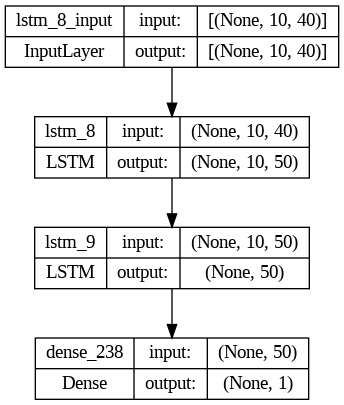

In [405]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, input_shape=(timesteps, X_sub_train_standardized.shape[1]), return_sequences=True),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(1)
])

tf.keras.utils.plot_model(model_6, show_shapes=True, show_layer_names=True)

In [406]:
model_6.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = model_6.fit(
    X_sub_train_seq, Y_sub_train_seq,
    epochs=epochs,
    batch_size=32,
    validation_data=(X_validation_seq, Y_validation_seq)
)

history_6 = pd.DataFrame(history.history)

Epoch 1/200
57/57 [==============================] - 7s 32ms/step - loss: 0.7776 - r2_score: 0.0041 - val_loss: 0.7780 - val_r2_score: -0.0027
Epoch 2/200
57/57 [==============================] - 1s 18ms/step - loss: 0.7729 - r2_score: 0.0110 - val_loss: 0.7782 - val_r2_score: -0.0037
Epoch 3/200
57/57 [==============================] - 2s 34ms/step - loss: 0.7695 - r2_score: 0.0152 - val_loss: 0.7785 - val_r2_score: 9.1892e-04
Epoch 4/200
57/57 [==============================] - 1s 25ms/step - loss: 0.7672 - r2_score: 0.0201 - val_loss: 0.7791 - val_r2_score: -9.2101e-04
Epoch 5/200
57/57 [==============================] - 1s 17ms/step - loss: 0.7651 - r2_score: 0.0251 - val_loss: 0.7797 - val_r2_score: 4.2009e-04
Epoch 6/200
57/57 [==============================] - 1s 15ms/step - loss: 0.7634 - r2_score: 0.0253 - val_loss: 0.7804 - val_r2_score: -0.0026
Epoch 7/200
57/57 [==============================] - 1s 16ms/step - loss: 0.7616 - r2_score: 0.0302 - val_loss: 0.7815 - val_r2_scor

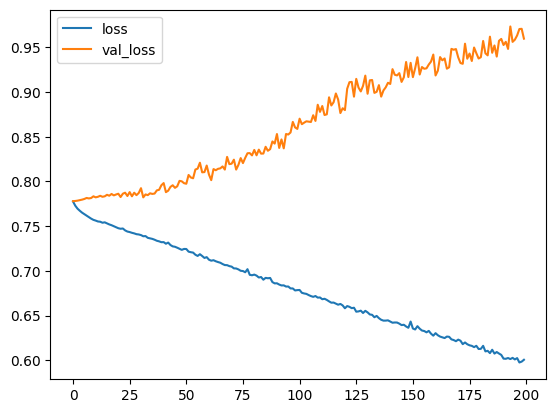

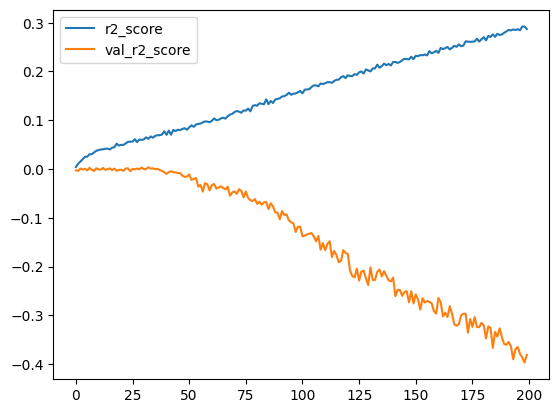

In [407]:
history_6[['loss', 'val_loss']].plot()
plt.show()

history_6[['r2_score', 'val_r2_score']].plot()
plt.show()

# Question 5 (12.5 points): Analyze the Layers of Your Best Performing Architecture
<br>

- Pick your best performing architecture from above.

- Extract the features within each hidden layer, as we did in class in notebook: <i>01_Complexity_in_Return_Predictions_for_Asset_Management_Using_Dense_Neural_Networks_and_Keras_API.ipynb</i>

- Pick the first and the last hidden layer and compute the correlation of these hidden features with the target variable. Describe what you find and try to reason about what the model is doing in the hidden layers.

- Pick the first and the last hidden layer and compute the correlation of these hidden features with the feature variable that has the lowest correlation to your target variable. Describe what you find and try to reason about what the model is doing in the hidden layers.

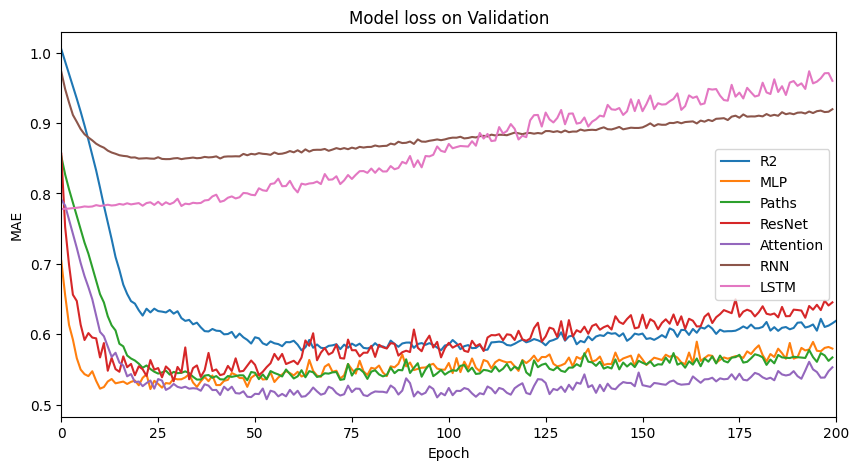

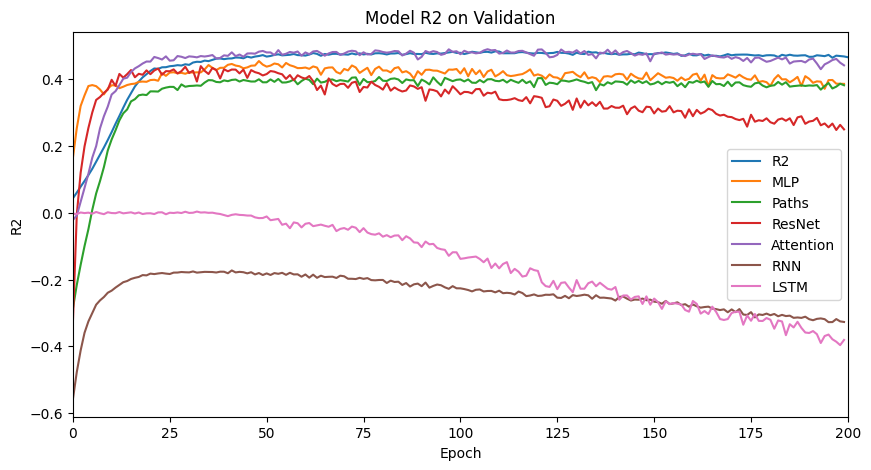

In [410]:
plt.figure(figsize=(10, 5))
plt.plot(r2_history['val_loss'], label='R2')
plt.plot(history_1['val_loss'], label='MLP')
plt.plot(history_2['val_loss'], label='Paths')
plt.plot(history_3['val_loss'], label='ResNet')
plt.plot(history_4['val_loss'], label='Attention')
plt.plot(history_5['val_loss'], label='RNN')
plt.plot(history_6['val_loss'], label='LSTM')
plt.xlim(0, 200)
plt.title('Model loss on Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(r2_history['val_r2_score'], label='R2')
plt.plot(history_1['val_r2_score'], label='MLP')
plt.plot(history_2['val_r2_score'], label='Paths')
plt.plot(history_3['val_r2_score'], label='ResNet')
plt.plot(history_4['val_r2_score'], label='Attention')
plt.plot(history_5['val_r2_score'], label='RNN')
plt.plot(history_6['val_r2_score'], label='LSTM')
plt.xlim(0, 200)
plt.title('Model R2 on Validation')
plt.xlabel('Epoch')
plt.ylabel('R2')
plt.legend()
plt.show()

Note: overall, I proceed with the NN with attention. Although performace is similar to the NN trained on R2 loss, we have more margin of improvement. Indeed, such network already contains tricks such as swish activation or he normal inizitalization. On the other side, these can still be implemented in our NN attention network, so I hope there is more space for improvememnt here. Also, it is a nice opportunity to learn more about attention, which I always hear about, but I never implemented. However, in the context of this question, I will proceed with the basic NN as it facilitates the interpretation.
Below I re-write the architecture:

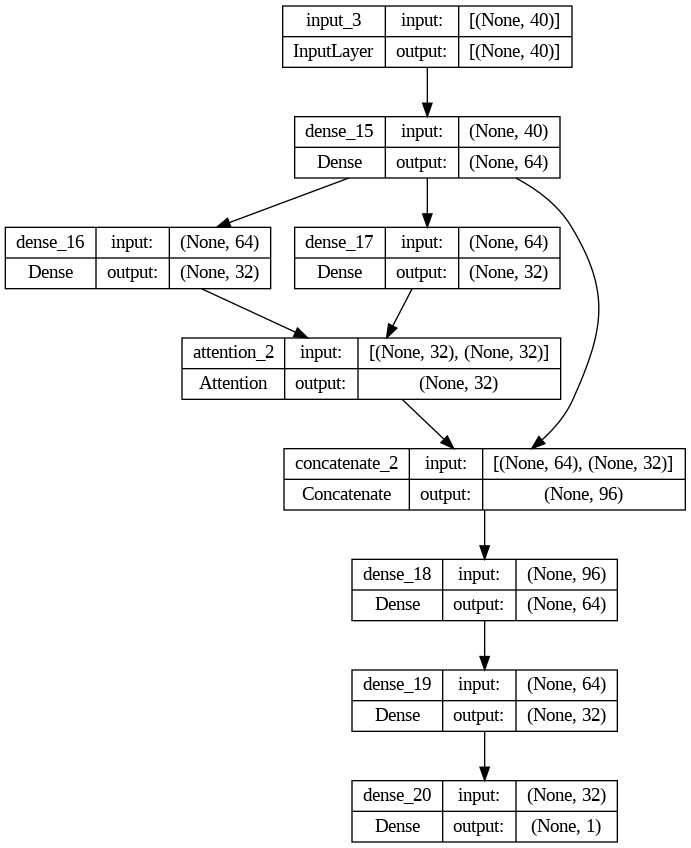

In [578]:
inputs = tf.keras.Input(shape=(X_sub_train_standardized.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)

# Apply attention
query = tf.keras.layers.Dense(32, activation='relu')(x)
value = tf.keras.layers.Dense(32, activation='relu')(x)
attention = tf.keras.layers.Attention()([query, value])
context = tf.keras.layers.Concatenate()([x, attention])

x = tf.keras.layers.Dense(64, activation='relu')(context)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)
model_4 = tf.keras.Model(inputs=inputs, outputs=outputs)

tf.keras.utils.plot_model(model_4, show_shapes=True, show_layer_names=True)

In [581]:
model_4.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = model_4.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=200,
    batch_size=batch_size,
    verbose=False,
    validation_data=(X_validation_standardized, Y_validation_standardized)
)

history_4 = pd.DataFrame(history.history)

In [594]:
print(r2_model)
print(r2_model.inputs)

[<KerasTensor: shape=(None, 40) dtype=float32 (created by layer 'input_27')>]


In [595]:
r2_model.layers

In [598]:
feature_extractor = tf.keras.Model(
    inputs=r2_model.inputs,
    outputs=[
        r2_model.layers[0].output, # h1
        r2_model.layers[1].output, # h2
        r2_model.layers[2].output, # h3
        r2_model.layers[3].output, # h4
        r2_model.layers[4].output, # output
    ]
)

In [600]:
X_sub_train_standardized

open      high       low     close  Volume ETH  \
2021-10-17 00:05:00 -0.706061 -0.626254 -0.657334 -0.695792    0.246407   
2021-10-17 00:06:00 -0.696878 -0.673348 -0.790598 -0.715677    3.554428   
2021-10-17 00:07:00 -0.715244 -0.689268 -0.656689 -0.635480   -0.287744   
2021-10-17 00:08:00 -0.635220 -0.535604 -0.584039 -0.518351   -0.079591   
2021-10-17 00:09:00 -0.517807 -0.314947 -0.462383 -0.266613    0.038148   
...                       ...       ...       ...       ...         ...   
2021-10-18 06:39:00  0.477249  0.500466  0.509150  0.540611   -0.332858   
2021-10-18 06:40:00  0.541312  0.600624  0.578791  0.627146   -0.141152   
2021-10-18 06:41:00  0.627895  0.628482  0.640909  0.620372    0.035674   
2021-10-18 06:42:00  0.613465  0.630472  0.648002  0.657958   -0.180140   
2021-10-18 06:43:00  0.658724  0.637547  0.640909  0.668447   -0.273800   

                     Volume USDT  tradecount  \
2021-10-17 00:05:00     0.250182    0.403363   
2021-10-17 00:06:00     3.621387    1.058815   
2021-10-17 00:07:00    -0.294667   -0.126177   
2021-10-17 00:08:00    -0.081569   -0.065454   
2021-10-17 00:09:00     0.039674    0.300670   
...                          ...         ...   
2021-10-18 06:39:00    -0.337908   -0.311025   
2021-10-18 06:40:00    -0.139100   -0.130642   
2021-10-18 06:41:00     0.044229   -0.123498   
2021-10-18 06:42:00    -0.179325   -0.221727   
2021-10-18 06:43:00    -0.276397   -0.277985   

                     Total_Block_Txns_Count_Per_Minute  \
2021-10-17 00:05:00                           0.337379   
2021-10-17 00:06:00                          -1.032591   
2021-10-17 00:07:00                           0.584523   
2021-10-17 00:08:00                          -0.727475   
2021-10-17 00:09:00                          -1.026489   
...                                                ...   
2021-10-18 06:39:00                          -0.224034   
2021-10-18 06:40:00                          -0.285057   
2021-10-18 06:41:00                           0.984225   
2021-10-18 06:42:00                           0.239742   
2021-10-18 06:43:00                          -0.437615   

                     Avg_Gas_Price_Per_Block     range  ...  \
2021-10-17 00:05:00                -0.082717  1.305459  ...   
2021-10-17 00:06:00                -0.077110  0.852490  ...   
2021-10-17 00:07:00                -0.113917 -0.777454  ...   
2021-10-17 00:08:00                -0.091501 -0.187110  ...   
2021-10-17 00:09:00                -0.023222 -0.758890  ...   
...                                      ...       ...  ...   
2021-10-18 06:39:00                -0.110930 -0.781167  ...   
2021-10-18 06:40:00                -0.121160 -0.569534  ...   
2021-10-18 06:41:00                -0.132708  0.013384  ...   
2021-10-18 06:42:00                -0.138200 -0.591812  ...   
2021-10-18 06:43:00                -0.112930 -0.651217  ...   

                     Total_Gas_Used_Per_Minute_lag_1_lagged_1  \
2021-10-17 00:05:00                                  1.183472   
2021-10-17 00:06:00                                  0.253241   
2021-10-17 00:07:00                                  0.576982   
2021-10-17 00:08:00                                 -0.583304   
2021-10-17 00:09:00                                  1.695382   
...                                                       ...   
2021-10-18 06:39:00                                 -1.750989   
2021-10-18 06:40:00                                  0.349760   
2021-10-18 06:41:00                                 -0.074291   
2021-10-18 06:42:00                                 -0.054894   
2021-10-18 06:43:00                                  1.520836   

                     volume_eth_change_lagged_1  close_price_roc_lagged_1  \
2021-10-17 00:05:00                   -0.380313                 -2.209152   
2021-10-17 00:06:00                   -0.284621                  0.124134   
2021-10-17 00:07:00                    2.551198                 -0.260410   
2021

In [618]:
# Call the feature extractor model on a single point of data
sample_data = X_sub_train_standardized.iloc[0].values.reshape(1, -1)
feature_extractor(sample_data)

[<tf.Tensor: shape=(1, 15), dtype=float32, numpy=
 array([[ 0.2591854 ,  1.0557874 , -0.2245944 , -0.2779399 ,  0.8519662 ,
         -0.17204025, -0.10990722,  0.01367215,  0.7417203 ,  0.8005241 ,
          0.53321314,  2.1439884 , -0.06843175, -0.00959263,  0.4692288 ]],
       dtype=float32)>,
 <tf.Tensor: shape=(1, 15), dtype=float32, numpy=
 array([[ 0.05850364, -0.17781045,  0.3540677 , -0.08285137, -0.23556182,
          0.42838445, -0.21980608,  0.0840692 , -0.17974591,  0.07676454,
         -0.24017699, -0.27846357,  0.23486614, -0.12969102,  0.46189564]],
       dtype=float32)>,
 <tf.Tensor: shape=(1, 15), dtype=float32, numpy=
 array([[-0.01826832, -0.20844327, -0.01333016,  0.06203497,  0.14852363,
          0.07897027,  0.02911849, -0.07004116,  0.17093524,  0.28301632,
          0.01294059,  0.2560701 ,  0.2210209 , -0.0648452 , -0.01095416]],
       dtype=float32)>,
 <tf.Tensor: shape=(1, 15), dtype=float32, numpy=
 array([[-0.07950554, -0.05191175,  0.00124715,  0.11660

In [616]:
processed_features = feature_extractor(sample_data)
np.squeeze(processed_features[0].numpy())

array([ 0.2591854 ,  1.0557874 , -0.2245944 , -0.2779399 ,  0.8519662 ,
       -0.17204025, -0.10990722,  0.01367215,  0.7417203 ,  0.8005241 ,
        0.53321314,  2.1439884 , -0.06843175, -0.00959263,  0.4692288 ],
      dtype=float32)

In [613]:
sample_data[0]

array([-0.70606088, -0.62625431, -0.65733426, -0.6957919 ,  0.24640745,
        0.25018229,  0.40336342,  0.33737906, -0.08271673,  1.30545872,
       -0.26288528,  2.09547425,  0.12301923, -0.28459809, -0.28512788,
       -0.53774194, -1.87301428, -0.11175654,  0.25018129,  0.25383045,
        0.30636706, -0.38118186,  1.70695604, -0.31208918,  0.5029247 ,
        0.21803247, -0.55199058, -0.64802717,  2.71302124, -0.07234436,
        1.18347247, -0.38031321, -2.20915213, -0.47835785,  0.0965975 ,
        0.30636851, -2.67859181, -0.70551662, -0.53138764,  0.30087532])

In [621]:
pd.DataFrame({'Input_Layer': np.squeeze(processed_features[0].numpy()),
              'Normalization_Layer': np.squeeze(processed_features[0].numpy()),
              'Processing_Layer_1': np.squeeze(processed_features[1].numpy()),
              'Processing_Layer_2': np.squeeze(processed_features[2].numpy()),
              'Processing_Layer_3': np.squeeze(processed_features[3].numpy()),
              'Output_Layer': np.squeeze(processed_features[4].numpy()),})

Input_Layer  Normalization_Layer  Processing_Layer_1  Processing_Layer_2  \
0      0.259185             0.259185            0.058504           -0.018268   
1      1.055787             1.055787           -0.177810           -0.208443   
2     -0.224594            -0.224594            0.354068           -0.013330   
3     -0.277940            -0.277940           -0.082851            0.062035   
4      0.851966             0.851966           -0.235562            0.148524   
5     -0.172040            -0.172040            0.428384            0.078970   
6     -0.109907            -0.109907           -0.219806            0.029118   
7      0.013672             0.013672            0.084069           -0.070041   
8      0.741720             0.741720           -0.179746            0.170935   
9      0.800524             0.800524            0.076765            0.283016   
10     0.533213             0.533213           -0.240177            0.012941   
11     2.143988             2.143988           -0.278464            0.256070   
12    -0.068432            -0.068432            0.234866            0.221021   
13    -0.009593            -0.009593           -0.129691           -0.064845   
14     0.469229             0.469229            0.461896           -0.010954   

    Processing_Layer_3  Output_Layer  
0            -0.079506      0.139971  
1            -0.051912      0.139971  
2             0.001247      0.139971  
3             0.116608      0.139971  
4            -0.065062      0.139971  
5            -0.090803      0.139971  
6            -0.091879      0.139971  
7             0.040201      0.139971  
8             0.025645      0.139971  
9            -0.007423      0.139971  
10           -0.118950      0.139971  
11            0.023902      0.139971  
12           -0.003675      0.139971  
13           -0.077264      0.139971  
14           -0.017495      0.139971

In [1]:
# layer_1_feature_representations = pd.DataFrame(feature_extractor(X_sub_train_standardized)[0].numpy(), index=X_sub_train_standardized.index)

# layer_1_data = pd.concat([layer_1_feature_representations, Y_train_standardized], axis=1)

In [626]:
# Define a new model that outputs the activations from the first and last hidden layers
intermediate_layer_model = tf.keras.Model(
    inputs=r2_model.input,
    outputs=[r2_model.layers[1].output, r2_model.layers[-2].output]
)

intermediate_output = intermediate_layer_model.predict(X_validation_standardized)

first_hidden_layer_output = intermediate_output[0]
last_hidden_layer_output = intermediate_output[1]

correlation_first_layer = np.corrcoef(first_hidden_layer_output.T, Y_validation_standardized.squeeze())[0:-1, -1]
correlation_last_layer = np.corrcoef(last_hidden_layer_output.T, Y_validation_standardized.squeeze())[0:-1, -1]


print('Correlation of first hidden layer activations with target variable:', correlation_first_layer)
print('Correlation of last hidden layer activations with target variable:', correlation_last_layer)

15/15 [==============================] - 0s 3ms/step
Correlation of first hidden layer activations with target variable: [ 0.00332037 -0.26683494 -0.04616573 -0.0718218   0.15634716  0.04003366
 -0.01972483  0.0143917  -0.05562444  0.11617149 -0.15951438 -0.08183894
  0.08883195  0.06017825 -0.12146094]
Correlation of last hidden layer activations with target variable: [-0.05838735  0.08342386  0.14260092  0.04772259 -0.02794151 -0.17086848
  0.04015932  0.11152551 -0.01533987  0.02731844  0.13128833  0.08567649
  0.04735462  0.05802969  0.00275972]


- First Hidden Layer: The correlations are relatively low, with both positive and negative values, which suggests that no single neuron in the first hidden layer has a strong linear relationship with the target variable. It might be because individual neurons may be capturing more complex, non-linear relationships.

- Last Hidden Layer: The correlations are again a mix of positive and negative values but tend to be a bit higher, though still not very close to 1 or -1. This suggests that the last hidden layer might be capturing more relevant information to the target variable, but still in a complex manner that is not strictly linear.

# Question 6 (12.5 points): Tricks for Vanishing/Exploding Gradients

<br>

- In an effort to address the potential vanishing and exploding gradients problem, pick your best performing architecture from above and try at least 3 different tricks/techniques from the notebook: <i>02_Tricks_for_Training_Deep_Neural_Networks</i>, to address the potential vanishing/exploding gradients.

- Give a succinct explanation for your choices and write a summary of your findings.

Note: the best architecture was the one built in point 3 using the R2 loss. However, this is already using swish activation function and he normal initialization, which are tricks to avoid gradient problems. Therefore, I will proceed with the best architecture built in point 4, i.e. NN with Attention Mechanism.

In [463]:
epochs = 200

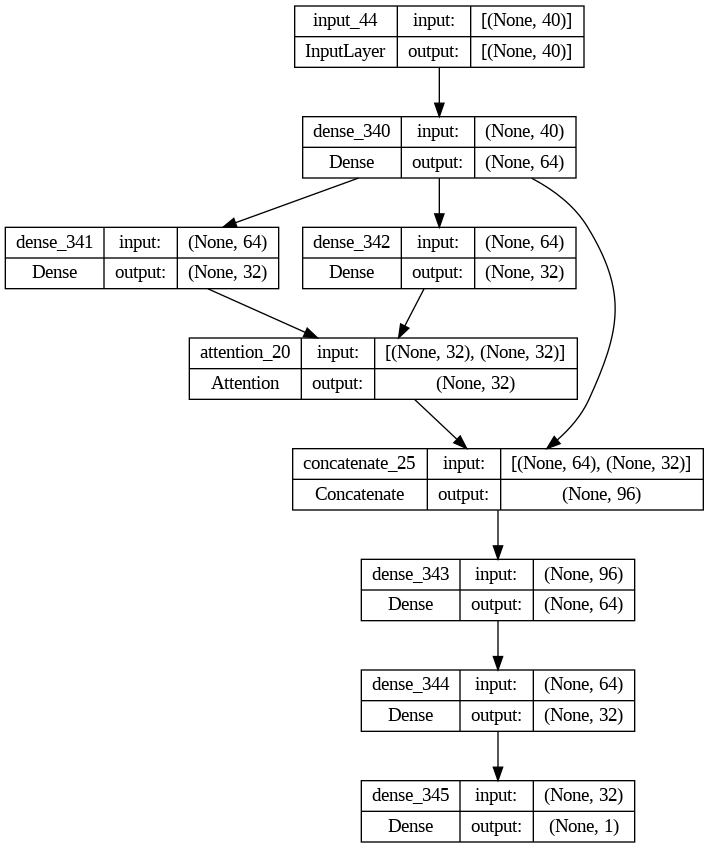

In [464]:
# Best model - without tricks

inputs = tf.keras.Input(shape=(X_sub_train_standardized.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)

query = tf.keras.layers.Dense(32, activation='relu')(x)
value = tf.keras.layers.Dense(32, activation='relu')(x)
attention = tf.keras.layers.Attention()([query, value])
context = tf.keras.layers.Concatenate()([x, attention])

x = tf.keras.layers.Dense(64, activation='relu')(context)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)
model_4 = tf.keras.Model(inputs=inputs, outputs=outputs)

tf.keras.utils.plot_model(model_4, show_shapes=True, show_layer_names=True)

I will use three tricks to avoid gradient problems, which are:
- Swish Activation Function: a smooth, non-monotonic function which allows for a small amount of gradient flow even for negative input values, which helps mitigate the vanishing gradients problem.
- He Normal Initialization: sets the initial weights to values that consider the size of the previous layer, which helps prevent the magnitudes of the outputs and gradients from escalating or diminishing too quickly.
- Batch Normalization: normalizing the input of each layer to have a mean of 0 and a variance of 1, batch normalization helps maintain stable gradients throughout training, which can lead to faster convergence

## Swish

In [ ]:
activation = tf.keras.activations.swish

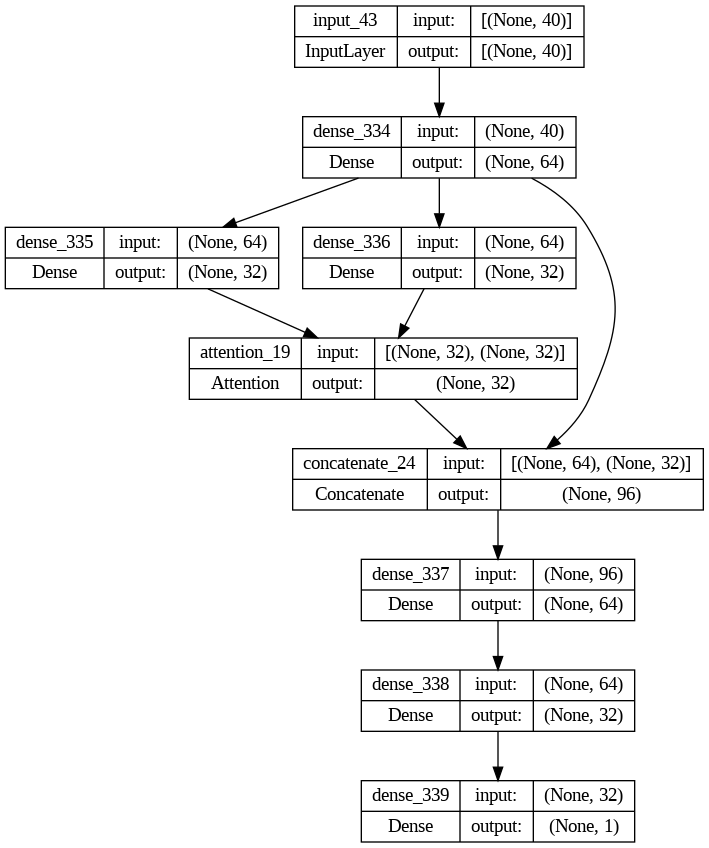

In [462]:
inputs = tf.keras.Input(shape=(X_sub_train_standardized.shape[1],))

x = tf.keras.layers.Dense(64, activation=activation)(inputs)

query = tf.keras.layers.Dense(32, activation=activation)(x)

value = tf.keras.layers.Dense(32, activation=activation)(x)

attention = tf.keras.layers.Attention()([query, value])
context = tf.keras.layers.Concatenate()([x, attention])

x = tf.keras.layers.Dense(64, activation=activation)(context)

x = tf.keras.layers.Dense(32, activation=activation)(x)

outputs = tf.keras.layers.Dense(1)(x)
model_4_swish = tf.keras.Model(inputs=inputs, outputs=outputs)

tf.keras.utils.plot_model(model_4_swish, show_shapes=True, show_layer_names=True)

In [465]:
model_4_swish.compile(
    loss=r2_loss,
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = model_4_swish.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized)
)

history_4_swish = pd.DataFrame(history.history)

Epoch 1/200
57/57 [==============================] - 2s 9ms/step - loss: 1.2541 - r2_score: -0.2298 - val_loss: 1.3183 - val_r2_score: -0.2947
Epoch 2/200
57/57 [==============================] - 0s 4ms/step - loss: 1.0640 - r2_score: -0.0198 - val_loss: 1.2265 - val_r2_score: -0.1909
Epoch 3/200
57/57 [==============================] - 0s 4ms/step - loss: 0.9840 - r2_score: 0.0481 - val_loss: 1.1663 - val_r2_score: -0.1221
Epoch 4/200
57/57 [==============================] - 0s 5ms/step - loss: 0.9288 - r2_score: 0.1010 - val_loss: 1.1271 - val_r2_score: -0.0917
Epoch 5/200
57/57 [==============================] - 0s 5ms/step - loss: 0.8738 - r2_score: 0.1527 - val_loss: 1.0651 - val_r2_score: -0.0327
Epoch 6/200
57/57 [==============================] - 0s 4ms/step - loss: 0.8259 - r2_score: 0.2007 - val_loss: 1.0596 - val_r2_score: -0.0395
Epoch 7/200
57/57 [==============================] - 0s 4ms/step - loss: 0.7877 - r2_score: 0.2421 - val_loss: 0.9896 - val_r2_score: 0.0365
Epoch

## He Normal Initialization

In [470]:
activation = tf.keras.activations.relu
kernel_initializer = tf.keras.initializers.HeNormal()

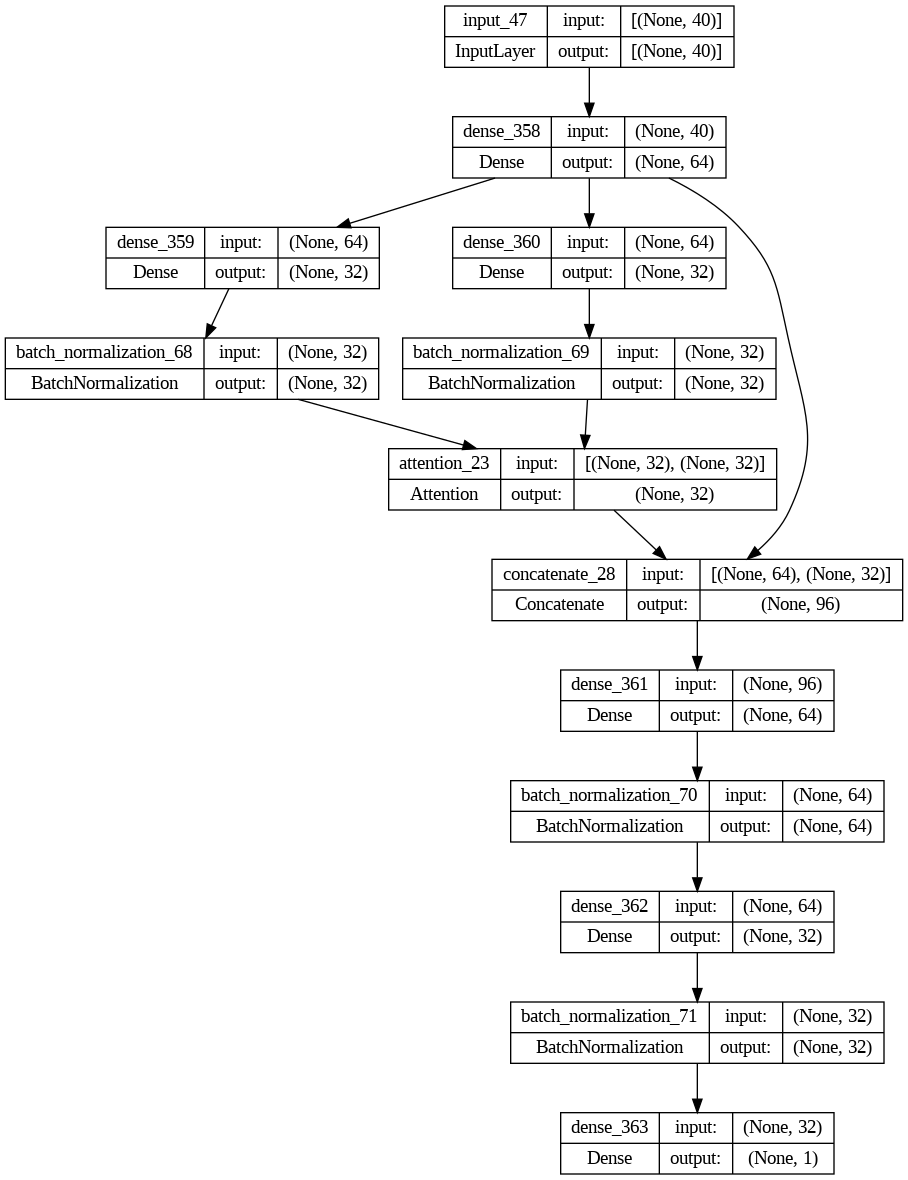

In [471]:
# Model with swish first, and then normalization

inputs = tf.keras.Input(shape=(X_sub_train_standardized.shape[1],))

x = tf.keras.layers.Dense(64, activation=activation, kernel_initializer=kernel_initializer)(inputs)

query = tf.keras.layers.Dense(32, activation=activation,kernel_initializer=kernel_initializer)(x)
query = tf.keras.layers.BatchNormalization()(query)

value = tf.keras.layers.Dense(32, activation=activation,kernel_initializer=kernel_initializer)(x)
value = tf.keras.layers.BatchNormalization()(value)

attention = tf.keras.layers.Attention()([query, value])
context = tf.keras.layers.Concatenate()([x, attention])

x = tf.keras.layers.Dense(64, activation=activation,kernel_initializer=kernel_initializer)(context)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(32, activation=activation,kernel_initializer=kernel_initializer)(x)
x = tf.keras.layers.BatchNormalization()(x)

outputs = tf.keras.layers.Dense(1)(x)
model_4_he = tf.keras.Model(inputs=inputs, outputs=outputs)

tf.keras.utils.plot_model(model_4_he, show_shapes=True, show_layer_names=True)

In [472]:
model_4_he.compile(
    loss=r2_loss,
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = model_4_he.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized)
)

history_4_he = pd.DataFrame(history.history)

Epoch 1/200
57/57 [==============================] - 5s 16ms/step - loss: 2.3081 - r2_score: -1.1407 - val_loss: 2.0241 - val_r2_score: -0.6762
Epoch 2/200
57/57 [==============================] - 0s 8ms/step - loss: 1.7359 - r2_score: -0.6238 - val_loss: 2.0380 - val_r2_score: -0.6957
Epoch 3/200
57/57 [==============================] - 0s 8ms/step - loss: 1.4203 - r2_score: -0.3401 - val_loss: 2.1882 - val_r2_score: -0.7544
Epoch 4/200
57/57 [==============================] - 0s 7ms/step - loss: 1.2794 - r2_score: -0.1905 - val_loss: 2.3185 - val_r2_score: -0.8131
Epoch 5/200
57/57 [==============================] - 0s 5ms/step - loss: 1.1689 - r2_score: -0.0958 - val_loss: 2.2010 - val_r2_score: -0.7271
Epoch 6/200
57/57 [==============================] - 0s 5ms/step - loss: 1.1087 - r2_score: -0.0271 - val_loss: 2.1579 - val_r2_score: -0.6597
Epoch 7/200
57/57 [==============================] - 0s 5ms/step - loss: 1.0564 - r2_score: 0.0255 - val_loss: 1.9969 - val_r2_score: -0.5531

## Batch Normalization

In [473]:
activation = tf.keras.activations.relu

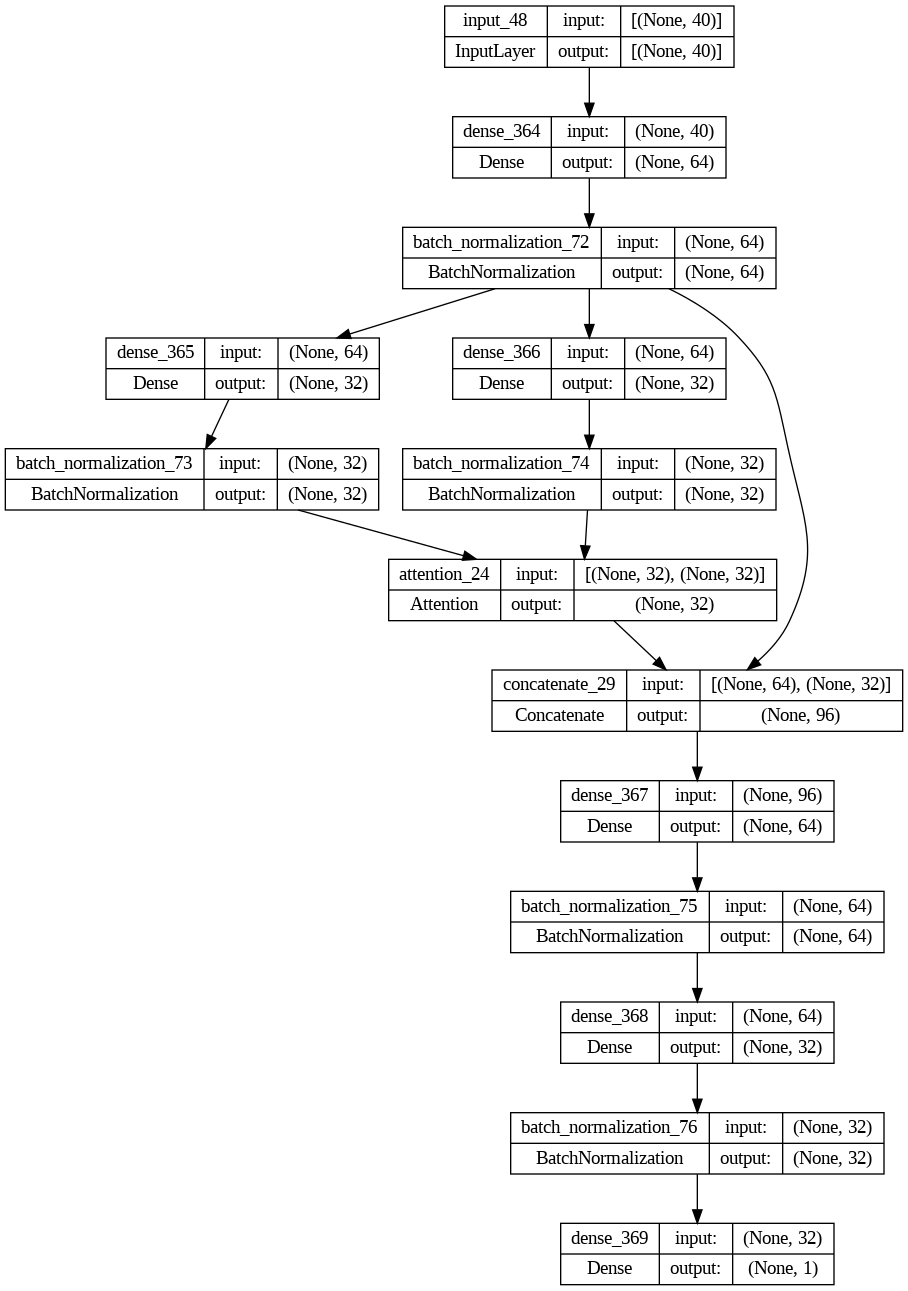

In [474]:
inputs = tf.keras.Input(shape=(X_sub_train_standardized.shape[1],))

x = tf.keras.layers.Dense(64, activation=activation)(inputs)
x = tf.keras.layers.BatchNormalization()(x)

query = tf.keras.layers.Dense(32, activation=activation)(x)
query = tf.keras.layers.BatchNormalization()(query)

value = tf.keras.layers.Dense(32, activation=activation)(x)
value = tf.keras.layers.BatchNormalization()(value)

attention = tf.keras.layers.Attention()([query, value])
context = tf.keras.layers.Concatenate()([x, attention])

x = tf.keras.layers.Dense(64, activation=activation)(context)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(32, activation=activation)(x)
x = tf.keras.layers.BatchNormalization()(x)

outputs = tf.keras.layers.Dense(1)(x)
model_4_normalization = tf.keras.Model(inputs=inputs, outputs=outputs)

tf.keras.utils.plot_model(model_4_normalization, show_shapes=True, show_layer_names=True)

In [475]:
model_4_normalization.compile(
    loss=r2_loss,
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = model_4_normalization.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized)
)

history_4_normalization = pd.DataFrame(history.history)

Epoch 1/200
57/57 [==============================] - 6s 11ms/step - loss: 3.1270 - r2_score: -1.8333 - val_loss: 1.4961 - val_r2_score: -0.2759
Epoch 2/200
57/57 [==============================] - 0s 5ms/step - loss: 2.2269 - r2_score: -1.0757 - val_loss: 1.6385 - val_r2_score: -0.3997
Epoch 3/200
57/57 [==============================] - 0s 6ms/step - loss: 1.8783 - r2_score: -0.7329 - val_loss: 1.7218 - val_r2_score: -0.4677
Epoch 4/200
57/57 [==============================] - 0s 6ms/step - loss: 1.6867 - r2_score: -0.5560 - val_loss: 1.8757 - val_r2_score: -0.5566
Epoch 5/200
57/57 [==============================] - 0s 5ms/step - loss: 1.6155 - r2_score: -0.4933 - val_loss: 1.9099 - val_r2_score: -0.5718
Epoch 6/200
57/57 [==============================] - 0s 6ms/step - loss: 1.4596 - r2_score: -0.3445 - val_loss: 1.8697 - val_r2_score: -0.5357
Epoch 7/200
57/57 [==============================] - 0s 5ms/step - loss: 1.3649 - r2_score: -0.2427 - val_loss: 1.8368 - val_r2_score: -0.495

## All together

In [476]:
activation = tf.keras.activations.swish
kernel_initializer = tf.keras.initializers.HeNormal()

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


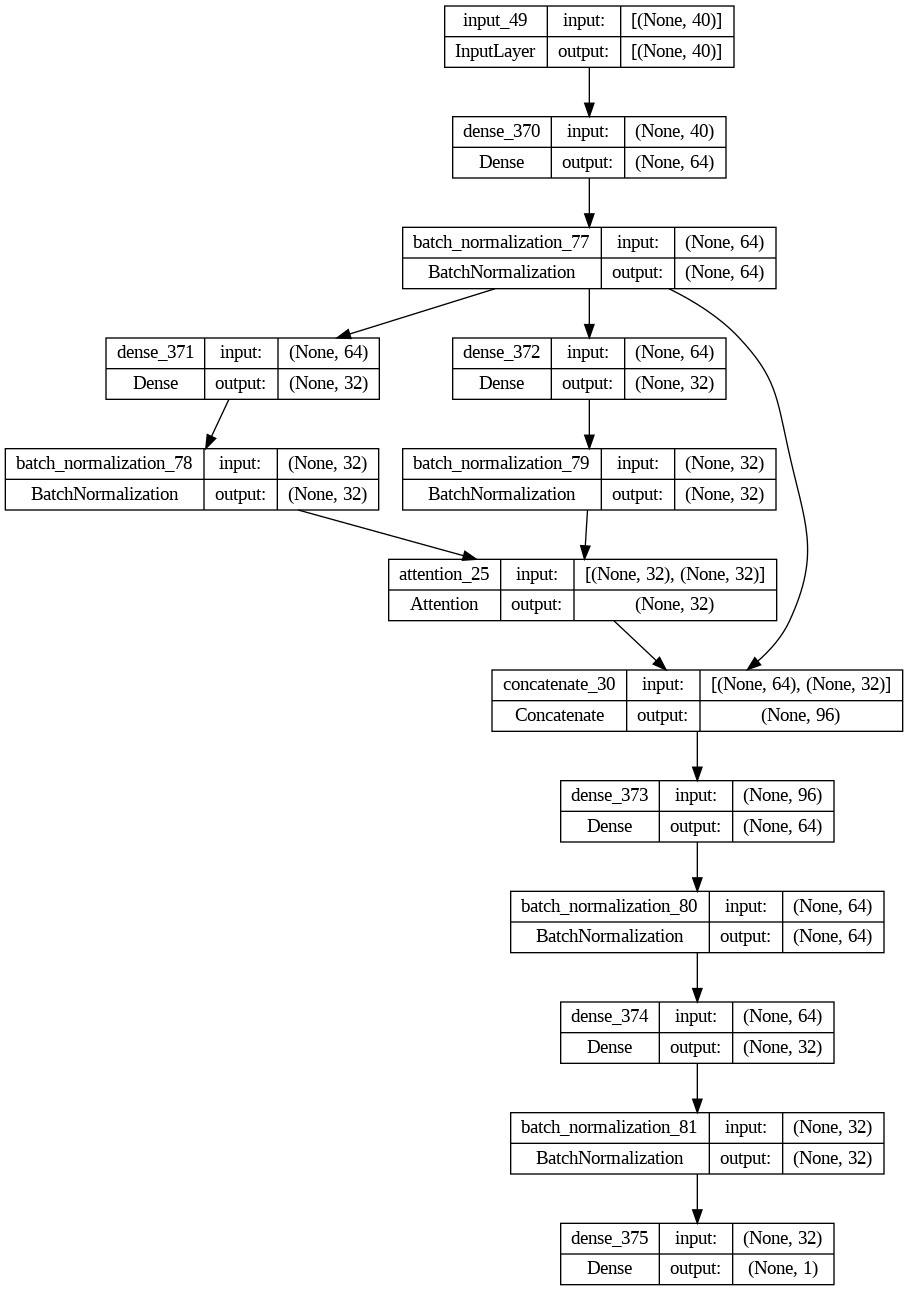

In [477]:
# Model with swish first, and then normalization

inputs = tf.keras.Input(shape=(X_sub_train_standardized.shape[1],))

x = tf.keras.layers.Dense(64, activation=activation, kernel_initializer=kernel_initializer)(inputs)
x = tf.keras.layers.BatchNormalization()(x)

query = tf.keras.layers.Dense(32, activation=activation,kernel_initializer=kernel_initializer)(x)
query = tf.keras.layers.BatchNormalization()(query)

value = tf.keras.layers.Dense(32, activation=activation,kernel_initializer=kernel_initializer)(x)
value = tf.keras.layers.BatchNormalization()(value)

attention = tf.keras.layers.Attention()([query, value])
context = tf.keras.layers.Concatenate()([x, attention])

x = tf.keras.layers.Dense(64, activation=activation,kernel_initializer=kernel_initializer)(context)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(32, activation=activation,kernel_initializer=kernel_initializer)(x)
x = tf.keras.layers.BatchNormalization()(x)

outputs = tf.keras.layers.Dense(1)(x)
model_4_tricks = tf.keras.Model(inputs=inputs, outputs=outputs)

tf.keras.utils.plot_model(model_4_tricks, show_shapes=True, show_layer_names=True)

In [478]:
model_4_tricks.compile(
    loss=r2_loss,
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = model_4_tricks.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized)
)

history_4_tricks = pd.DataFrame(history.history)

Epoch 1/200
57/57 [==============================] - 4s 12ms/step - loss: 2.3997 - r2_score: -1.2680 - val_loss: 2.3816 - val_r2_score: -0.9626
Epoch 2/200
57/57 [==============================] - 0s 6ms/step - loss: 1.5523 - r2_score: -0.4557 - val_loss: 2.1895 - val_r2_score: -0.7695
Epoch 3/200
57/57 [==============================] - 0s 6ms/step - loss: 1.2884 - r2_score: -0.2094 - val_loss: 2.3636 - val_r2_score: -0.8388
Epoch 4/200
57/57 [==============================] - 0s 6ms/step - loss: 1.2271 - r2_score: -0.1094 - val_loss: 2.5539 - val_r2_score: -0.9180
Epoch 5/200
57/57 [==============================] - 0s 6ms/step - loss: 1.0970 - r2_score: -0.0119 - val_loss: 2.7755 - val_r2_score: -1.0376
Epoch 6/200
57/57 [==============================] - 0s 5ms/step - loss: 0.9947 - r2_score: 0.0856 - val_loss: 2.8804 - val_r2_score: -1.0934
Epoch 7/200
57/57 [==============================] - 0s 5ms/step - loss: 0.9159 - r2_score: 0.1461 - val_loss: 2.7623 - val_r2_score: -1.0065


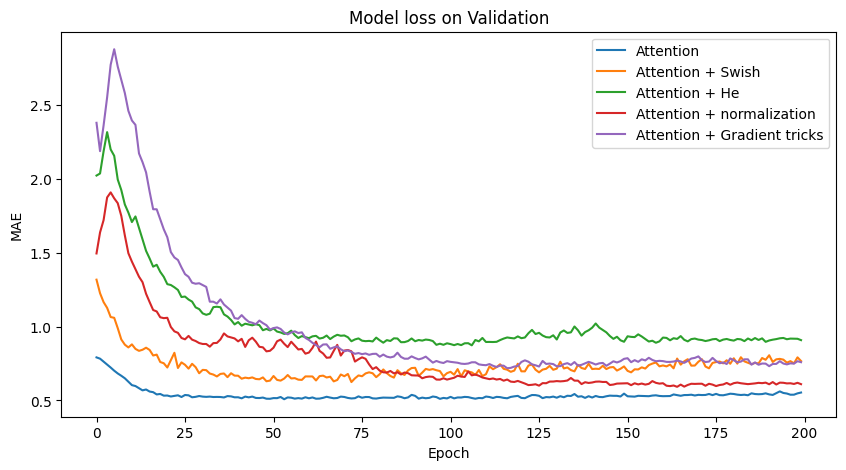

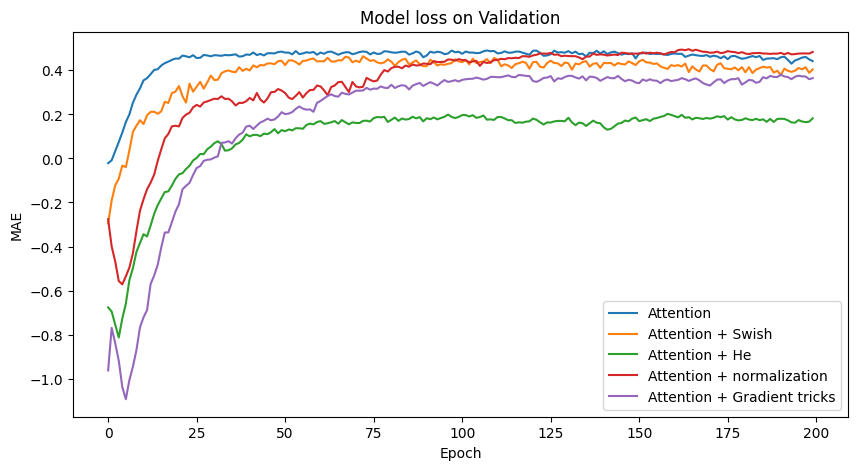

In [479]:
plt.figure(figsize=(10, 5))
plt.plot(history_4['val_loss'], label='Attention')
plt.plot(history_4_swish['val_loss'], label='Attention + Swish')
plt.plot(history_4_he['val_loss'], label='Attention + He')
plt.plot(history_4_normalization['val_loss'], label='Attention + normalization')
plt.plot(history_4_tricks['val_loss'], label='Attention + Gradient tricks')
plt.title('Model loss on Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(history_4['val_r2_score'], label='Attention')
plt.plot(history_4_swish['val_r2_score'], label='Attention + Swish')
plt.plot(history_4_he['val_r2_score'], label='Attention + He')
plt.plot(history_4_normalization['val_r2_score'], label='Attention + normalization')
plt.plot(history_4_tricks['val_r2_score'], label='Attention + Gradient tricks')
plt.title('Model loss on Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()


None of the tricks seem to be particularly useful. Indeed, the loss of the basic attention model dominates all the other ones. Among the trick, he activation seems to be worsening model performance a lot, while the other ones by little. Batch normalization seems to be the only one slightly useful: indeed, although the loss of such model is lower, it seems that it slighlty improves the R2. Of course, to confirm this thesis, we should run more and more experiments, and see on average how these models perform. However, my pc is already about to burn.

As a last experiment, I will try to combine batch nornmalization and swish

## Swish + Normalization

In [480]:
activation = tf.keras.activations.swish

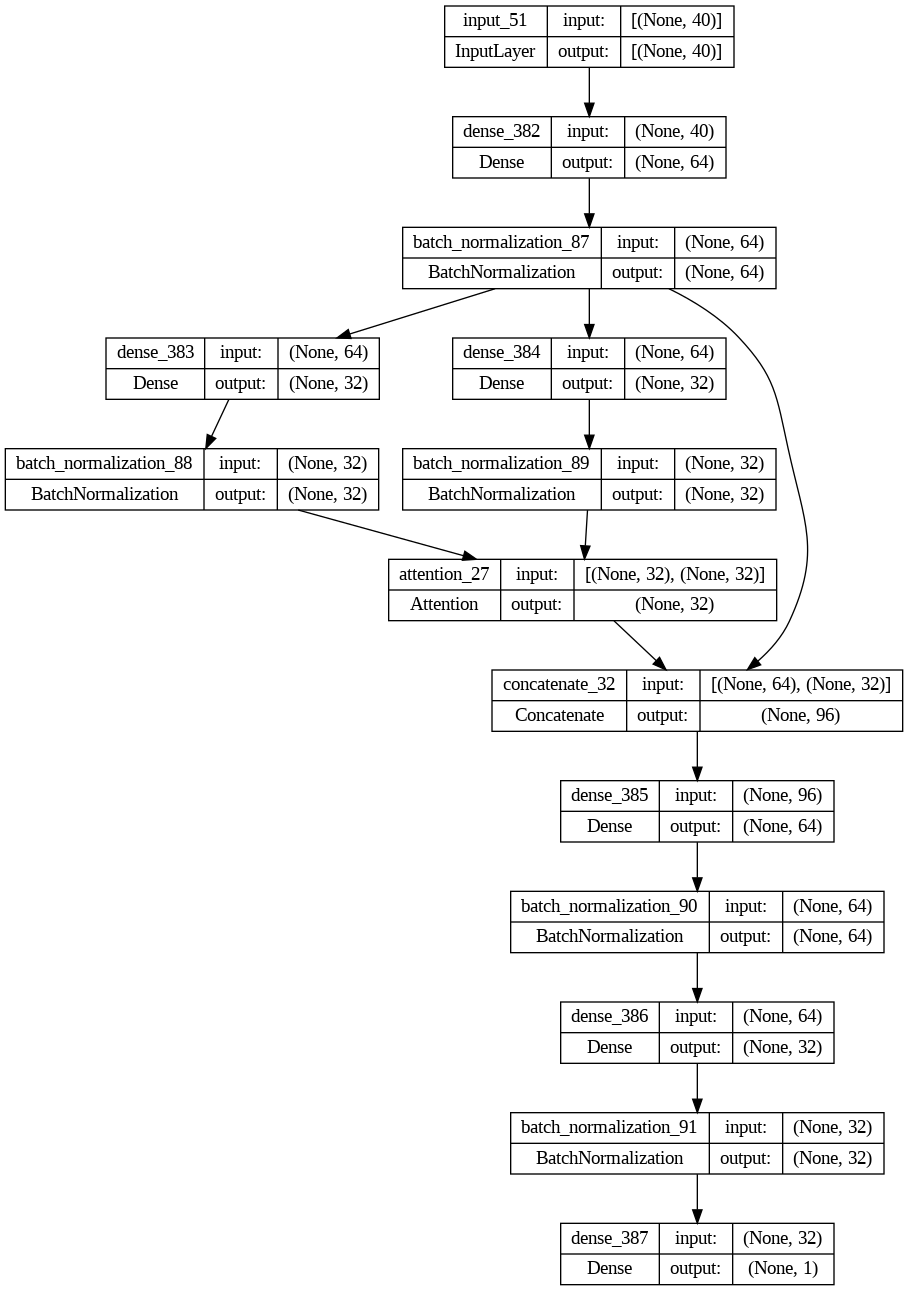

In [482]:
inputs = tf.keras.Input(shape=(X_sub_train_standardized.shape[1],))

x = tf.keras.layers.Dense(64, activation=activation)(inputs)
x = tf.keras.layers.BatchNormalization()(x)

query = tf.keras.layers.Dense(32, activation=activation)(x)
query = tf.keras.layers.BatchNormalization()(query)

value = tf.keras.layers.Dense(32, activation=activation)(x)
value = tf.keras.layers.BatchNormalization()(value)

attention = tf.keras.layers.Attention()([query, value])
context = tf.keras.layers.Concatenate()([x, attention])

x = tf.keras.layers.Dense(64, activation=activation)(context)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(32, activation=activation)(x)
x = tf.keras.layers.BatchNormalization()(x)

outputs = tf.keras.layers.Dense(1)(x)
model_4_swish_normalization = tf.keras.Model(inputs=inputs, outputs=outputs)

tf.keras.utils.plot_model(model_4_swish_normalization, show_shapes=True, show_layer_names=True)

In [483]:
model_4_swish_normalization.compile(
    loss=r2_loss,
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = model_4_swish_normalization.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized)
)

history_4_swish_normalization = pd.DataFrame(history.history)

Epoch 1/200
57/57 [==============================] - 4s 12ms/step - loss: 2.5462 - r2_score: -1.3835 - val_loss: 1.4251 - val_r2_score: -0.2614
Epoch 2/200
57/57 [==============================] - 0s 6ms/step - loss: 1.8292 - r2_score: -0.7183 - val_loss: 1.4346 - val_r2_score: -0.2500
Epoch 3/200
57/57 [==============================] - 0s 5ms/step - loss: 1.4467 - r2_score: -0.3508 - val_loss: 1.4798 - val_r2_score: -0.2610
Epoch 4/200
57/57 [==============================] - 0s 5ms/step - loss: 1.3719 - r2_score: -0.2486 - val_loss: 1.6062 - val_r2_score: -0.3166
Epoch 5/200
57/57 [==============================] - 0s 5ms/step - loss: 1.2970 - r2_score: -0.1994 - val_loss: 1.6154 - val_r2_score: -0.3194
Epoch 6/200
57/57 [==============================] - 0s 6ms/step - loss: 1.1575 - r2_score: -0.0689 - val_loss: 1.6845 - val_r2_score: -0.3353
Epoch 7/200
57/57 [==============================] - 1s 9ms/step - loss: 1.0101 - r2_score: 0.0565 - val_loss: 1.6888 - val_r2_score: -0.3288

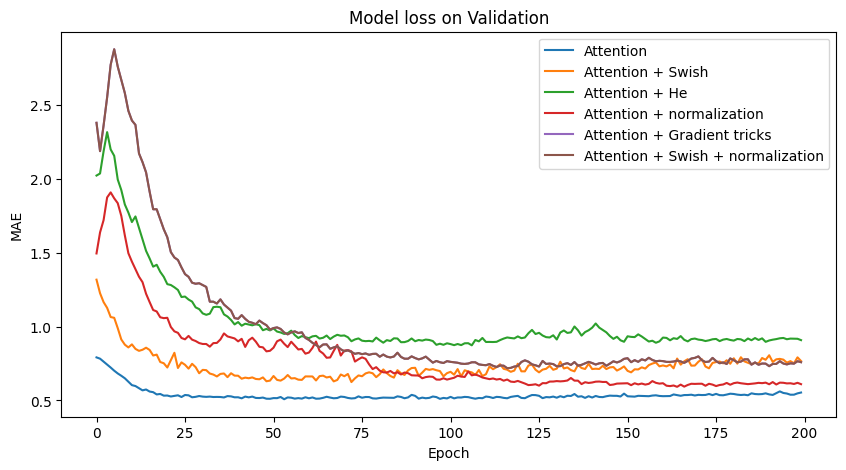

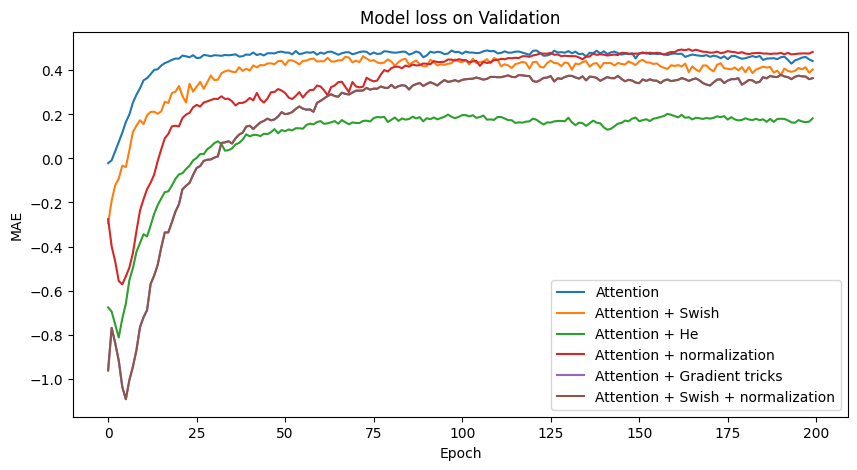

In [484]:
plt.figure(figsize=(10, 5))
plt.plot(history_4['val_loss'], label='Attention')
plt.plot(history_4_swish['val_loss'], label='Attention + Swish')
plt.plot(history_4_he['val_loss'], label='Attention + He')
plt.plot(history_4_normalization['val_loss'], label='Attention + normalization')
plt.plot(history_4_tricks['val_loss'], label='Attention + Gradient tricks')
plt.plot(history_4_tricks['val_loss'], label='Attention + Swish + normalization')
plt.title('Model loss on Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(history_4['val_r2_score'], label='Attention')
plt.plot(history_4_swish['val_r2_score'], label='Attention + Swish')
plt.plot(history_4_he['val_r2_score'], label='Attention + He')
plt.plot(history_4_normalization['val_r2_score'], label='Attention + normalization')
plt.plot(history_4_tricks['val_r2_score'], label='Attention + Gradient tricks')
plt.plot(history_4_tricks['val_r2_score'], label='Attention + Swish + normalization')
plt.title('Model loss on Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()


# Question 7 (12.5 points): Tricks for Overfitting
<br>

- In an effort to address the potential overfitting problem, pick your best performing architecture from above and try at least 3 different tricks/techniques from the notebook: <i>02_Tricks_for_Training_Deep_Neural_Networks</i>, to address the potential problem of overfitting.

- Give a succinct explanation for your choices and write a summary of your findings.

Note: given that the gradient tricks did not help, I will go back to the basic Attention Model without the adjustments.

In [506]:
epochs = 200

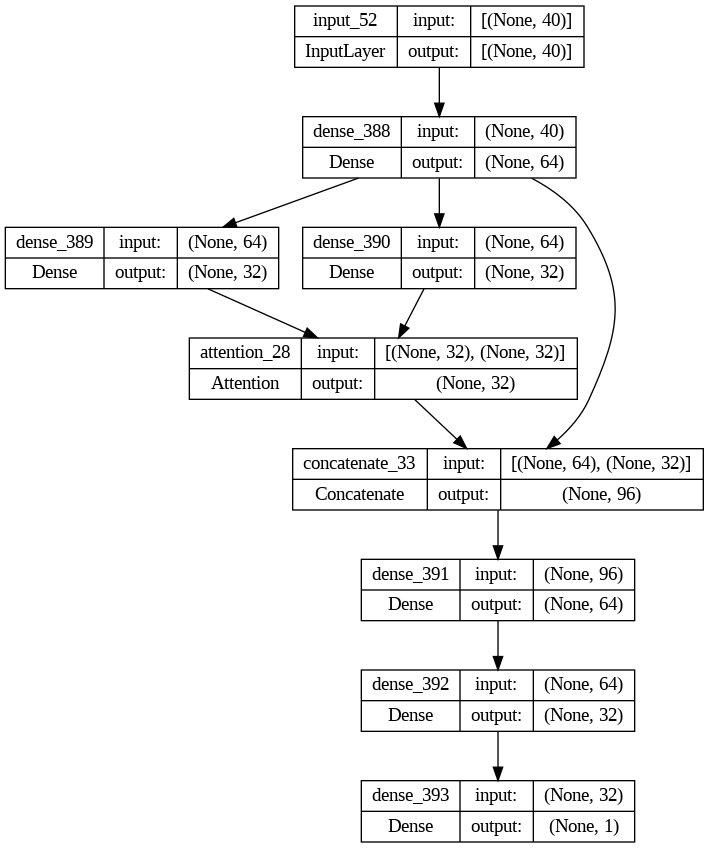

In [485]:
# Best model - without tricks

inputs = tf.keras.Input(shape=(X_sub_train_standardized.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)

query = tf.keras.layers.Dense(32, activation='relu')(x)
value = tf.keras.layers.Dense(32, activation='relu')(x)
attention = tf.keras.layers.Attention()([query, value])
context = tf.keras.layers.Concatenate()([x, attention])

x = tf.keras.layers.Dense(64, activation='relu')(context)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)
model_4 = tf.keras.Model(inputs=inputs, outputs=outputs)

tf.keras.utils.plot_model(model_4, show_shapes=True, show_layer_names=True)

## Early Stopping

This is a pretty basic technique but super useful. It prevents the model from learning the noise in the training data by stopping the training process at the point where performance on the validation set is maximized (or just before it starts to decrease).

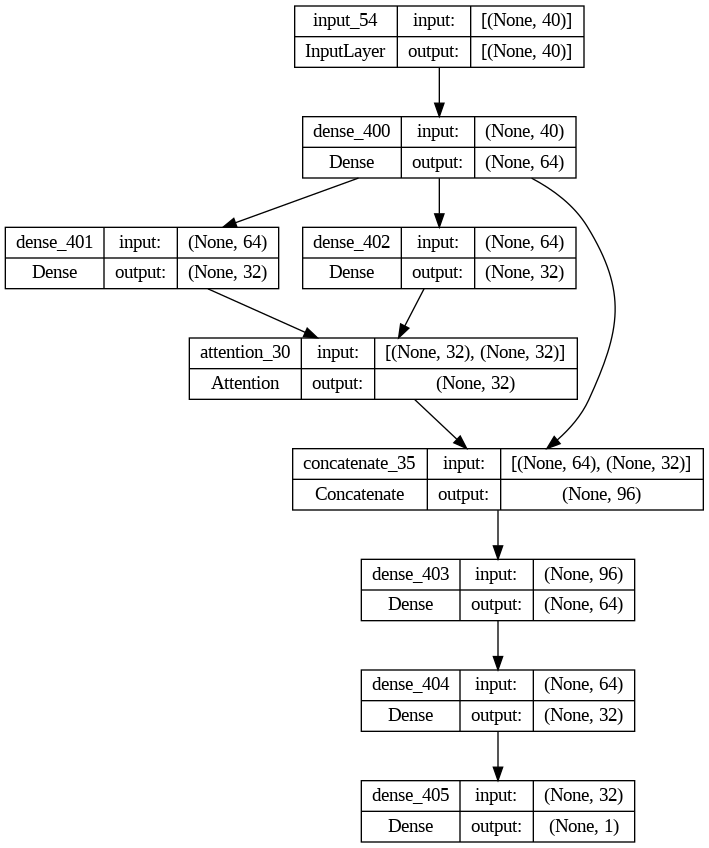

In [489]:
# no changes in the architecture, but I re-write model here anyway
inputs = tf.keras.Input(shape=(X_sub_train_standardized.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)

query = tf.keras.layers.Dense(32, activation='relu')(x)
value = tf.keras.layers.Dense(32, activation='relu')(x)
attention = tf.keras.layers.Attention()([query, value])
context = tf.keras.layers.Concatenate()([x, attention])

x = tf.keras.layers.Dense(64, activation='relu')(context)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)
model_4_stopping = tf.keras.Model(inputs=inputs, outputs=outputs)

tf.keras.utils.plot_model(model_4_stopping, show_shapes=True, show_layer_names=True)

In [490]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

In [491]:
model_4_stopping.compile(
    loss=r2_loss,
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = model_4_stopping.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=1000,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized),
    callbacks=[early_stopping_callback]
)

history_4_stopping= pd.DataFrame(history.history)

Epoch 1/1000
57/57 [==============================] - 3s 13ms/step - loss: 1.1684 - r2_score: -0.1396 - val_loss: 1.1246 - val_r2_score: -0.0408
Epoch 2/1000
57/57 [==============================] - 0s 6ms/step - loss: 1.0688 - r2_score: -0.0183 - val_loss: 1.0422 - val_r2_score: 0.0195
Epoch 3/1000
57/57 [==============================] - 0s 6ms/step - loss: 0.9729 - r2_score: 0.0535 - val_loss: 0.9836 - val_r2_score: 0.0691
Epoch 4/1000
57/57 [==============================] - 0s 6ms/step - loss: 0.9098 - r2_score: 0.1240 - val_loss: 0.9343 - val_r2_score: 0.1071
Epoch 5/1000
57/57 [==============================] - 0s 7ms/step - loss: 0.8577 - r2_score: 0.1681 - val_loss: 0.8933 - val_r2_score: 0.1434
Epoch 6/1000
57/57 [==============================] - 0s 5ms/step - loss: 0.8118 - r2_score: 0.2142 - val_loss: 0.8554 - val_r2_score: 0.1750
Epoch 7/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.7662 - r2_score: 0.2645 - val_loss: 0.8293 - val_r2_score: 0.2005
Ep

## Max-Norm Regularization

With this technique, we are limiting the maximum value of the weights. This constraint can lead to a more regularized and stable model, as it ensures that no weight can dominate the model's learning, forcing the network to better distribute the learning across all neurons.

In [507]:
max_norm_value = 1.0

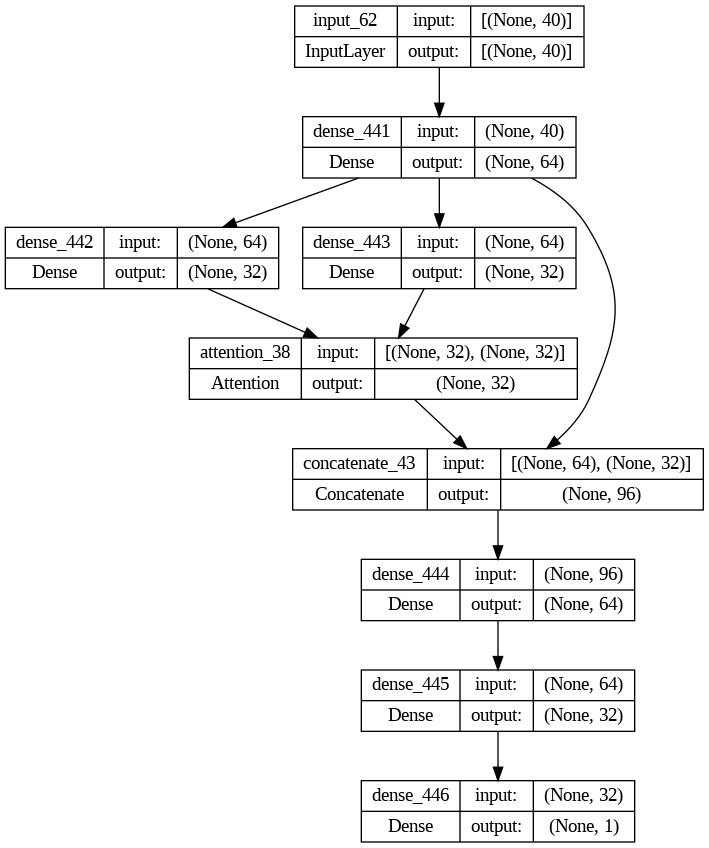

In [508]:
inputs = tf.keras.Input(shape=(X_sub_train_standardized.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu', kernel_constraint=tf.keras.constraints.max_norm(max_norm_value))(inputs)

query = tf.keras.layers.Dense(32, activation='relu', kernel_constraint=tf.keras.constraints.max_norm(max_norm_value))(x)
value = tf.keras.layers.Dense(32, activation='relu', kernel_constraint=tf.keras.constraints.max_norm(max_norm_value))(x)
attention = tf.keras.layers.Attention()([query, value])
context = tf.keras.layers.Concatenate()([x, attention])

x = tf.keras.layers.Dense(64, activation='relu', kernel_constraint=tf.keras.constraints.max_norm(max_norm_value))(context)
x = tf.keras.layers.Dense(32, activation='relu', kernel_constraint=tf.keras.constraints.max_norm(max_norm_value))(x)
outputs = tf.keras.layers.Dense(1)(x)
model_4_maxnorm = tf.keras.Model(inputs=inputs, outputs=outputs)

tf.keras.utils.plot_model(model_4_maxnorm, show_shapes=True, show_layer_names=True)

In [510]:
model_4_maxnorm.compile(
    loss=r2_loss,
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = model_4_maxnorm.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized),
)

history_4_maxnorm= pd.DataFrame(history.history)

Epoch 1/200
57/57 [==============================] - 2s 9ms/step - loss: 0.3619 - r2_score: 0.6563 - val_loss: 0.5799 - val_r2_score: 0.4865
Epoch 2/200
57/57 [==============================] - 0s 5ms/step - loss: 0.3529 - r2_score: 0.6608 - val_loss: 0.5769 - val_r2_score: 0.4904
Epoch 3/200
57/57 [==============================] - 1s 9ms/step - loss: 0.3527 - r2_score: 0.6602 - val_loss: 0.5617 - val_r2_score: 0.4985
Epoch 4/200
57/57 [==============================] - 1s 10ms/step - loss: 0.3566 - r2_score: 0.6634 - val_loss: 0.5574 - val_r2_score: 0.5018
Epoch 5/200
57/57 [==============================] - 1s 9ms/step - loss: 0.3457 - r2_score: 0.6655 - val_loss: 0.5554 - val_r2_score: 0.5031
Epoch 6/200
57/57 [==============================] - 0s 8ms/step - loss: 0.3528 - r2_score: 0.6662 - val_loss: 0.5513 - val_r2_score: 0.5073
Epoch 7/200
57/57 [==============================] - 0s 8ms/step - loss: 0.3483 - r2_score: 0.6714 - val_loss: 0.5678 - val_r2_score: 0.4980
Epoch 8/200


## Dropout

Works by randomly "dropping out" a proportion of neurons during training, which forces the network to learn more robust features, because due to the drop of some random neurons it cannot co-adapt to a specific pattern. This means that the network cannot rely on any individual set of features and must generalize better to unseen data, which indeed helps reduce overfitting.

In [511]:
dropout_rate = 0.2

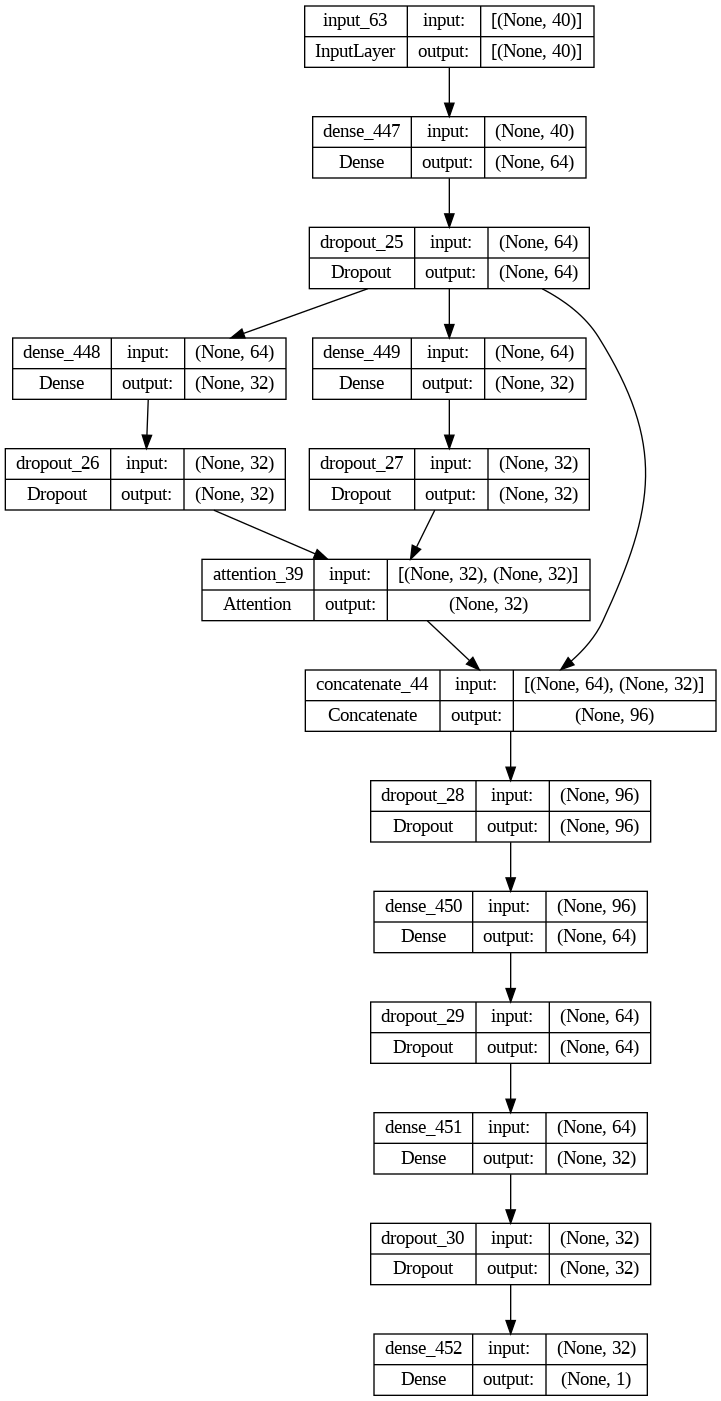

In [512]:
inputs = tf.keras.Input(shape=(X_sub_train_standardized.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dropout(dropout_rate)(x)

query = tf.keras.layers.Dense(32, activation='relu')(x)
query = tf.keras.layers.Dropout(dropout_rate)(query)
value = tf.keras.layers.Dense(32, activation='relu')(x)
value = tf.keras.layers.Dropout(dropout_rate)(value)

attention = tf.keras.layers.Attention()([query, value])
context = tf.keras.layers.Concatenate()([x, attention])
context = tf.keras.layers.Dropout(dropout_rate)(context)

x = tf.keras.layers.Dense(64, activation='relu')(context)
x = tf.keras.layers.Dropout(dropout_rate)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)

outputs = tf.keras.layers.Dense(1)(x)
model_4_dropout = tf.keras.Model(inputs=inputs, outputs=outputs)

tf.keras.utils.plot_model(model_4_dropout, show_shapes=True, show_layer_names=True)

In [513]:
model_4_dropout.compile(
    loss=r2_loss,
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = model_4_dropout.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized),
)

history_4_dropout = pd.DataFrame(history.history)

Epoch 1/200
57/57 [==============================] - 2s 9ms/step - loss: 2.2762 - r2_score: -1.2176 - val_loss: 1.5711 - val_r2_score: -0.2747
Epoch 2/200
57/57 [==============================] - 0s 5ms/step - loss: 2.5437 - r2_score: -1.0569 - val_loss: 1.3985 - val_r2_score: -0.1677
Epoch 3/200
57/57 [==============================] - 0s 5ms/step - loss: 1.6965 - r2_score: -0.6189 - val_loss: 1.3343 - val_r2_score: -0.1261
Epoch 4/200
57/57 [==============================] - 0s 5ms/step - loss: 1.6074 - r2_score: -0.4603 - val_loss: 1.3115 - val_r2_score: -0.1097
Epoch 5/200
57/57 [==============================] - 0s 4ms/step - loss: 1.7164 - r2_score: -0.6273 - val_loss: 1.2445 - val_r2_score: -0.0716
Epoch 6/200
57/57 [==============================] - 0s 5ms/step - loss: 1.3085 - r2_score: -0.2223 - val_loss: 1.2072 - val_r2_score: -0.0500
Epoch 7/200
57/57 [==============================] - 0s 5ms/step - loss: 1.2751 - r2_score: -0.2076 - val_loss: 1.2035 - val_r2_score: -0.0451

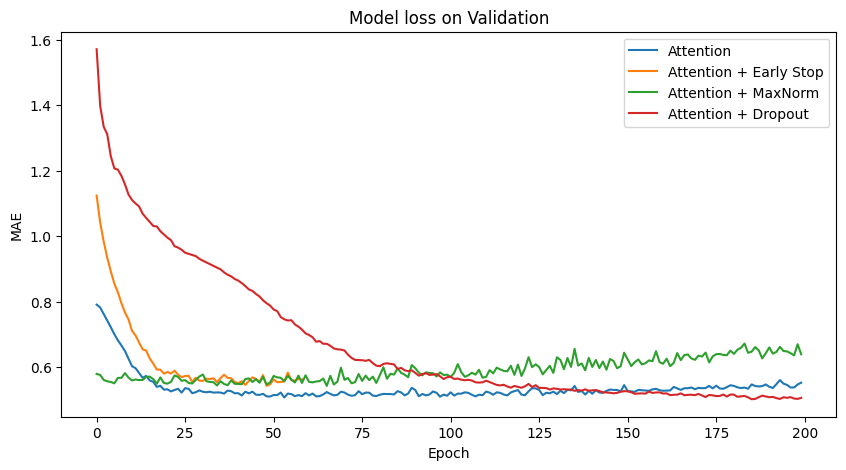

<Figure size 1000x500 with 0 Axes>

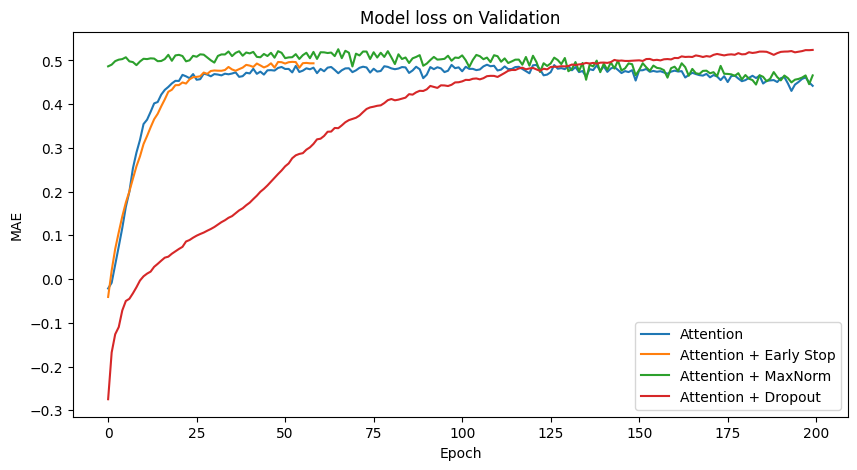

In [514]:
plt.figure(figsize=(10, 5))
plt.plot(history_4['val_loss'], label='Attention')
plt.plot(history_4_stopping['val_loss'], label='Attention + Early Stop')
plt.plot(history_4_maxnorm['val_loss'], label='Attention + MaxNorm')
plt.plot(history_4_dropout['val_loss'], label='Attention + Dropout')
plt.title('Model loss on Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.figure(figsize=(10, 5))
plt.plot(history_4['val_r2_score'], label='Attention')
plt.plot(history_4_stopping['val_r2_score'], label='Attention + Early Stop')
plt.plot(history_4_maxnorm['val_r2_score'], label='Attention + MaxNorm')
plt.plot(history_4_dropout['val_r2_score'], label='Attention + Dropout')
plt.title('Model loss on Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

Overall, though early stopping seems to perform well on the basic model, I would say the best technique in this case is dropout. Indeed, note how the loss in the dropout keeps decreasing as the epochs increase, and the R2 increases too. We are not overfitting, and it seems that the accuracy can increase even more. I could increase the number of epochs. Below i report the metrics on train too to if the train loss is decreasing or it has almost converged.

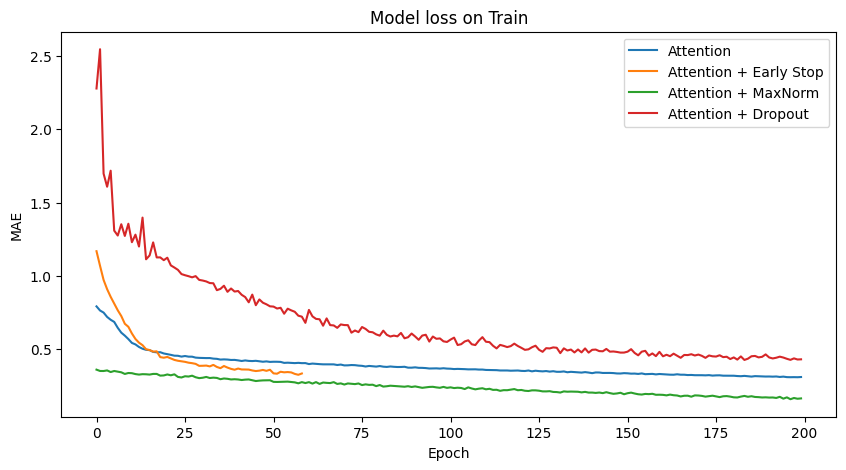

<Figure size 1000x500 with 0 Axes>

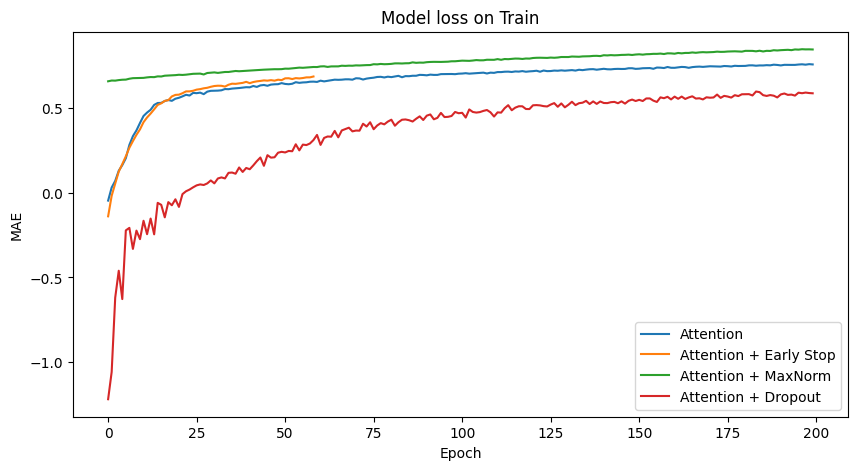

In [516]:
plt.figure(figsize=(10, 5))
plt.plot(history_4['loss'], label='Attention')
plt.plot(history_4_stopping['loss'], label='Attention + Early Stop')
plt.plot(history_4_maxnorm['loss'], label='Attention + MaxNorm')
plt.plot(history_4_dropout['loss'], label='Attention + Dropout')
plt.title('Model loss on Train')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.figure(figsize=(10, 5))
plt.plot(history_4['r2_score'], label='Attention')
plt.plot(history_4_stopping['r2_score'], label='Attention + Early Stop')
plt.plot(history_4_maxnorm['r2_score'], label='Attention + MaxNorm')
plt.plot(history_4_dropout['r2_score'], label='Attention + Dropout')
plt.title('Model loss on Train')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Question 8 (12.5 points): Use a Random and Bayesian Search to do Hyperparameter Tuning
<br>

- For this question, use your best performing model from above.

- Tune at least 5 hyperparameters of your choosing for that model and provide reasons for your choices.

- Do one additional tuner search method to tune your hyperparameters. You can choose from here: <a href="https://keras.io/api/keras_tuner/tuners/">Keras Tuners</a>.

- Evaluate your: untuned model, tuned model, and baseline model on the test set.

- Finally, write a one paragraph summary of your experiments and their results. Conclude with recommendations on which model configuration performs best and which ones should be explored further.

Before tuning the parameters, I want to explore if Drop out combined with batch normalization is even better.

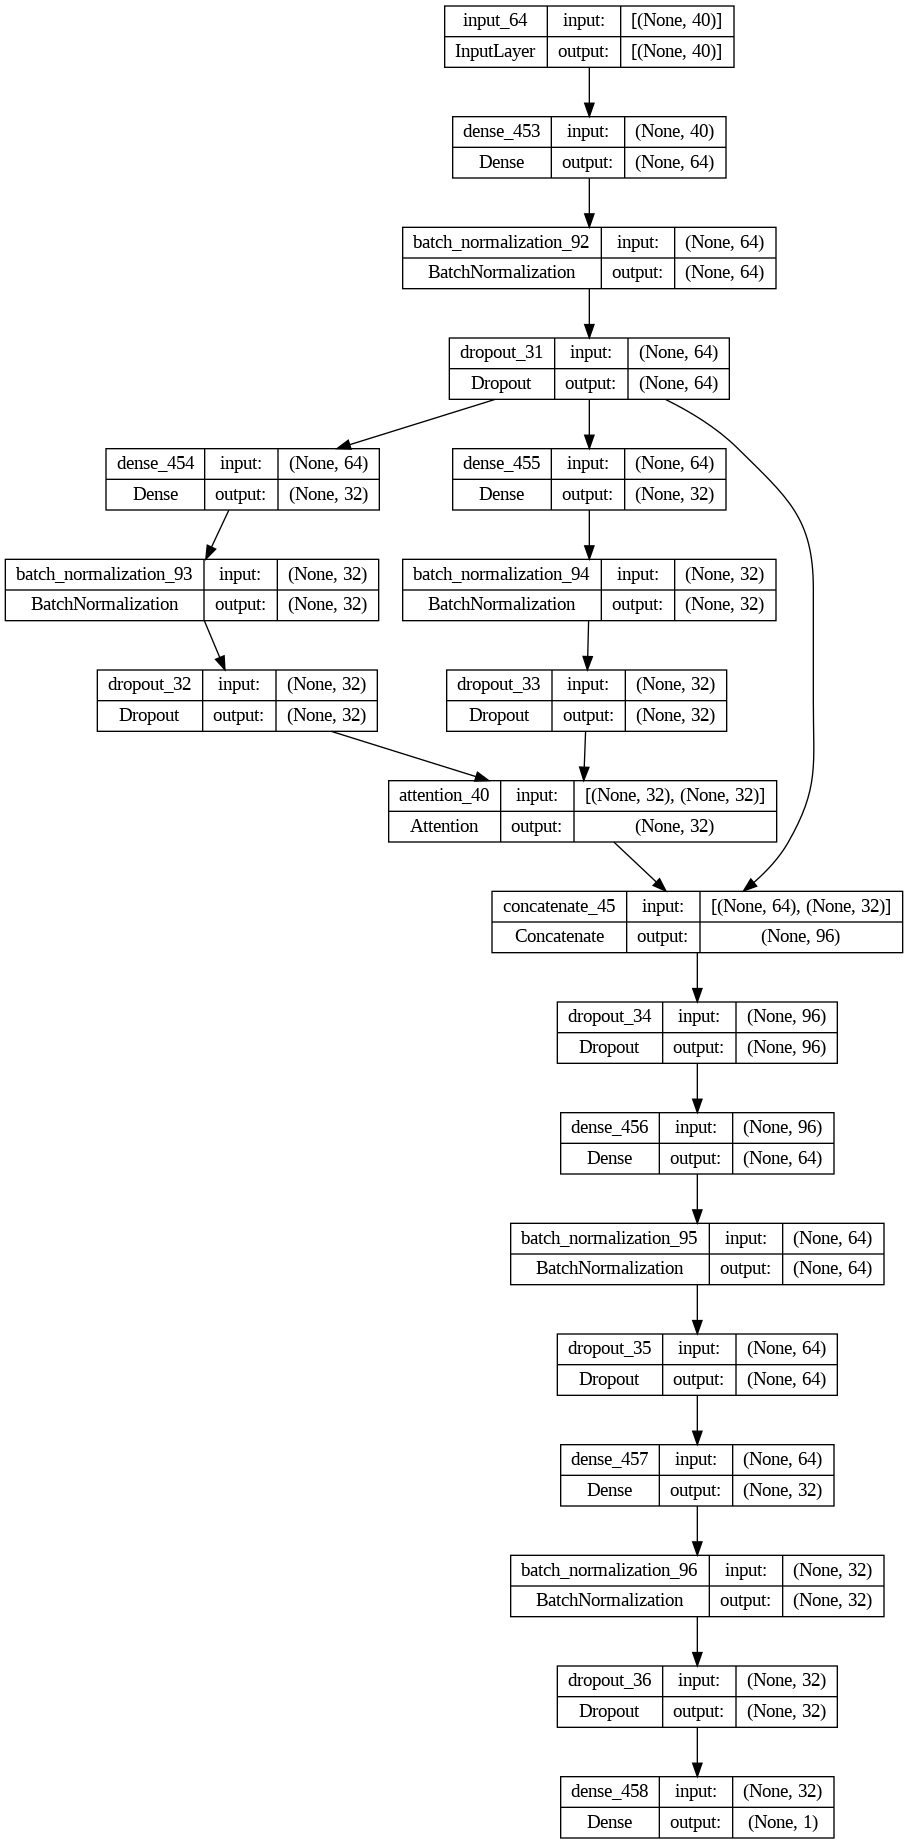

In [517]:
inputs = tf.keras.Input(shape=(X_sub_train_standardized.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)

query = tf.keras.layers.Dense(32, activation='relu')(x)
query = tf.keras.layers.BatchNormalization()(query)
query = tf.keras.layers.Dropout(dropout_rate)(query)

value = tf.keras.layers.Dense(32, activation='relu')(x)
value = tf.keras.layers.BatchNormalization()(value)
value = tf.keras.layers.Dropout(dropout_rate)(value)

attention = tf.keras.layers.Attention()([query, value])
context = tf.keras.layers.Concatenate()([x, attention])
context = tf.keras.layers.Dropout(dropout_rate)(context)

x = tf.keras.layers.Dense(64, activation='relu')(context)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)

x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)

outputs = tf.keras.layers.Dense(1)(x)
model_4_dropout_norm = tf.keras.Model(inputs=inputs, outputs=outputs)

tf.keras.utils.plot_model(model_4_dropout_norm, show_shapes=True, show_layer_names=True)

In [518]:
model_4_dropout_norm.compile(
    loss=r2_loss,
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = model_4_dropout_norm.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized),
)

history_4_dropout_norm = pd.DataFrame(history.history)

Epoch 1/200
57/57 [==============================] - 7s 17ms/step - loss: 3.4673 - r2_score: -2.2309 - val_loss: 1.3968 - val_r2_score: -0.2275
Epoch 2/200
57/57 [==============================] - 0s 7ms/step - loss: 2.9109 - r2_score: -1.7197 - val_loss: 1.4076 - val_r2_score: -0.2488
Epoch 3/200
57/57 [==============================] - 0s 7ms/step - loss: 2.7235 - r2_score: -1.5483 - val_loss: 1.3616 - val_r2_score: -0.2159
Epoch 4/200
57/57 [==============================] - 0s 6ms/step - loss: 2.5471 - r2_score: -1.3375 - val_loss: 1.2869 - val_r2_score: -0.1691
Epoch 5/200
57/57 [==============================] - 0s 6ms/step - loss: 2.3054 - r2_score: -1.1504 - val_loss: 1.2417 - val_r2_score: -0.1400
Epoch 6/200
57/57 [==============================] - 0s 6ms/step - loss: 2.4391 - r2_score: -1.1724 - val_loss: 1.2018 - val_r2_score: -0.1037
Epoch 7/200
57/57 [==============================] - 0s 6ms/step - loss: 2.3157 - r2_score: -1.1061 - val_loss: 1.2007 - val_r2_score: -0.088

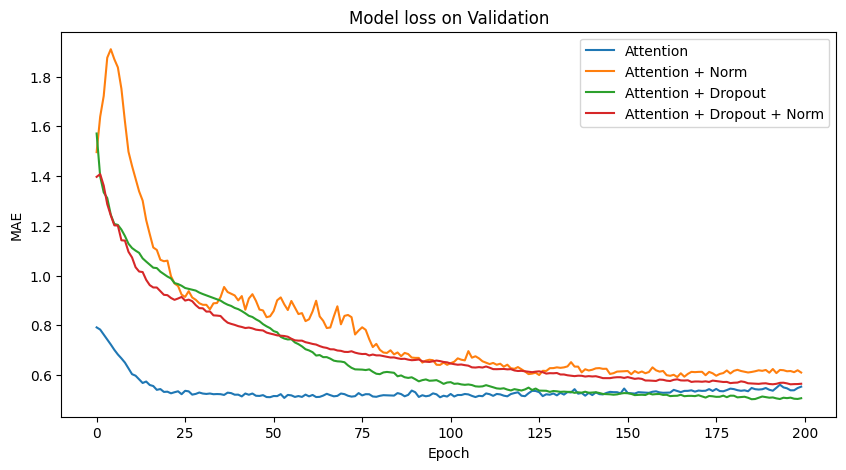

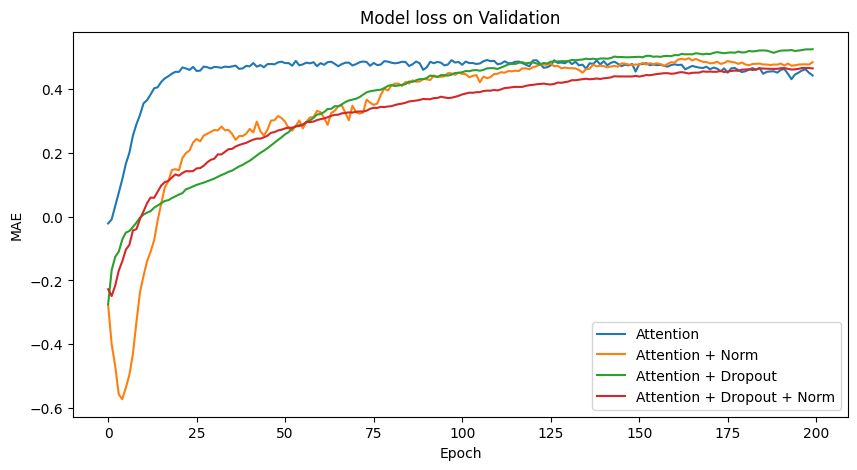

In [519]:
plt.figure(figsize=(10, 5))
plt.plot(history_4['val_loss'], label='Attention')
plt.plot(history_4_normalization['val_loss'], label='Attention + Norm')
plt.plot(history_4_dropout['val_loss'], label='Attention + Dropout')
plt.plot(history_4_dropout_norm['val_loss'], label='Attention + Dropout + Norm')
plt.title('Model loss on Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_4['val_r2_score'], label='Attention')
plt.plot(history_4_normalization['val_r2_score'], label='Attention + Norm')
plt.plot(history_4_dropout['val_r2_score'], label='Attention + Dropout')
plt.plot(history_4_dropout_norm['val_r2_score'], label='Attention + Dropout + Norm')
plt.title('Model loss on Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

We have a winner: Attention + Dropout will be our final model.

## Base Model: Linear Regression + PCA

In [572]:
number_of_components = 15

#### use PCA to get PC codings

encoder = tf.keras.Sequential([tf.keras.layers.Dense(number_of_components, input_shape=(X_sub_train_standardized.shape[1], ))])
decoder = tf.keras.Sequential([tf.keras.layers.Dense(X_sub_train_standardized.shape[1])])

autoencoder = tf.keras.Sequential([encoder, decoder])
autoencoder.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

autoencoder.fit(X_sub_train_standardized, X_sub_train_standardized, epochs=100, verbose=False)

X_train_PC_codings = encoder.predict(X_sub_train_standardized)
X_validation_PC_codings = encoder.predict(X_validation_standardized)


model_base = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_train_PC_codings.shape[1],), activation='linear')
])

15/15 [==============================] - 0s 2ms/step


In [574]:
model_base.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),  metrics=[tf.keras.metrics.R2Score()])

history = model_base.fit(
    X_train_PC_codings,
    Y_sub_train_standardized,
    epochs=300,
    batch_size=batch_size,
    validation_data=(X_validation_PC_codings, Y_validation_standardized)
)

history_base = pd.DataFrame(history.history)

Epoch 1/300
29/29 [==============================] - 2s 27ms/step - loss: 0.5920 - r2_score: 0.4077 - val_loss: 0.7145 - val_r2_score: 0.3681
Epoch 2/300
29/29 [==============================] - 0s 9ms/step - loss: 0.5845 - r2_score: 0.4151 - val_loss: 0.7066 - val_r2_score: 0.3750
Epoch 3/300
29/29 [==============================] - 0s 11ms/step - loss: 0.5851 - r2_score: 0.4146 - val_loss: 0.6976 - val_r2_score: 0.3830
Epoch 4/300
29/29 [==============================] - 0s 12ms/step - loss: 0.5813 - r2_score: 0.4184 - val_loss: 0.7533 - val_r2_score: 0.3338
Epoch 5/300
29/29 [==============================] - 0s 11ms/step - loss: 0.5935 - r2_score: 0.4062 - val_loss: 0.7017 - val_r2_score: 0.3794
Epoch 6/300
29/29 [==============================] - 0s 12ms/step - loss: 0.5812 - r2_score: 0.4185 - val_loss: 0.7040 - val_r2_score: 0.3774
Epoch 7/300
29/29 [==============================] - 0s 10ms/step - loss: 0.5841 - r2_score: 0.4156 - val_loss: 0.7044 - val_r2_score: 0.3770
Epoch 8

## Final model - Not tuned

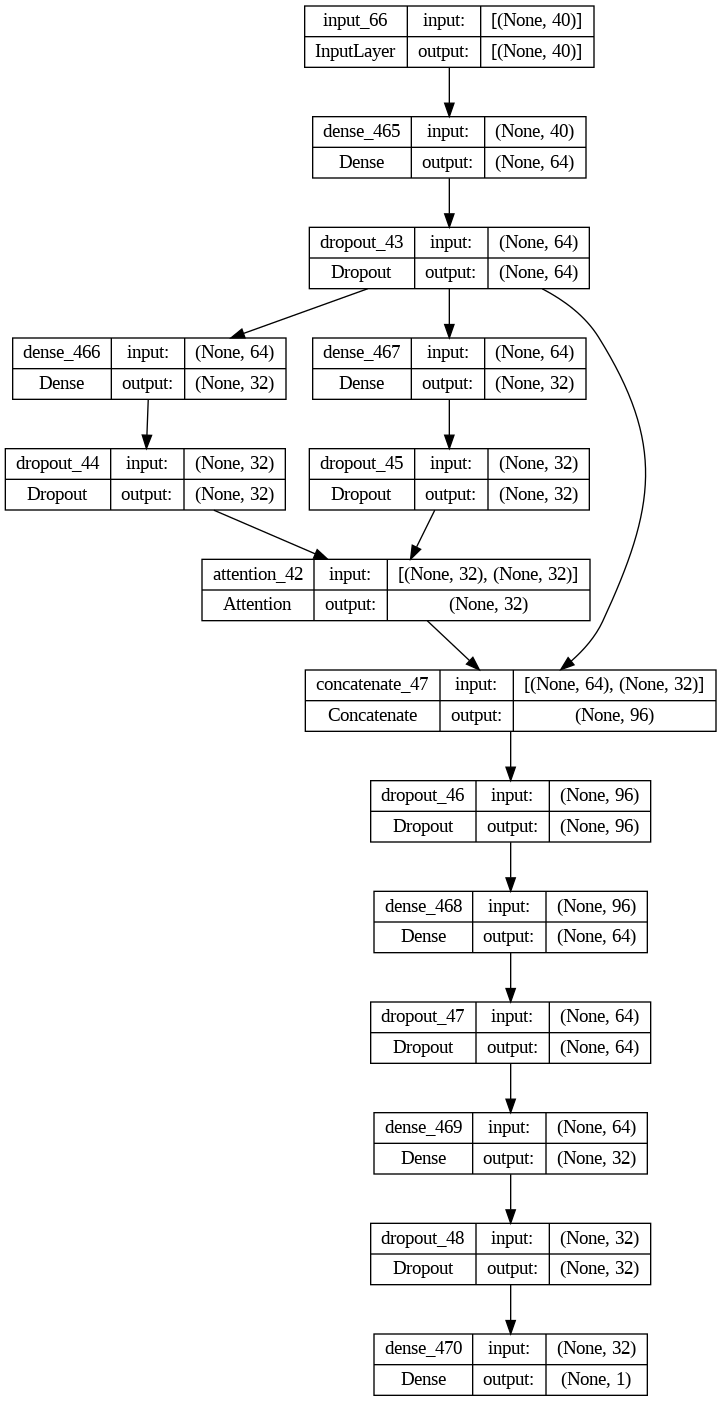

In [548]:
dropout = 0.2

inputs = tf.keras.Input(shape=(X_sub_train_standardized.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dropout(dropout_rate)(x)

query = tf.keras.layers.Dense(32, activation='relu')(x)
query = tf.keras.layers.Dropout(dropout_rate)(query)
value = tf.keras.layers.Dense(32, activation='relu')(x)
value = tf.keras.layers.Dropout(dropout_rate)(value)

attention = tf.keras.layers.Attention()([query, value])
context = tf.keras.layers.Concatenate()([x, attention])
context = tf.keras.layers.Dropout(dropout_rate)(context)

x = tf.keras.layers.Dense(64, activation='relu')(context)
x = tf.keras.layers.Dropout(dropout_rate)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)

outputs = tf.keras.layers.Dense(1)(x)
model_final_untuned= tf.keras.Model(inputs=inputs, outputs=outputs)

tf.keras.utils.plot_model(model_final_untuned, show_shapes=True, show_layer_names=True)

In [551]:
model_final_untuned.compile(
    loss=r2_loss,
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = model_final_untuned.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=300,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized),
)

history_final_untuned = pd.DataFrame(history.history)

Epoch 1/300
57/57 [==============================] - 5s 20ms/step - loss: 2.3178 - r2_score: -1.1586 - val_loss: 1.0925 - val_r2_score: -0.0656
Epoch 2/300
57/57 [==============================] - 1s 9ms/step - loss: 1.2358 - r2_score: -0.1580 - val_loss: 1.0540 - val_r2_score: -0.0146
Epoch 3/300
57/57 [==============================] - 0s 7ms/step - loss: 1.0651 - r2_score: -0.0262 - val_loss: 1.0516 - val_r2_score: -0.0109
Epoch 4/300
57/57 [==============================] - 1s 10ms/step - loss: 1.0659 - r2_score: -0.0185 - val_loss: 1.0411 - val_r2_score: -8.6784e-05
Epoch 5/300
57/57 [==============================] - 1s 9ms/step - loss: 1.0615 - r2_score: -0.0221 - val_loss: 1.0335 - val_r2_score: 0.0072
Epoch 6/300
57/57 [==============================] - 1s 12ms/step - loss: 1.0198 - r2_score: 0.0132 - val_loss: 1.0178 - val_r2_score: 0.0217
Epoch 7/300
57/57 [==============================] - 1s 11ms/step - loss: 1.0149 - r2_score: 0.0240 - val_loss: 0.9899 - val_r2_score: 0.0

## Final Model - Tuning

Note: I won't tune the model architecture, as I am not an expert of Attention Mechanism. Instead, I will focus on different hyperparameters:
- learning rate: it is very important, as it determines the convergence of backpropagation. If too high, the solution won't be found as the steps taken are too big. If too low, the model will be super slow in the training. Finding a good lr is not easy, but we must try to tune it.
- optimizer: each optimizer has specific behaviors and hyperparameters, so different optimizers can  affect the training speed, ability to avoid local minima, and the overall stability and generalization of the model.
- dropout rate: previously, I arbitrarily chose 0.2. however, the dropout rate might be higher or lower, or zero too. I force the dropout to be a multiple of 0.1 to that it is more likely that all the six possible values are taken on at least once.
- activation function: we saw in class how important these are. first, we want the model to be non linear to be more complex, but i still leave the possiblity for the activation to be linear. second, dfferent activations have different effects on the gradient, so they can heavily influence the training.
- loss function: in the previous section, we tried the same model on different losses and noted how the performance changed. I determined R2 to be the best loss based on that experiment. however, as the other hyperparams change, then R2 might not be the best anymore.

In [552]:
! pip install keras-tuner

In [526]:
import keras_tuner as kt

In [559]:
def build_model(hyper_param):

    # hyperparam 1: learning rate
    learning_rate = hyper_param.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")

    # hyperparam 2: optimizer algorithm
    optimizer = hyper_param.Choice("optimizer", values=["sgd", "adam", "rmsprop"])
    if optimizer == "sgd":
      optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "adam":
      optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "rmsprop":
      optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    # hyperparam 3: dropout rate
    dropout_rate = hyper_param.Float("dropout_rate", min_value=0, max_value=0.5, step=0.1)

    # hyperparam 4: choosing the activation function
    activation = hyper_param.Choice("activation", values=["relu", "leaky_relu", "linear", "swish"])
    if activation == "relu":
      activation = tf.keras.activations.relu
    elif activation == "leaky_relu":
      activation = tf.keras.layers.LeakyReLU(alpha=0.2)
    elif activation == "swish":
      activation = tf.keras.activations.swish
    elif activation == "linear":
      activation = tf.keras.activations.linear

    # hyperparam 5: loss function
    loss = hyper_param.Choice("loss", values=["r2", "mse", "mae", "huber"])
    if loss == "r2":
      loss = r2_loss

    # hyperparam 6: batch_size
    batch_size = hyper_param.Int("batch_size", min_value=32, max_value=128, step=32)

    # build the sequential model using the hyperparameter values
    inputs = tf.keras.Input(shape=(X_sub_train_standardized.shape[1],))
    x = tf.keras.layers.Dense(64, activation=activation)(inputs)
    x = tf.keras.layers.Dropout(dropout_rate)(x)

    query = tf.keras.layers.Dense(32, activation=activation)(x)
    query = tf.keras.layers.Dropout(dropout_rate)(query)
    value = tf.keras.layers.Dense(32, activation=activation)(x)
    value = tf.keras.layers.Dropout(dropout_rate)(value)

    attention = tf.keras.layers.Attention()([query, value])
    context = tf.keras.layers.Concatenate()([x, attention])
    context = tf.keras.layers.Dropout(dropout_rate)(context)

    x = tf.keras.layers.Dense(64, activation=activation)(context)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    x = tf.keras.layers.Dense(32, activation=activation)(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)

    outputs = tf.keras.layers.Dense(1)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

  # compile the model
    model.compile(
        loss=loss,
        optimizer=optimizer,
        metrics=[tf.keras.metrics.R2Score()]
    )

    return model

### Random Search

In [561]:
NN_random_search_tuner = kt.RandomSearch(
    build_model,
    objective="val_loss",
    max_trials=10,
    overwrite = True,
    seed=42)

NN_random_search_tuner.search(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=100,
    validation_data=(X_validation_standardized, Y_validation_standardized)
)

Trial 10 Complete [00h 00m 42s]
val_loss: 0.5951418876647949

Best val_loss So Far: 0.2590978145599365
Total elapsed time: 00h 06m 57s


In [562]:
best_params_random = NN_random_search_tuner.get_best_hyperparameters(num_trials=3)[0].values
best_params_random

{'learning_rate': 0.0019004375238737127,
 'optimizer': 'sgd',
 'dropout_rate': 0.2,
 'activation': 'leaky_relu',
 'loss': 'huber',
 'batch_size': 64}

### Bayesian Search

In [563]:
NN_bayesian_opt_tuner = kt.BayesianOptimization(
    build_model,
    objective="val_loss",
    seed=42,
    max_trials=10,
    overwrite=True,
    alpha=1e-4,
    beta=2.6
)

NN_bayesian_opt_tuner.search(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=100,
    validation_data=(X_validation_standardized, Y_validation_standardized)
)

Trial 10 Complete [00h 00m 40s]
val_loss: 0.584793210029602

Best val_loss So Far: 0.2387017458677292
Total elapsed time: 00h 07m 20s


In [564]:
best_params_bayes = NN_bayesian_opt_tuner.get_best_hyperparameters(num_trials=3)[0].values
best_params_bayes

{'learning_rate': 0.0019004375238737127,
 'optimizer': 'sgd',
 'dropout_rate': 0.2,
 'activation': 'leaky_relu',
 'loss': 'huber',
 'batch_size': 64}

### Hyperband

In [541]:
NN_hyperband_tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=20,
    seed=42,
    overwrite=True,
    factor=3,
)

NN_hyperband_tuner.search(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=20,
    validation_data=(X_validation_standardized, Y_validation_standardized)
)

Trial 30 Complete [00h 00m 10s]
val_loss: 0.4821816384792328

Best val_loss So Far: 0.22827933728694916
Total elapsed time: 00h 03m 08s


In [546]:
best_params_hyperband = NN_hyperband_tuner.get_best_hyperparameters(num_trials=3)[0].values
best_params_hyperband

{'learning_rate': 0.00905127409782462,
 'optimizer': 'adam',
 'dropout_rate': 0.4,
 'activation': 'relu',
 'loss': 'huber',
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0013'}

Among the three different tuners, the one that achieved the lowest best validation loss is the Bayesian Otpimization search. Therefore, I will proceed with the hyperparameters found by such optimizer.
I write the best parameters below, so that in case of re-run of the code there is no need to wait for the optimizer.

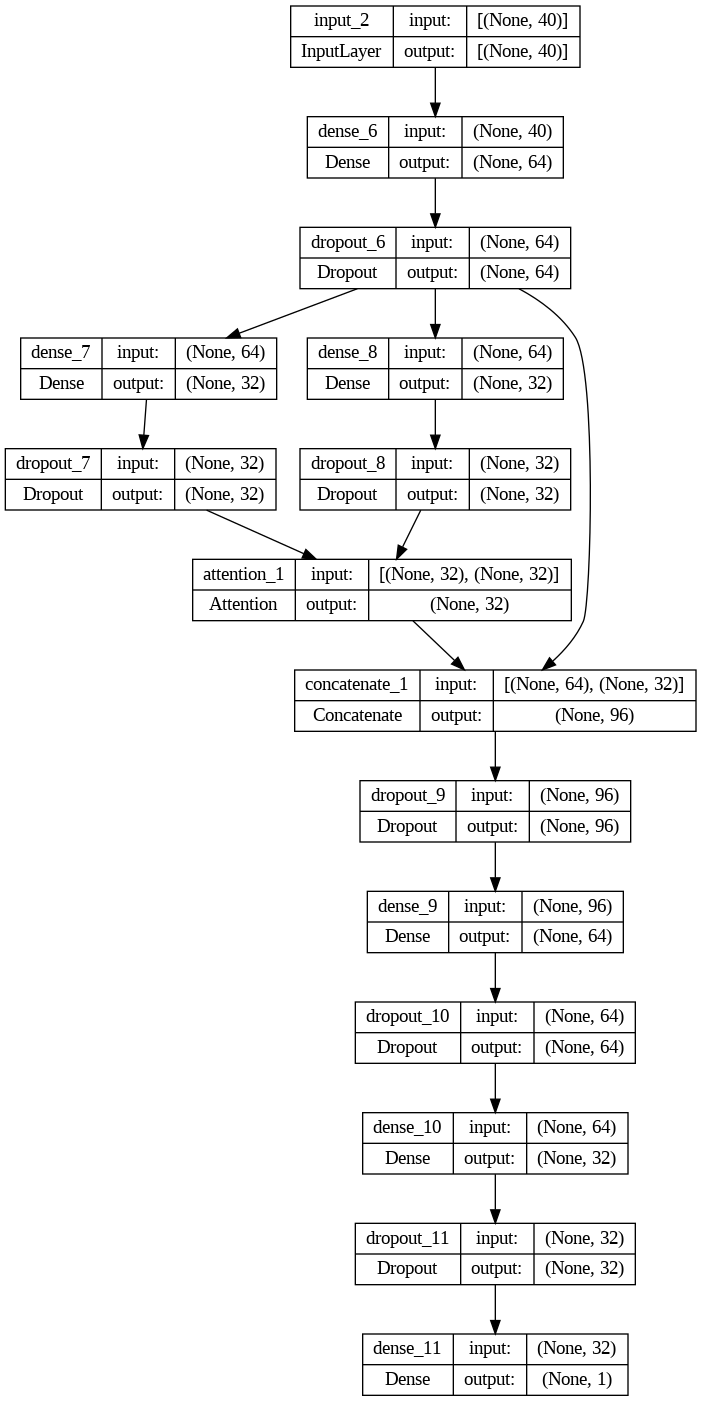

In [565]:
# final model - tuned

learning_rate = 0.00905127409782462
optimizer = tf.keras.optimizers.Adam
dropout_rate = 0.4
activation = 'relu'
loss = 'huber'
batch_size = 64


inputs = tf.keras.Input(shape=(X_sub_train_standardized.shape[1],))
x = tf.keras.layers.Dense(64, activation=activation)(inputs)
x = tf.keras.layers.Dropout(dropout_rate)(x)

query = tf.keras.layers.Dense(32, activation=activation)(x)
query = tf.keras.layers.Dropout(dropout_rate)(query)
value = tf.keras.layers.Dense(32, activation=activation)(x)
value = tf.keras.layers.Dropout(dropout_rate)(value)

attention = tf.keras.layers.Attention()([query, value])
context = tf.keras.layers.Concatenate()([x, attention])
context = tf.keras.layers.Dropout(dropout_rate)(context)

x = tf.keras.layers.Dense(64, activation=activation)(context)
x = tf.keras.layers.Dropout(dropout_rate)(x)
x = tf.keras.layers.Dense(32, activation=activation)(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)

outputs = tf.keras.layers.Dense(1)(x)
model_final_tuned= tf.keras.Model(inputs=inputs, outputs=outputs)

tf.keras.utils.plot_model(model_final_tuned, show_shapes=True, show_layer_names=True)

In [566]:
model_final_tuned.compile(
    loss=loss,
    optimizer=optimizer(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.R2Score()]
)

history = model_final_tuned.fit(
    X_sub_train_standardized,
    Y_sub_train_standardized,
    epochs=300,
    batch_size=batch_size,
    validation_data=(X_validation_standardized, Y_validation_standardized),
)

history_final_tuned = pd.DataFrame(history.history)

Epoch 1/300
29/29 [==============================] - 4s 23ms/step - loss: 0.5511 - r2_score: -0.5998 - val_loss: 0.4125 - val_r2_score: -0.0155
Epoch 2/300
29/29 [==============================] - 0s 8ms/step - loss: 0.4183 - r2_score: -0.0156 - val_loss: 0.4100 - val_r2_score: -0.0103
Epoch 3/300
29/29 [==============================] - 0s 10ms/step - loss: 0.4070 - r2_score: 0.0179 - val_loss: 0.4019 - val_r2_score: 0.0193
Epoch 4/300
29/29 [==============================] - 0s 9ms/step - loss: 0.3819 - r2_score: 0.0943 - val_loss: 0.3612 - val_r2_score: 0.1037
Epoch 5/300
29/29 [==============================] - 0s 8ms/step - loss: 0.3351 - r2_score: 0.1993 - val_loss: 0.2991 - val_r2_score: 0.2569
Epoch 6/300
29/29 [==============================] - 0s 8ms/step - loss: 0.3160 - r2_score: 0.2039 - val_loss: 0.3038 - val_r2_score: 0.2540
Epoch 7/300
29/29 [==============================] - 0s 12ms/step - loss: 0.2849 - r2_score: 0.3205 - val_loss: 0.2579 - val_r2_score: 0.3631
Epoch 

## Comparison

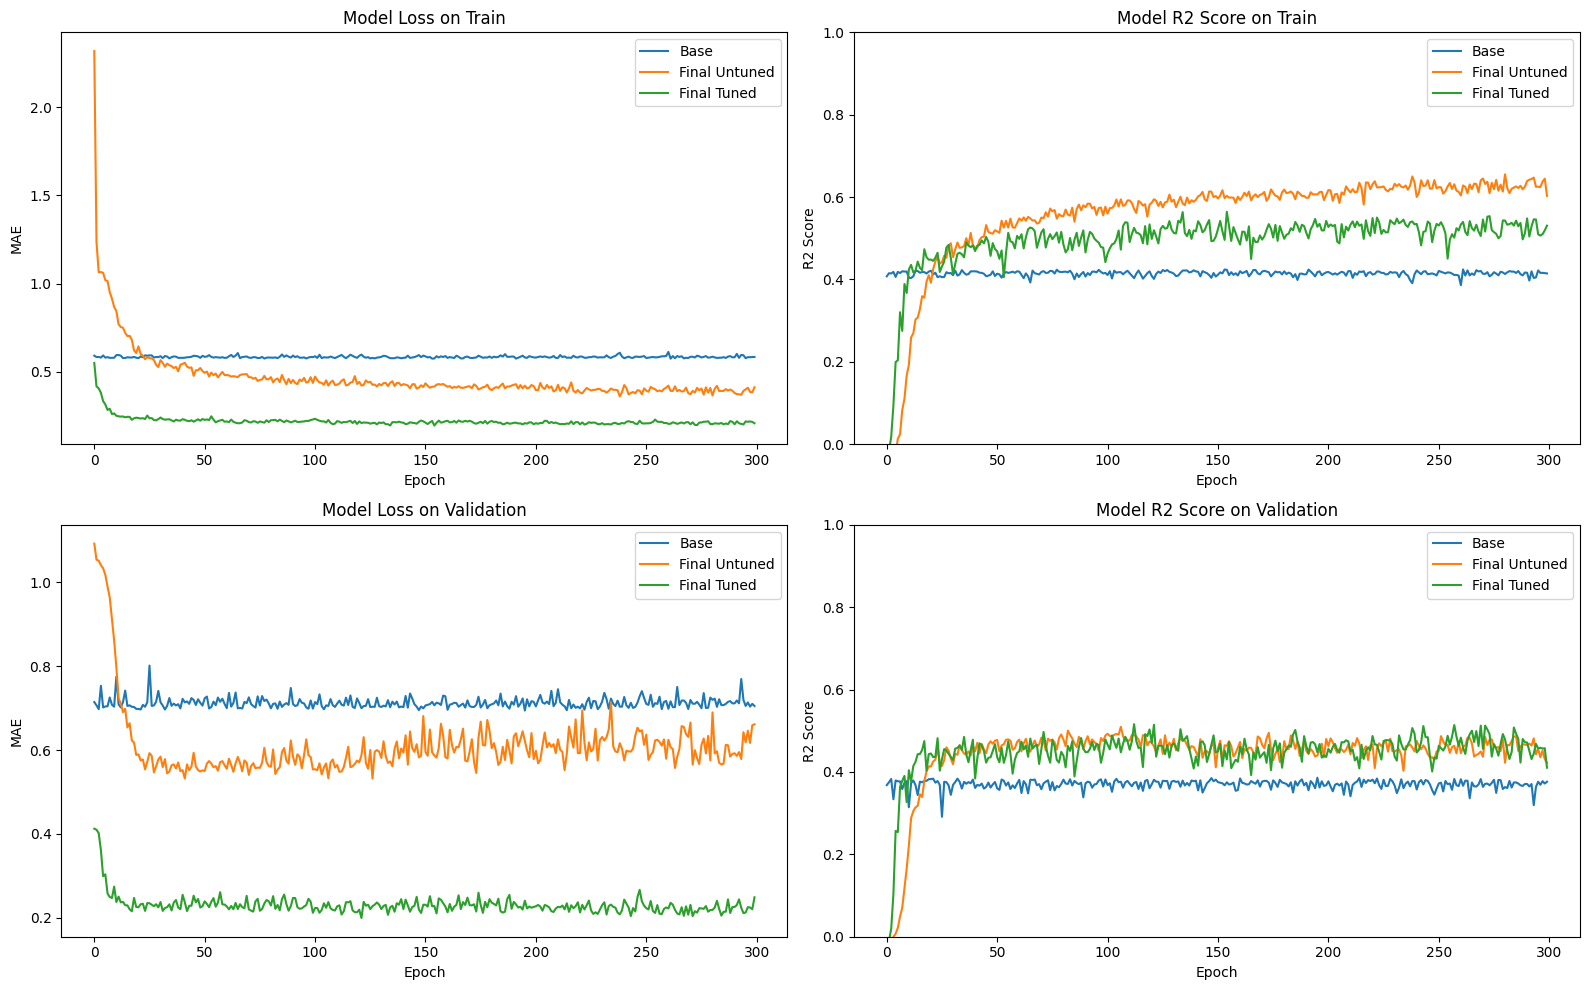

In [575]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # Create a 2x2 grid of subplots

# Top-left subplot
axs[0, 0].plot(history_base['loss'], label='Base')
axs[0, 0].plot(history_final_untuned['loss'], label='Final Untuned')
axs[0, 0].plot(history_final_tuned['loss'], label='Final Tuned')
axs[0, 0].set_title('Model Loss on Train')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('MAE')
axs[0, 0].legend()

# Top-right subplot
axs[0, 1].plot(history_base['r2_score'], label='Base')
axs[0, 1].plot(history_final_untuned['r2_score'], label='Final Untuned')
axs[0, 1].plot(history_final_tuned['r2_score'], label='Final Tuned')
axs[0, 1].set_title('Model R2 Score on Train')
axs[0, 1].set_ylim([0, 1])
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('R2 Score')
axs[0, 1].legend()

# Bottom-left subplot
axs[1, 0].plot(history_base['val_loss'], label='Base')
axs[1, 0].plot(history_final_untuned['val_loss'], label='Final Untuned')
axs[1, 0].plot(history_final_tuned['val_loss'], label='Final Tuned')
axs[1, 0].set_title('Model Loss on Validation')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].legend()

# Bottom-right subplot
axs[1, 1].plot(history_base['val_r2_score'], label='Base')
axs[1, 1].plot(history_final_untuned['val_r2_score'], label='Final Untuned')
axs[1, 1].plot(history_final_tuned['val_r2_score'], label='Final Tuned')
axs[1, 1].set_title('Model R2 Score on Validation')
axs[1, 1].set_ylim([0, 1])
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('R2 Score')
axs[1, 1].legend()

# Adjust layout to prevent overlap
fig.tight_layout()
plt.show()


In [577]:
test_loss_tuned, test_metric_tuned = model_final_tuned.evaluate(X_test_standardized, Y_test_standardized, verbose=0)
test_loss_untuned, test_metric_untuned = model_final_untuned.evaluate(X_test_standardized, Y_test_standardized, verbose=0)
test_loss_base, test_metric_base = model_base.evaluate( encoder.predict(X_test_standardized), Y_test_standardized, verbose=0)

# Print out the test metrics for comparison
print(f"Test Loss (Tuned Model): {test_loss_tuned}, Test Metric: {test_metric_tuned}")
print(f"Test Loss (Untuned Model): {test_loss_untuned}, Test Metric: {test_metric_untuned}")
print(f"Test Loss (Base Model): {test_loss_base}, Test Metric: {test_metric_base}")

18/18 [==============================] - 0s 3ms/step
Test Loss (Tuned Model): 0.12535496056079865, Test Metric: 0.6402239799499512
Test Loss (Untuned Model): 0.5272777080535889, Test Metric: 0.5620726346969604
Test Loss (Base Model): 0.30630436539649963, Test Metric: 0.570042610168457


## Summary

Finally, write a one paragraph summary of your experiments and their results. Conclude with recommendations on which model configuration performs best and which ones should be explored further.

In conclusion, this notebook documents a comprehensive series of experiments. We began by pre-processing the data and manually engineering features from existing ones to enhance our model's predictive capabilities. We then introduced time lags to our variables, aligning with the demands of time series forecasting. The possibility of experimenting with more time lags remains an avenue for future research.

Regarding modeling, we established our baseline with a basic linear regression and another linear regression using PCA for input dimensionality reduction. Subsequently, we experimented with neural networks (NNs). Among the various architectures explored, we shifted focus from a deep NN to ones with more complex structures, like NNs with paths, ResNet, attention mechanisms, RNNs, and LSTMs. These were chosen to leverage the inherent temporal structure of the data, which is somewhat overlooked by simple feedforward architectures. The attention-based NN emerged as the most effective, whereas RNNs and LSTMs underperformed, potentially due to a lack of in-depth exploration on my part. These powerful models warrant further study.

As we refined the attention-based NN, we concentrated on preventing vanishing gradients and overfitting. Batch normalization proved to be the best solution for the former, while dropout was optimal for the latter. With a robust architecture in place, we addressed the arbitrary nature of hyperparameter selection by tuning parameters such as the learning rate, activation functions, and batch size. Future work could explore tuning the number of layers and units. The tuning was conducted across three different optimizers, leading to the selection of the best parameters. More work could be done on the tuning, as the tuning search experiments were run on a small grid and on a low number of epochs.

Finally, we compared the base model with both the untuned and tuned versions. This comparison helped highlight the effectiveness of our tuning process and the robustness of the final model. As we note that all these efforts improved the accuracy by just little, I would suggest going back to the data and spend more time on the processing.

# TurnItIn
<br>
<font size="+1">
    <ul>
        <li>Submit this to TurnItIn on Blackboard -> Assignments.</li>
        <br>
        <li><b>Please double check your submission on TurnItIn (perhaps log out and log in to make sure your solution is loaded as you want it) as it will be very difficult to make any grading adjustments after submission.</b></li>
        <br>
        <li>Be sure to save your work on your computer in case anything goes wrong!</li>
        <br>
    </ul>
</font>